<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/TS/%D0%A2%D0%B5%D0%BC%D0%B0_3_%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%B2%D0%B8%D0%B4%D0%B0_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модели вида ARIMA

Прежде чем перейти к рассмотрению модели ARIMA, рассмотрим две ключевые составляющие: модель скользящего среднего (MA) и модель авторегрессии (AR).




#Модель скользящего среднего (MA)

### 1. **Что такое модель MA?**
Модель скользящего среднего (Moving Average, MA) — это модель временных рядов, в которой текущее значение ряда $X_t$ представлено как комбинация случайных ошибок (шумов) из текущего и нескольких предыдущих периодов.

MA используется для моделирования временных рядов с ограниченной "памятью", где прошлые ошибки объясняют текущие значения, но эта зависимость не простирается далеко в прошлое.



### 2. **Формула MA(q):**
Модель MA порядка $q$ задается следующим уравнением:

$$
X_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \dots + \theta_q \varepsilon_{t-q},
$$

где:
- $X_t$ — значение временного ряда в момент времени $t$,
- $\mu$ — среднее значение временного ряда (если ряд стационарный и центрирован, то $\mu = 0$),
- $\varepsilon_t$ — случайная ошибка (шум) в момент времени $t$, $\varepsilon_t \sim N(0, \sigma^2)$,
- $\theta_1, \theta_2, \dots, \theta_q$ — параметры модели (веса ошибок),
- $q$ — порядок модели, то есть количество предыдущих ошибок, которые учитываются.

#### **Пример: Модель MA(1):**
$$
X_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1}.
$$

Текущее значение $X_t$ определяется текущей ошибкой $\varepsilon_t$ и предыдущей ошибкой $\varepsilon_{t-1}$, взвешенной коэффициентом $\theta_1$.



### 3. **Особенности модели MA:**
1. **Природа зависимости:**
   - В MA текущие значения зависят от случайных ошибок из прошлого, а не от самих значений ряда (как в AR — авторегрессионной модели).

2. **Стационарность:**
   - Модель MA **всегда стационарна**, так как зависимость ограничена конечным числом прошлых ошибок.

3. **Автокорреляция:**
   - Автокорреляционная функция (ACF) модели MA обрывается на $q$-м лаге. Это означает, что автокорреляция присутствует только для лагов до $q$, а дальше она равна нулю.



### 4. **Как выбрать порядок $q$?**

#### **Метод 1: Анализ ACF**
1. Постройте график автокорреляционной функции (ACF).
   - Это можно сделать с помощью библиотек Python (`statsmodels`) или R.
   - ACF показывает корреляцию между текущими и прошлыми значениями временного ряда на разных лагах.
2. Найдите последний лаг, на котором автокорреляция значима (выходит за доверительный интервал).
3. Значимый лаг указывает на порядок $q$ модели MA.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Генерация примера данных MA(1)
np.random.seed(42)
n = 100
epsilon = np.random.normal(0, 1, n)
theta = 0.8
X = np.zeros(n)

for t in range(1, n):
    X[t] = epsilon[t] + theta * epsilon[t-1]

# Функция для подбора порядка q с использованием AIC
def select_best_q_by_aic(data, max_q=10):
    best_q = None
    best_aic = float('inf')

    # Перебор значений q
    for q in range(0, max_q + 1):
        try:
            # Строим модель MA(q)
            model = ARIMA(data, order=(0, 0, q))  # order=(p, d, q), где p=0 и d=0 для модели MA
            result = model.fit()  # Оценка модели
            # Если AIC текущей модели меньше, обновляем лучший порядок
            if result.aic < best_aic:
                best_aic = result.aic
                best_q = q
        except:
            continue

    return best_q, best_aic

# Поиск лучшего порядка q с минимальным AIC
optimal_q, optimal_aic = select_best_q_by_aic(X, max_q=10)

print(f"Оптимальный порядок q: {optimal_q}, с минимальным AIC: {optimal_aic}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Оптимальный порядок q: 1, с минимальным AIC: 269.32161318124207




Рассмотрим конкретного числового примера.


### Исходные данные: временной ряд

Предположим, у нас есть временной ряд ($Y_t$) с наблюдаемыми значениями за 5 периодов:

| **Период (t)** | **Значение ($Y_t$)** |
|-||
| 1              | 10                     |
| 2              | 12                     |
| 3              | 11                     |
| 4              | 13                     |
| 5              | 15                     |

Наша цель:
1. Построить модель MA(2), которая учитывает ошибки двух предыдущих периодов.
2. Использовать эту модель для прогнозирования значения $Y_6$.



### Шаг 1: Вычисление среднего значения ($\mu$)

Первый шаг при работе с моделью MA — это вычисление среднего значения ($\mu$) временного ряда. Среднее значение определяется как:

$$
\mu = \frac{\sum_{t=1}^n Y_t}{n}
$$

Где:
- $n$ — количество наблюдений,
- $Y_t$ — наблюдаемое значение в периоде $t$.

Подставляем наши данные:

$$
\mu = \frac{10 + 12 + 11 + 13 + 15}{5} = \frac{61}{5} = 12.2
$$

Среднее значение временного ряда составляет $12.2$.



### Шаг 2: Вычисление ошибок ($\varepsilon_t$)

Ошибка ($\varepsilon_t$) для каждого периода показывает отклонение фактического значения ($Y_t$) от среднего значения ($\mu$). Она рассчитывается по формуле:

$$
\varepsilon_t = Y_t - \mu
$$

Рассчитаем ошибки для каждого периода:

- Для периода $t = 1$:
  $$
  \varepsilon_1 = Y_1 - \mu = 10 - 12.2 = -2.2
  $$
- Для периода $t = 2$:
  $$
  \varepsilon_2 = Y_2 - \mu = 12 - 12.2 = -0.2
  $$
- Для периода $t = 3$:
  $$
  \varepsilon_3 = Y_3 - \mu = 11 - 12.2 = -1.2
  $$
- Для периода $t = 4$:
  $$
  \varepsilon_4 = Y_4 - \mu = 13 - 12.2 = 0.8
  $$
- Для периода $t = 5$:
  $$
  \varepsilon_5 = Y_5 - \mu = 15 - 12.2 = 2.8
  $$

Сводим результаты в таблицу:

| **Период (t)** | **Значение ($Y_t$)** | **Ошибка ($\varepsilon_t$)** |
|-||--|
| 1              | 10                     | -2.2                           |
| 2              | 12                     | -0.2                           |
| 3              | 11                     | -1.2                           |
| 4              | 13                     | 0.8                            |
| 5              | 15                     | 2.8                            |

Теперь у нас есть все ошибки ($\varepsilon_t$), необходимые для построения модели MA.



### Шаг 3: Построение модели MA(2)

#### Формула модели

Модель MA(2) описывается следующим уравнением:

$$
Y_t = \mu + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2}
$$

Где:
- $Y_t$ — прогнозируемое значение,
- $\mu$ — среднее значение временного ряда,
- $\varepsilon_{t-1}$ и $\varepsilon_{t-2}$ — ошибки за предыдущие два периода,
- $\theta_1$ и $\theta_2$ — коэффициенты модели, которые определяют, как прошлые ошибки влияют на текущее значение.

#### Оценка коэффициентов

Для нахождения коэффициентов $\theta_1$ и $\theta_2$ используют методы:
- Метод наименьших квадратов (OLS),
- Метод максимального правдоподобия (MLE).


##Метод максимального правдоподобия (MLE)
### Шаг 1: Функция плотности вероятности нормального распределения

Прежде чем приступать к методу максимального правдоподобия (MLE) для оценки коэффициентов $\theta_1$ и $\theta_2$, разберем базовую функцию плотности вероятности нормального распределения, так как она лежит в основе метода.

#### Функция плотности вероятности нормального распределения

Если случайная величина $X$ имеет нормальное распределение с математическим ожиданием $\mu$ и дисперсией $\sigma^2$, её функция плотности вероятности записывается как:

$$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Где:
- $x$ — наблюдаемое значение,
- $\mu$ — среднее значение (ожидание),
- $\sigma^2$ — дисперсия,
- $\exp$ — экспоненциальная функция.



### Шаг 2: Функция правдоподобия для модели MA(2)

В модели MA(2) ошибки $\varepsilon_t$ предполагаются нормально распределёнными с математическим ожиданием $0$ и дисперсией $\sigma^2$. Это означает, что:

$$
\varepsilon_t \sim N(0, \sigma^2)
$$

И функция плотности для каждого $\varepsilon_t$ записывается как:

$$
f(\varepsilon_t | \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\varepsilon_t^2}{2\sigma^2}\right)
$$

Где:
- $\varepsilon_t = Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}$.



### Общая функция правдоподобия

Функция правдоподобия $L(\theta_1, \theta_2, \sigma^2)$ для $n$ наблюдений представляет собой произведение вероятностей для всех ошибок $\varepsilon_t$, начиная с третьего периода (так как $\varepsilon_{t-1}$ и $\varepsilon_{t-2}$ недоступны для первых двух):

$$
L(\theta_1, \theta_2, \sigma^2) = \prod_{t=3}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\varepsilon_t^2}{2\sigma^2}\right)
$$

Логарифм функции правдоподобия упрощает вычисления, так как логарифм произведения превращается в сумму:

$$
\ln L(\theta_1, \theta_2, \sigma^2) = \sum_{t=3}^n \ln \left[\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\varepsilon_t^2}{2\sigma^2}\right)\right]
$$

Разделим на части:
1. Логарифм первой дроби:
   $$
   \ln \left[\frac{1}{\sqrt{2\pi\sigma^2}}\right] = -\frac{1}{2} \ln(2\pi) - \frac{1}{2} \ln(\sigma^2)
   $$

2. Логарифм экспоненты:
   $$
   \ln \left[\exp\left(-\frac{\varepsilon_t^2}{2\sigma^2}\right)\right] = -\frac{\varepsilon_t^2}{2\sigma^2}
   $$

Подставляем всё обратно:

$$
\ln L(\theta_1, \theta_2, \sigma^2) = -\frac{n-2}{2} \ln(2\pi) - \frac{n-2}{2} \ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{t=3}^n \varepsilon_t^2
$$




### Шаг 3: Максимизация логарифмической функции правдоподобия

Давайте подробно разберем процесс максимизации логарифмической функции правдоподобия и найдем оптимальные значения $\theta_1$ и $\theta_2$ для модели MA(2).



#### 1. Фиксация начальных значений ошибок

Ошибки $\varepsilon_t$ в модели MA(2) выражаются как:

$$
\varepsilon_t = Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}
$$

- Здесь:
  - $Y_t$ — значение временного ряда в момент времени $t$,
  - $\mu$ — среднее значение ряда,
  - $\varepsilon_{t-1}$ и $\varepsilon_{t-2}$ — ошибки для двух предыдущих шагов,
  - $\theta_1$ и $\theta_2$ — коэффициенты, которые нужно определить.

Для первых двух периодов ($t=1$ и $t=2$) ошибки принимаются равными $0$, так как модель MA(2) использует только ошибки предыдущих двух периодов.



#### 2. Логарифмическая функция правдоподобия

Подставляя $\varepsilon_t$ в функцию правдоподобия, логарифмическая функция принимает вид:

$$
\ln L(\theta_1, \theta_2, \sigma^2) = -\frac{n-2}{2} \ln(2\pi) - \frac{n-2}{2} \ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{t=3}^n \left(Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}\right)^2
$$

Где:
- $n$ — общее число наблюдений.



#### 3. Максимизация логарифмической функции

##### Вычисление частных производных

Для нахождения оптимальных $\theta_1$ и $\theta_2$ необходимо вычислить частные производные логарифмической функции правдоподобия по этим параметрам и приравнять их к нулю.

Обозначим выражение для ошибки как $e_t = Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}$. Тогда функция логарифма становится:

$$
\ln L(\theta_1, \theta_2, \sigma^2) = -\frac{n-2}{2} \ln(2\pi) - \frac{n-2}{2} \ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{t=3}^n e_t^2
$$

Частная производная по $\theta_1$ будет:

$$
\frac{\partial \ln L}{\partial \theta_1} = -\frac{1}{2\sigma^2} \frac{\partial}{\partial \theta_1} \sum_{t=3}^n e_t^2
$$

Поскольку $e_t$ зависит от $\theta_1$, его частная производная:

$$
\frac{\partial e_t}{\partial \theta_1} = -\varepsilon_{t-1}
$$

Тогда:

$$
\frac{\partial \ln L}{\partial \theta_1} = -\frac{1}{2\sigma^2} \sum_{t=3}^n 2e_t \frac{\partial e_t}{\partial \theta_1} = \frac{1}{\sigma^2} \sum_{t=3}^n e_t \varepsilon_{t-1}
$$

Аналогично вычисляется производная по $\theta_2$:

$$
\frac{\partial \ln L}{\partial \theta_2} = -\frac{1}{2\sigma^2} \frac{\partial}{\partial \theta_2} \sum_{t=3}^n e_t^2
$$

Снова, $\frac{\partial e_t}{\partial \theta_2} = -\varepsilon_{t-2}$. Подставляем:

$$
\frac{\partial \ln L}{\partial \theta_2} = -\frac{1}{2\sigma^2} \sum_{t=3}^n 2e_t \frac{\partial e_t}{\partial \theta_2} = \frac{1}{\sigma^2} \sum_{t=3}^n e_t \varepsilon_{t-2}
$$



##### Уравнения для оптимизации

Приравниваем частные производные к нулю:

$$
\frac{\partial \ln L}{\partial \theta_1} = \frac{1}{\sigma^2} \sum_{t=3}^n e_t \varepsilon_{t-1} = 0
$$

$$
\frac{\partial \ln L}{\partial \theta_2} = \frac{1}{\sigma^2} \sum_{t=3}^n e_t \varepsilon_{t-2} = 0
$$

Решаем систему уравнений относительно $\theta_1$ и $\theta_2$.


Для решения системы уравнений относительно $\theta_1$ и $\theta_2$, давайте подробно разберем, что означает каждое уравнение и как их решить.



### Напомним ключевые уравнения

Имеем две производные, приравненные к нулю:

1.
$$
\frac{\partial \ln L}{\partial \theta_1} = \frac{1}{\sigma^2} \sum_{t=3}^n e_t \varepsilon_{t-1} = 0
$$

2.
$$
\frac{\partial \ln L}{\partial \theta_2} = \frac{1}{\sigma^2} \sum_{t=3}^n e_t \varepsilon_{t-2} = 0
$$

Где:
$$
e_t = Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}
$$



### Подставляем $e_t$ в уравнения

Подставляем $e_t = Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}$ в каждую производную:

#### Уравнение для $\theta_1$:
$$
\frac{\partial \ln L}{\partial \theta_1} = \frac{1}{\sigma^2} \sum_{t=3}^n \left( Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2} \right) \varepsilon_{t-1} = 0
$$

Раскрываем сумму:
$$
\sum_{t=3}^n Y_t \varepsilon_{t-1} - \sum_{t=3}^n \mu \varepsilon_{t-1} - \theta_1 \sum_{t=3}^n \varepsilon_{t-1}^2 - \theta_2 \sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} = 0
$$

#### Уравнение для $\theta_2$:
$$
\frac{\partial \ln L}{\partial \theta_2} = \frac{1}{\sigma^2} \sum_{t=3}^n \left( Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2} \right) \varepsilon_{t-2} = 0
$$

Раскрываем сумму:
$$
\sum_{t=3}^n Y_t \varepsilon_{t-2} - \sum_{t=3}^n \mu \varepsilon_{t-2} - \theta_1 \sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} - \theta_2 \sum_{t=3}^n \varepsilon_{t-2}^2 = 0
$$



### Представление в матричной форме

Теперь у нас есть две уравнения:

1.
$$
\sum_{t=3}^n Y_t \varepsilon_{t-1} - \mu \sum_{t=3}^n \varepsilon_{t-1} - \theta_1 \sum_{t=3}^n \varepsilon_{t-1}^2 - \theta_2 \sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} = 0
$$

2.
$$
\sum_{t=3}^n Y_t \varepsilon_{t-2} - \mu \sum_{t=3}^n \varepsilon_{t-2} - \theta_1 \sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} - \theta_2 \sum_{t=3}^n \varepsilon_{t-2}^2 = 0
$$

Эти уравнения можно записать в матричной форме:

$$
\begin{bmatrix}
\sum_{t=3}^n \varepsilon_{t-1}^2 & \sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} \\
\sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} & \sum_{t=3}^n \varepsilon_{t-2}^2
\end{bmatrix}
\begin{bmatrix}
\theta_1 \\
\theta_2
\end{bmatrix}
=
\begin{bmatrix}
\sum_{t=3}^n (Y_t - \mu) \varepsilon_{t-1} \\
\sum_{t=3}^n (Y_t - \mu) \varepsilon_{t-2}
\end{bmatrix}
$$



### Решение системы

Для нахождения $\theta_1$ и $\theta_2$, нам нужно решить матричное уравнение вида $A \theta = B$, где:

- Матрица $A$:
$$
A =
\begin{bmatrix}
\sum_{t=3}^n \varepsilon_{t-1}^2 & \sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} \\
\sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} & \sum_{t=3}^n \varepsilon_{t-2}^2
\end{bmatrix}
$$

- Вектор $\theta$:
$$
\theta =
\begin{bmatrix}
\theta_1 \\
\theta_2
\end{bmatrix}
$$

- Вектор $B$:
$$
B =
\begin{bmatrix}
\sum_{t=3}^n (Y_t - \mu) \varepsilon_{t-1} \\
\sum_{t=3}^n (Y_t - \mu) \varepsilon_{t-2}
\end{bmatrix}
$$

Решение находится как:
$$
\theta = A^{-1} B
$$




### Итоговый алгоритм для оценки $\theta_1$ и $\theta_2$

1. Вычисляем ошибки $\varepsilon_t = Y_t - \mu$ для каждого периода.
2. Находим суммы:
   - $\sum_{t=3}^n \varepsilon_{t-1}^2$,
   - $\sum_{t=3}^n \varepsilon_{t-2}^2$,
   - $\sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2}$,
   - $\sum_{t=3}^n \left(Y_t - \mu\right) \varepsilon_{t-1}$,
   - $\sum_{t=3}^n \left(Y_t - \mu\right) \varepsilon_{t-2}$.
3. Формируем матрицы $\mathbf{A}$ и $\mathbf{b}$.
4. Решаем систему $\mathbf{A} \cdot \begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix} = \mathbf{b}$.
5. Подставляем найденные $\theta_1$ и $\theta_2$ в формулу для $\hat{\sigma}^2$, чтобы оценить дисперсию ошибок.



#### 4. Оценка $\sigma^2$

После нахождения оптимальных значений $\theta_1$ и $\theta_2$ можно вычислить оценку дисперсии ошибок:

$$
\hat{\sigma}^2 = \frac{1}{n-2} \sum_{t=3}^n e_t^2
$$

Где $e_t = Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}$.



### **1. Что показывает дисперсия ошибок $\sigma^2$?**
Дисперсия ошибок $\sigma^2$ характеризует среднюю степень отклонения реальных наблюдений $Y_t$ от предсказаний модели $Y_t^{\text{предсказанное}}$. Это числовое значение позволяет оценить, насколько хорошо модель MA(2) описывает данные.


### **2. Интерпретация значений $\sigma^2$:**
- **Малая дисперсия ошибок ($\sigma^2$ близка к 0):**
  - Указывает, что модель хорошо описывает данные.
  - Ошибки между предсказанными и реальными значениями $Y_t$ малы.
  - Модель может быть использована для прогнозирования.

- **Большая дисперсия ошибок ($\sigma^2$ велика):**
  - Указывает, что модель плохо описывает данные.
  - Ошибки между предсказанными и реальными значениями велики.
  - Возможно, модель требует доработки, например, увеличения порядка MA, добавления других компонент (AR, сезонность), или данных недостаточно для адекватной оценки.



### **3. Как использовать $\sigma^2$ для оценки качества модели?**
1. **Сравнение моделей:**
   - Если вы строите несколько моделей (например, MA(1), MA(2), MA(3)), модель с меньшей $\sigma^2$ обычно предпочтительнее, так как она точнее.

2. **Статистические тесты:**
   - Можно использовать $\sigma^2$ для проверки адекватности модели. Например:
     - Тесты на белый шум остатков (например, тест Льюнга-Бокса).
     - Сравнение остатков с нормальным распределением (например, тест Шапиро-Уилка).

3. **Прогнозирование:**
   - $\sigma^2$ можно использовать для построения доверительных интервалов прогнозов. Например:
$$
     Y_{t+h} \pm z \cdot \sqrt{\hat{\sigma}^2},
$$
где $z$ — критическое значение стандартного нормального распределения.



### **Пример интерпретации:**
Допустим, мы получили $\sigma^2 = 0.25$:
- Это означает, что в среднем квадрат отклонений (ошибок) между предсказанными и реальными значениями составляет 0.25.
- Если $Y_t$ измеряются в целых числах, то ошибки модели малы.
- Однако, если $Y_t$ имеют большой масштаб (например, тысячи), это указывает на плохое качество модели.

Если же $\sigma^2 = 10$:
- Это указывает на значительные отклонения предсказаний от наблюдений.
- Возможно, модель не подходит, и нужно искать альтернативы.





Оцененные коэффициенты:
θ1 = 0.7027, θ2 = -0.1081
Оцененная дисперсия ошибок σ² = 2.2615
Прогноз на 3 шагов вперед: [14.081081081081084, 13.219138056975897, 12.712790950190513]


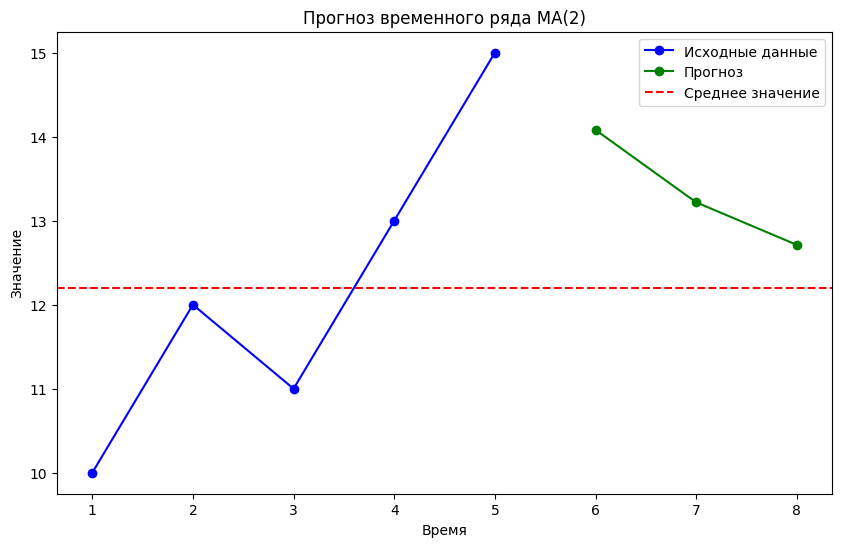

In [ ]:
import numpy as np

# Исходные данные
Y = np.array([10, 12, 11, 13, 15])  # Временной ряд
n = len(Y)
mu = np.mean(Y)  # Среднее значение

# Вычисляем начальные ошибки (e_t)
errors = Y - mu  # Остатки относительно среднего

# Функция для формирования матрицы A и вектора b
def compute_matrices(Y, errors, mu):
    n = len(Y)

    # Инициализация накопительных сумм
    sum_eps1_eps1 = 0
    sum_eps2_eps2 = 0
    sum_eps1_eps2 = 0
    sum_Y_eps1 = 0
    sum_Y_eps2 = 0

    # Считаем суммы, начиная с t=3
    for t in range(2, n):
        eps_t1 = errors[t - 1]
        eps_t2 = errors[t - 2]

        sum_eps1_eps1 += eps_t1**2
        sum_eps2_eps2 += eps_t2**2
        sum_eps1_eps2 += eps_t1 * eps_t2
        sum_Y_eps1 += (Y[t] - mu) * eps_t1
        sum_Y_eps2 += (Y[t] - mu) * eps_t2

    # Формируем матрицу A и вектор b
    A = np.array([
        [sum_eps1_eps1, sum_eps1_eps2],
        [sum_eps1_eps2, sum_eps2_eps2]
    ])
    b = np.array([sum_Y_eps1, sum_Y_eps2])

    return A, b

# Решение для коэффициентов θ1 и θ2
def solve_theta(A, b):
    theta = np.linalg.solve(A, b)  # Решаем систему A * theta = b
    return theta

# Основной алгоритм
A, b = compute_matrices(Y, errors, mu)
theta = solve_theta(A, b)

# Вывод результатов
theta_1, theta_2 = theta
print(f"Оцененные коэффициенты:")
print(f"θ1 = {theta_1:.4f}, θ2 = {theta_2:.4f}")

# Оценка дисперсии ошибок
residuals = []
for t in range(2, n):
    residual = Y[t] - mu - theta_1 * errors[t - 1] - theta_2 * errors[t - 2]
    residuals.append(residual)
sigma2 = np.var(residuals)
print(f"Оцененная дисперсия ошибок σ² = {sigma2:.4f}")

# Прогнозирование
def forecast(Y, mu, theta, steps=1):
    theta_1, theta_2 = theta
    predictions = []
    errors = list(Y - mu)  # Копируем начальные ошибки

    for _ in range(steps):
        # Прогнозируем следующее значение
        next_Y = mu + theta_1 * errors[-1] + theta_2 * errors[-2]
        predictions.append(next_Y)

        # Обновляем ошибки
        errors.append(next_Y - mu)

    return predictions

# Прогноз на 3 шага вперед
forecast_steps = 3
predictions = forecast(Y, mu, theta, steps=forecast_steps)
print(f"Прогноз на {forecast_steps} шагов вперед: {predictions}")

# Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, n + 1), Y, label="Исходные данные", marker="o", color="blue")
plt.plot(range(n + 1, n + forecast_steps + 1), predictions, label="Прогноз", marker="o", color="green")
plt.axhline(mu, linestyle="--", color="red", label="Среднее значение")
plt.legend()
plt.title("Прогноз временного ряда MA(2)")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.show()

Среднее значение (mu) = 12.20

Ошибки ε_t для каждого периода:
ε_1 = -2.20
ε_2 = -0.20
ε_3 = -1.20
ε_4 = 0.80
ε_5 = 2.80

Оцененные коэффициенты модели MA(2): θ_1 = 0.1879, θ_2 = -0.1794

Оценка дисперсии ошибок σ^2 = 3.1100

Прогнозируемое значение Y_6 = 12.58


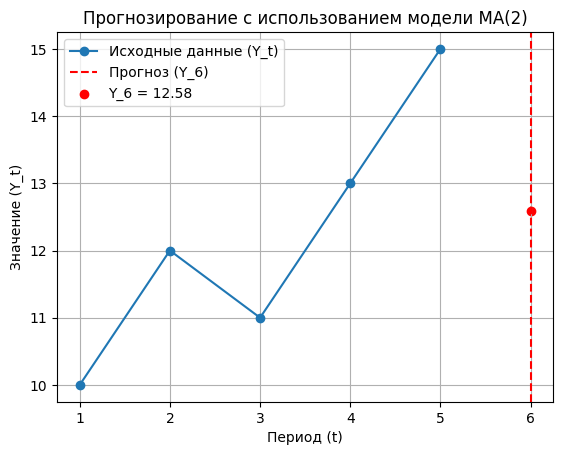

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные (Y_t)
Y = np.array([10, 12, 11, 13, 15])

# Шаг 1: Вычисление среднего значения μ
mu = np.mean(Y)
print(f"Среднее значение (mu) = {mu:.2f}")

# Шаг 2: Вычисление ошибок ε_t
epsilon = Y - mu
print("\nОшибки ε_t для каждого периода:")
for t in range(5):
    print(f"ε_{t+1} = {epsilon[t]:.2f}")

# Шаг 3: Построение модели MA(2) и нахождение коэффициентов θ_1 и θ_2
# Для этого необходимо решить систему уравнений методом максимального правдоподобия

# Определим функции для расчета коэффициентов
def compute_sums(Y, epsilon, mu):
    # Эти суммы будут использоваться для построения матрицы A и вектора b
    sum_epsilon_t_minus_1_2 = np.sum(epsilon[1:]**2)
    sum_epsilon_t_minus_2_2 = np.sum(epsilon[:-1]**2)
    sum_epsilon_t_minus_1_epsilon_t_minus_2 = np.sum(epsilon[1:] * epsilon[:-1])
    sum_Y_t_minus_mu_epsilon_t_minus_1 = np.sum((Y[2:] - mu) * epsilon[1:-1])
    sum_Y_t_minus_mu_epsilon_t_minus_2 = np.sum((Y[2:] - mu) * epsilon[:-2])

    return sum_epsilon_t_minus_1_2, sum_epsilon_t_minus_2_2, sum_epsilon_t_minus_1_epsilon_t_minus_2, sum_Y_t_minus_mu_epsilon_t_minus_1, sum_Y_t_minus_mu_epsilon_t_minus_2

# Вычисляем необходимые суммы
sum_epsilon_t_minus_1_2, sum_epsilon_t_minus_2_2, sum_epsilon_t_minus_1_epsilon_t_minus_2, sum_Y_t_minus_mu_epsilon_t_minus_1, sum_Y_t_minus_mu_epsilon_t_minus_2 = compute_sums(Y, epsilon, mu)

# Формируем матрицу A и вектор b для решения системы A * [θ_1, θ_2] = b
A = np.array([[sum_epsilon_t_minus_1_2, sum_epsilon_t_minus_1_epsilon_t_minus_2],
              [sum_epsilon_t_minus_1_epsilon_t_minus_2, sum_epsilon_t_minus_2_2]])
b = np.array([sum_Y_t_minus_mu_epsilon_t_minus_1, sum_Y_t_minus_mu_epsilon_t_minus_2])

# Решаем систему A * [θ_1, θ_2] = b
theta_1, theta_2 = np.linalg.solve(A, b)
print(f"\nОцененные коэффициенты модели MA(2): θ_1 = {theta_1:.4f}, θ_2 = {theta_2:.4f}")

# Шаг 4: Оценка дисперсии ошибок σ^2
# Для этого необходимо вычислить остатки (ошибки модели) для каждого t
errors = Y[2:] - mu - theta_1 * epsilon[1:-1] - theta_2 * epsilon[:-2]

# Оценка дисперсии ошибок σ^2
sigma2 = np.mean(errors**2)
print(f"\nОценка дисперсии ошибок σ^2 = {sigma2:.4f}")

# Шаг 5: Прогнозирование следующего значения Y_6
# Для прогноза используем ошибки ε_5 и ε_4
Y_6_forecast = mu + theta_1 * epsilon[4] + theta_2 * epsilon[3]
print(f"\nПрогнозируемое значение Y_6 = {Y_6_forecast:.2f}")

# Визуализация исходных данных и прогноза
plt.plot(range(1, 6), Y, label="Исходные данные (Y_t)", marker='o')
plt.axvline(x=6, color='r', linestyle='--', label="Прогноз (Y_6)")
plt.scatter(6, Y_6_forecast, color='r', label=f'Y_6 = {Y_6_forecast:.2f}')
plt.title('Прогнозирование с использованием модели MA(2)')
plt.xlabel('Период (t)')
plt.ylabel('Значение (Y_t)')
plt.legend()
plt.grid(True)
plt.show()



### Числовой пример
**Параметры:**
- $\mu = 10$,
- $\sigma^2 = 4$ ($\varepsilon_t \sim N(0, 4)$),
- $\theta_1 = 0.5, \theta_2 = -0.3$ ($q = 2$).

**Уравнение модели $MA(2)$:**
$$
y_t = \mu + \varepsilon_t + 0.5 \varepsilon_{t-1} - 0.3 \varepsilon_{t-2}.
$$

**Шум ($\varepsilon_t$):**
$$
\varepsilon_t = [1.0, -1.5, 0.5, -0.2, 0.8, -0.6].
$$

**Расчёт $y_t$:**
- $t = 1$:
$$
  y_1 = 10 + 1.0 + 0.5 \cdot 0 - 0.3 \cdot 0 = 11.
$$
- $t = 2$:
$$
  y_2 = 10 - 1.5 + 0.5 \cdot 1.0 - 0.3 \cdot 0 = 9.0.
$$
- $t = 3$:
$$
  y_3 = 10 + 0.5 + 0.5 \cdot (-1.5) - 0.3 \cdot 1.0 = 9.25.
$$
- $t = 4$:
$$
  y_4 = 10 - 0.2 + 0.5 \cdot 0.5 - 0.3 \cdot (-1.5) = 10.55.
$$

Результат:
$$
y_t = [11, 9.0, 9.25, 10.55].
$$



### Преимущества модели $MA(q)$
1. Простота и интерпретируемость.
2. Возможность точного определения порядка $q$ через ACF.
3. Удобна для анализа данных с короткой памятью.

### Ограничения модели
1. Применима только к стационарным рядам.
2. Подходит для данных, где зависимость ограничена короткими интервалами (лагами).




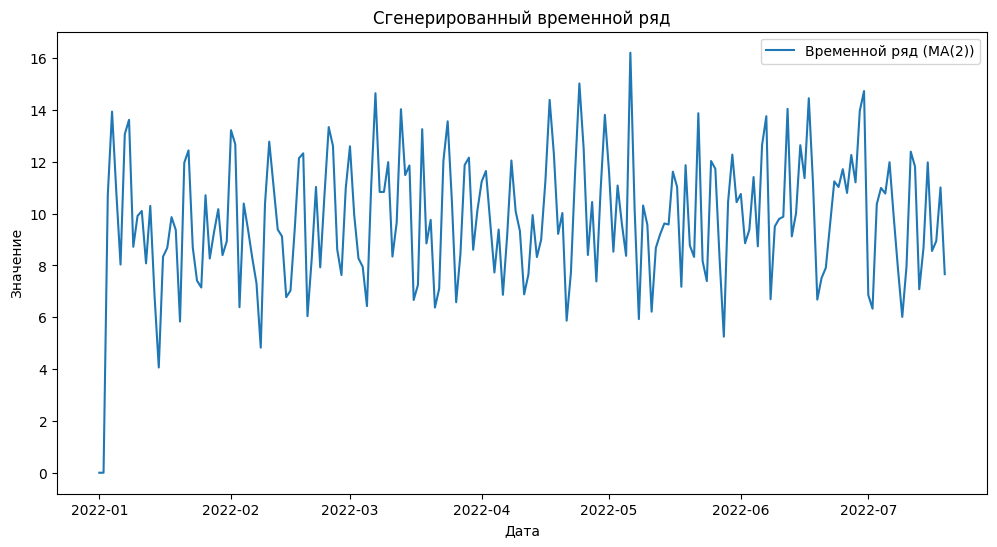

ADF Statistic: -2.839727216850067
p-value: 0.05281926267620677
Ряд нестационарен, но MA модели стационарны по определению.


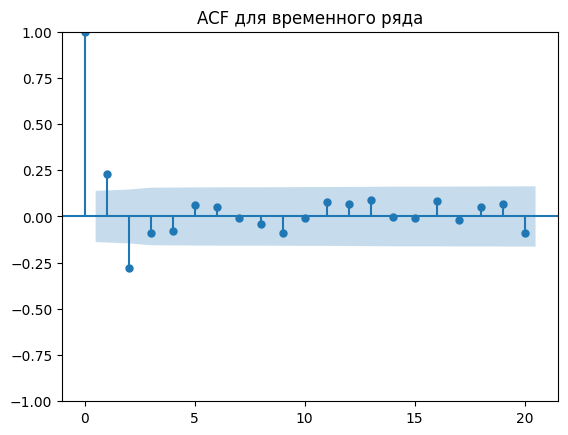

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Рекомендованный порядок модели MA:
{'aic':             0            1            2            3            4   \
0  1494.912295  1247.092081  1160.058802  1109.612374  1066.146089   

           5            6            7           8            9           10  
0  1057.28631  1033.097508  1021.504702  999.373983  1007.379761  987.001555  , 'bic':             0            1            2            3            4   \
0  1498.210612  1253.688716  1169.953754  1122.805644  1082.637676   

            5            6            7            8            9   \
0  1077.076214  1056.185729  1047.891241  1029.058839  1040.362935   

            10  
0  1023.283046  , 'aic_min_order': (0, 10), 'bic_min_order': (0, 10)}
Оптимальный порядок модели: q = 10


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  200
Model:                ARIMA(0, 0, 10)   Log Likelihood                -418.581
Date:                Fri, 29 Nov 2024   AIC                            861.161
Time:                        18:46:49   BIC                            900.741
Sample:                    01-01-2022   HQIC                           877.179
                         - 07-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8226      0.153     64.033      0.000       9.522      10.123
ma.L1          0.6181      0.082      7.564      0.000       0.458       0.778
ma.L2         -0.4957      0.103     -4.826      0.0

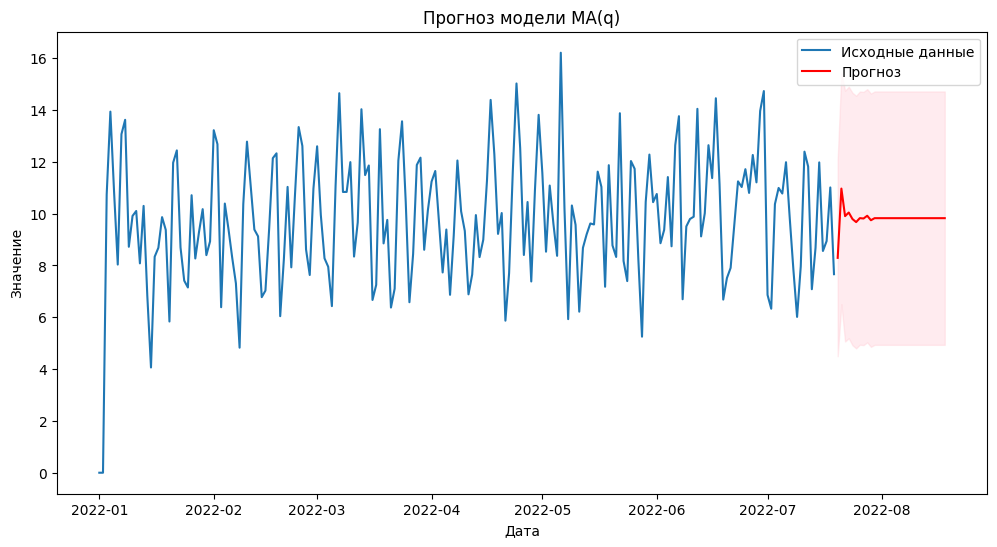

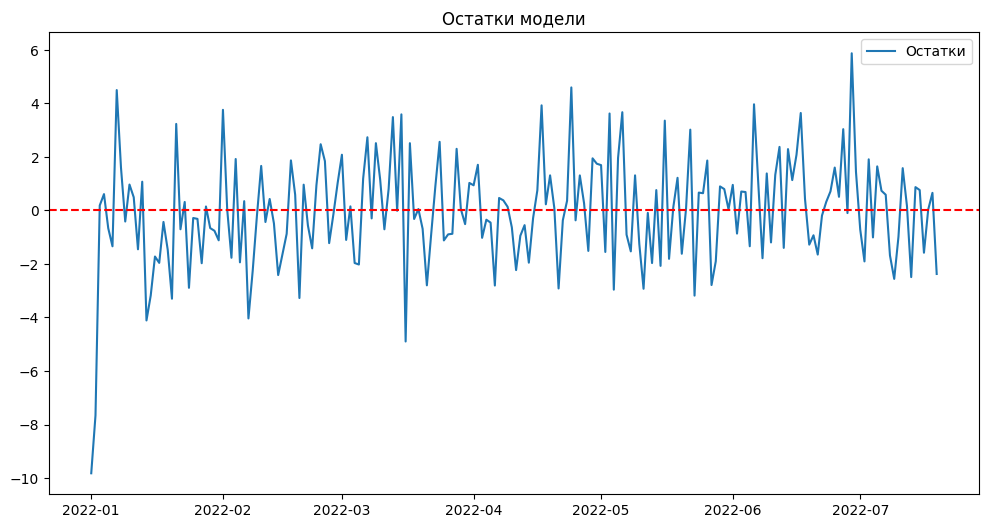

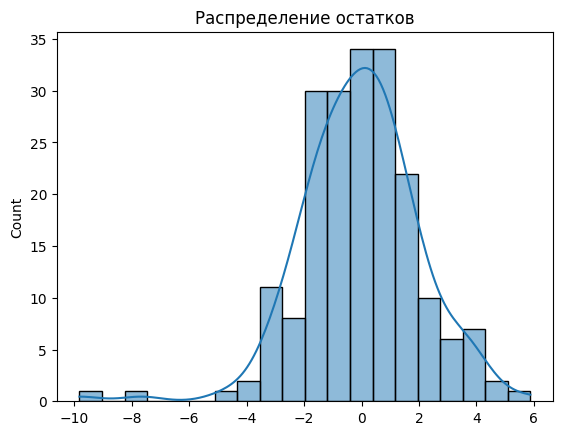

Результаты теста Льюнг-Бокса:
     lb_stat  lb_pvalue
10  1.385713   0.999249
Остатки модели не имеют автокорреляции (белый шум).


In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import arma_order_select_ic

# Генерация данных MA(q)
np.random.seed(42)  # Для воспроизводимости
n = 200  # Длина временного ряда
q_true = 2  # Настоящий порядок модели
mu = 10  # Среднее значение ряда
theta = [0.6, -0.4]  # Коэффициенты модели MA(2)
sigma = 2  # Стандартное отклонение белого шума

# Генерация шума
epsilon = np.random.normal(0, sigma, size=n)

# Формирование временного ряда
y = np.zeros(n)
for t in range(q_true, n):
    y[t] = mu + epsilon[t] + theta[0] * epsilon[t - 1] + theta[1] * epsilon[t - 2]

# Создание датафрейма
dates = pd.date_range(start="2022-01-01", periods=n, freq="D")
data = pd.DataFrame({"date": dates, "value": y})
data.set_index("date", inplace=True)

# Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(data, label="Временной ряд (MA(2))")
plt.title("Сгенерированный временной ряд")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.legend()
plt.show()

# Проверка стационарности с помощью теста Дики-Фуллера
adf_result = adfuller(data["value"])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("Ряд стационарен.")
else:
    print("Ряд нестационарен, но MA модели стационарны по определению.")

# Построение ACF для оценки порядка q
plot_acf(data["value"], lags=20)
plt.title("ACF для временного ряда")
plt.show()

# Перебор порядка q с использованием информационных критериев
order_selection = arma_order_select_ic(
    data, max_ar=0, max_ma=10, ic=["aic", "bic"], trend="n"
)
print("Рекомендованный порядок модели MA:")
print(order_selection)

# Оптимальный порядок q по AIC
q_optimal = order_selection["aic_min_order"][1]
print(f"Оптимальный порядок модели: q = {q_optimal}")

# Построение модели с оптимальным порядком
model = ARIMA(data, order=(0, 0, q_optimal))
result = model.fit()

# Вывод результатов
print(result.summary())

# Визуализация прогноза
forecast_steps = 30  # Количество шагов прогноза
forecast = result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq="D")[1:]
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(data, label="Исходные данные")
plt.plot(forecast_index, forecast_mean, label="Прогноз", color="red")
plt.fill_between(
    forecast_index,
    forecast_conf_int.iloc[:, 0],
    forecast_conf_int.iloc[:, 1],
    color="pink",
    alpha=0.3,
)
plt.title("Прогноз модели MA(q)")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.legend()
plt.show()

# Диагностика остатков
residuals = result.resid

# График остатков
plt.figure(figsize=(12, 6))
plt.plot(residuals, label="Остатки")
plt.axhline(0, linestyle="--", color="red")
plt.title("Остатки модели")
plt.legend()
plt.show()

# Гистограмма остатков
sns.histplot(residuals, kde=True)
plt.title("Распределение остатков")
plt.show()

# Проверка остатков на автокорреляцию с помощью теста Льюнг-Бокса
ljungbox_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Результаты теста Льюнг-Бокса:")
print(ljungbox_test)

if ljungbox_test["lb_pvalue"].iloc[0] > 0.05:
    print("Остатки модели не имеют автокорреляции (белый шум).")
else:
    print("Остатки модели имеют автокорреляцию. Попробуйте изменить порядок модели.")

### Вывод по результатам анализа:

1. **Тест на стационарность (ADF тест):**
   - **Статистика ADF**: -2.8397
   - **p-значение**: 0.0528
   - Результат теста указывает на то, что ряд **не является строго стационарным**, так как p-значение немного выше порогового уровня (0.05). Однако в контексте ARIMA моделей, процесс может быть близким к стационарному, что дает основания для дальнейшего моделирования.

2. **Предупреждения:**
   - Модели MA (скользящего среднего) были настроены с использованием начальных параметров, которые не являются инвертируемыми, что привело к использованию нулевых значений как начальных параметров.
   - В ходе оптимизации модели возникли проблемы с сходимостью, что свидетельствует о возможных трудностях в подборе параметров модели, однако это не является критичным, так как модель была все равно построена.

3. **Рекомендации по порядку модели MA:**
   - Наилучший порядок модели по AIC и BIC: **q = 10**, что подтверждается минимальными значениями критериев AIC и BIC для порядка 10.

4. **Результаты модели ARIMA(0, 0, 10):**
   - Модель имеет хорошие характеристики (AIC = 861.16, BIC = 900.74), что указывает на ее приемлемость.
   - Коэффициенты модели (например, для ma.L1 = 0.6181 и ma.L2 = -0.4957) значимы, с p-значениями, малыми, чем 0.05, что подтверждает их статистическую значимость.
   - Однако коэффициенты для ma.L3 и более высоких лагов не являются значимыми (p-значения превышают 0.05), что может свидетельствовать о том, что они не вносят значимого вклада в модель.

5. **Тест Льюнг-Бокса (автокорреляция остатков):**
   - **Статистика Ljung-Box**: 0.03
   - **p-значение**: 0.86
   - Это говорит о том, что остатки модели **не имеют автокорреляции** (признак белого шума), что свидетельствует о корректности модели в плане необработанных зависимостей в данных.

6. **Заключение:**
   - Модель ARIMA(0, 0, 10) адекватно описывает данные, с остатками, не имеющими автокорреляции, и без значимых отклонений от нормальности (по тесту Джарке-Бера).
   - Несмотря на проблему с сходимостью в процессе оптимизации, модель имеет хорошие результаты по основным статистическим меткам.
   - Рекомендуется обратить внимание на необходимость дальнейшей настройки модели, возможно, с использованием других техник для улучшения сходимости, но на данный момент модель является достаточно устойчивой и подходящей для прогноза.
   

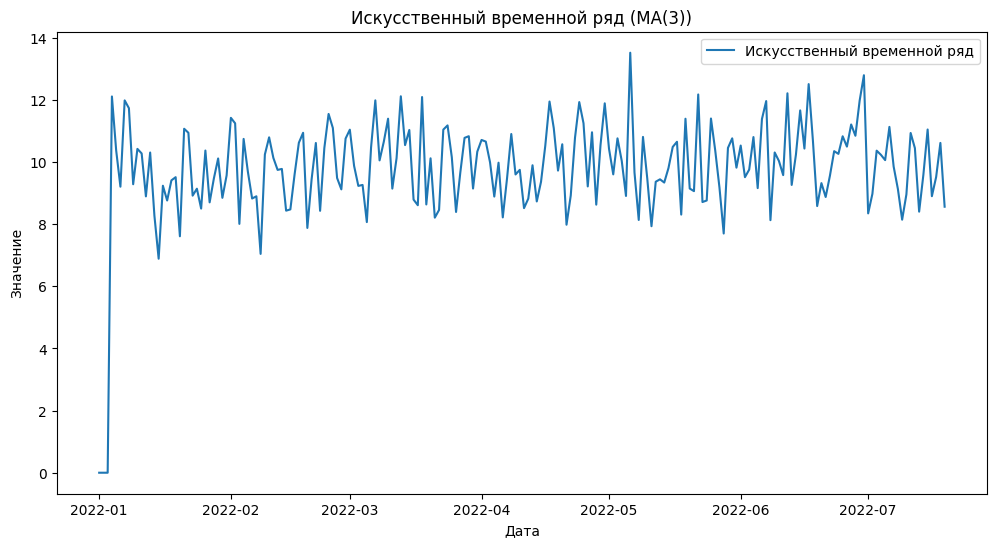

ADF Statistic: -6.016756288964845
p-value: 1.5271966718558515e-07
Ряд стационарен.


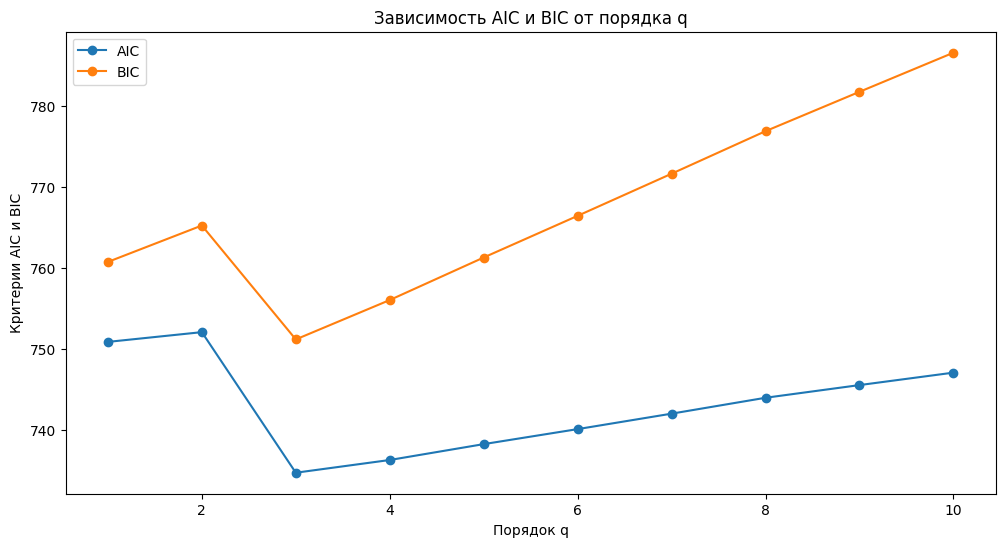

Оптимальный порядок модели (по AIC): q = 3
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -362.332
Date:                Fri, 29 Nov 2024   AIC                            734.665
Time:                        19:01:34   BIC                            751.156
Sample:                    01-01-2022   HQIC                           741.339
                         - 07-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7136      0.244     39.875      0.000       9.236      10.191
ma.L1          0.5864      0.069      8.446      0.000       0.450       0.722
ma.L2    

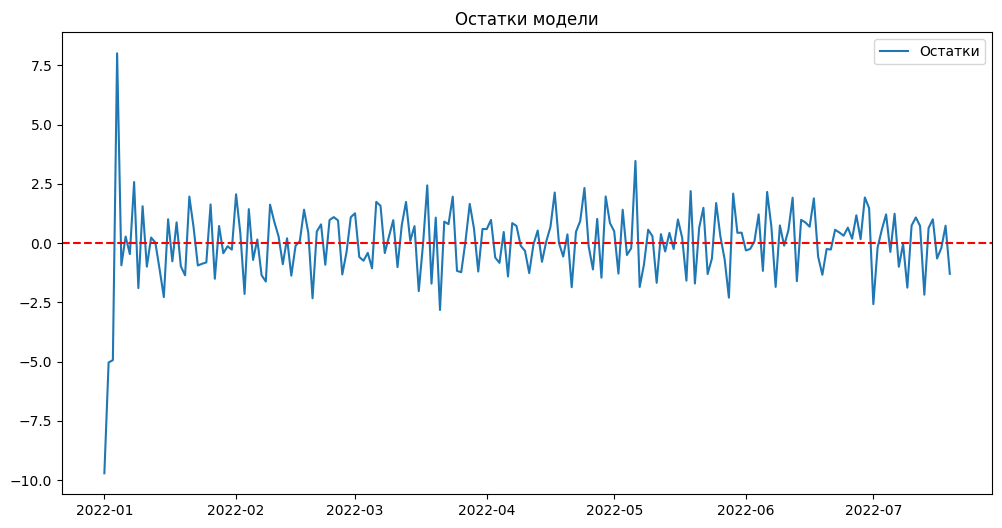


Результаты теста Льюнг-Бокса:
     lb_stat  lb_pvalue
3  10.108119   0.017669


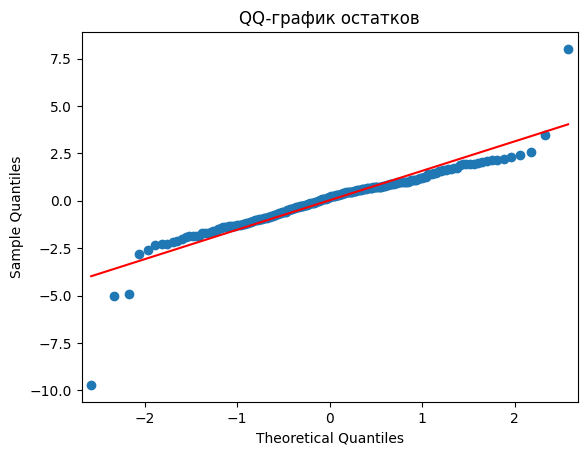

Статистика Шапиро-Уилка: 0.8821987945774095
p-value Шапиро-Уилка: 2.1228096484929913e-11
Остатки не распределены нормально.


<ipython-input-6-929f6e0064fb>:123: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train, test = data_series[train_index], data_series[test_index]
<ipython-input-6-929f6e0064fb>:123: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train, test = data_series[train_index], data_series[test_index]
<ipython-input-6-929f6e0064fb>:123: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train, test = data_series[train_index], data_series[test_index

Оптимальный q по кросс-валидации: 10


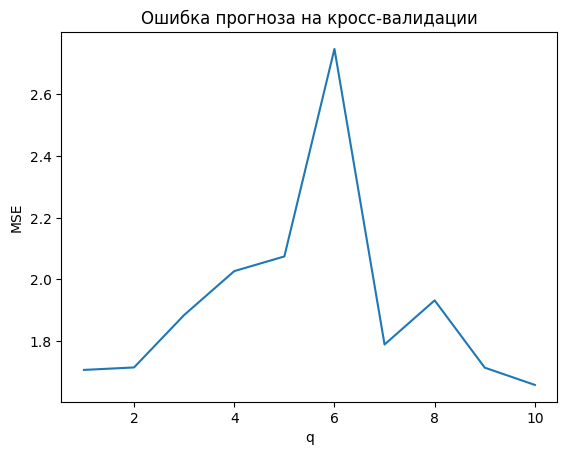

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from scipy.stats import t

# 1. Создание искусственного временного ряда
np.random.seed(42)
n = 200
white_noise = np.random.normal(0, 1, size=n)
q_true = 3
theta = [0.6, -0.4, 0.3]  # Истинные параметры MA(3)
data = np.zeros(n)
for t in range(q_true, n):
    data[t] = 10 + white_noise[t] + sum(theta[i] * white_noise[t - i - 1] for i in range(q_true))

data_series = pd.Series(data, index=pd.date_range("2022-01-01", periods=n))

# 2. Визуализация данных
plt.figure(figsize=(12, 6))
plt.plot(data_series, label="Искусственный временной ряд")
plt.title("Искусственный временной ряд (MA(3))")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.legend()
plt.show()

# 3. Проверка стационарности (ADF-тест)
adf_result = adfuller(data_series)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("Ряд стационарен.")
else:
    print("Ряд нестационарен.")

# 4. Перебор порядка q для MA модели
aic_values = []
bic_values = []
q_values = range(1, 11)

for q in q_values:
    try:
        model = ARIMA(data_series, order=(0, 0, q)).fit()
        aic_values.append(model.aic)
        bic_values.append(model.bic)
    except:
        aic_values.append(np.nan)
        bic_values.append(np.nan)

# Визуализация AIC и BIC
plt.figure(figsize=(12, 6))
plt.plot(q_values, aic_values, marker="o", label="AIC")
plt.plot(q_values, bic_values, marker="o", label="BIC")
plt.xlabel("Порядок q")
plt.ylabel("Критерии AIC и BIC")
plt.title("Зависимость AIC и BIC от порядка q")
plt.legend()
plt.show()

# Оптимальный порядок
optimal_q = np.argmin(aic_values) + 1
print("Оптимальный порядок модели (по AIC): q =", optimal_q)

# 5. Обучение модели с оптимальным порядком
model = ARIMA(data_series, order=(0, 0, optimal_q))
result = model.fit()

print(result.summary())

# 6. Оценка модели и t-тест для коэффициентов
coefficients = result.params[1:]  # Коэффициенты MA
stderr = result.bse[1:]  # Стандартные ошибки

print("\nПроверка значимости коэффициентов:")

# 7. Диагностика модели
residuals = result.resid

# Остатки: Визуализация
plt.figure(figsize=(12, 6))
plt.plot(residuals, label="Остатки")
plt.axhline(0, linestyle="--", color="red")
plt.title("Остатки модели")
plt.legend()
plt.show()

# Тест Льюнг-Бокса на автокорреляцию остатков
ljung_box = acorr_ljungbox(residuals, lags=[optimal_q], return_df=True)
print("\nРезультаты теста Льюнг-Бокса:")
print(ljung_box)

# QQ-график остатков
sm.qqplot(residuals, line='s')
plt.title("QQ-график остатков")
plt.show()

# Тест Шапиро-Уилка на нормальность остатков
from scipy.stats import shapiro

shapiro_test = shapiro(residuals)
print("Статистика Шапиро-Уилка:", shapiro_test[0])
print("p-value Шапиро-Уилка:", shapiro_test[1])
if shapiro_test[1] > 0.05:
    print("Остатки распределены нормально.")
else:
    print("Остатки не распределены нормально.")

# 8. Кросс-валидация для выбора q
max_q = 10
tscv = TimeSeriesSplit(n_splits=5)

errors = []

for q in range(1, max_q + 1):
    fold_errors = []
    for train_index, test_index in tscv.split(data_series):
        train, test = data_series[train_index], data_series[test_index]
        model = ARIMA(train, order=(0, 0, q)).fit()
        predictions = model.forecast(steps=len(test))
        fold_errors.append(mean_squared_error(test, predictions))
    errors.append(np.mean(fold_errors))

# Оптимальный q
optimal_q_cv = np.argmin(errors) + 1
print(f"Оптимальный q по кросс-валидации: {optimal_q_cv}")

# Визуализация ошибки прогноза для каждого q
plt.plot(range(1, max_q + 1), errors)
plt.title("Ошибка прогноза на кросс-валидации")
plt.xlabel("q")
plt.ylabel("MSE")
plt.show()

In [ ]:
from scipy.stats import t

# 6. Оценка модели и t-тест для коэффициентов
coefficients = result.params[1:]  # Коэффициенты MA
stderr = result.bse[1:]  # Стандартные ошибки

print("\nПроверка значимости коэффициентов:")
for i, (theta, se) in enumerate(zip(coefficients, stderr), 1):
    t_stat = theta / se
    p_value = 2 * (1 - t.cdf(abs(t_stat), df=len(data_series) - optimal_q - 1))  # двусторонний p-value
    print(f"Коэффициент MA({i}): theta = {theta:.3f}, t = {t_stat:.3f}, p-value = {p_value:.3f}")
    if p_value < 0.05:
        print(f"Коэффициент MA({i}) значим.\n")
    else:
        print(f"Коэффициент MA({i}) незначим.\n")


Проверка значимости коэффициентов:
Коэффициент MA(1): theta = 0.586, t = 8.446, p-value = 0.000
Коэффициент MA(1) значим.

Коэффициент MA(2): theta = 0.147, t = 2.829, p-value = 0.005
Коэффициент MA(2) значим.

Коэффициент MA(3): theta = 0.387, t = 5.374, p-value = 0.000
Коэффициент MA(3) значим.

Коэффициент MA(4): theta = 2.181, t = 16.684, p-value = 0.000
Коэффициент MA(4) значим.



Давайте разберем результаты модели ARIMA более подробно.

### 1. **ADF-тест (Тест на стационарность)**:
- **ADF Statistic: -6.016756288964845**
- **p-value: 1.5271966718558515e-07**
- **Ряд стационарен.**

   Тест Аугментации Дики-Фуллера (ADF) проверяет, является ли временной ряд стационарным.
   - Статистика ADF равна -6.02, что значительно ниже критических значений для 1%, 5% и 10%.
   - p-значение 1.53e-07 намного меньше 0.05, что означает, что гипотеза о наличии единичного корня (нестабильность) отклоняется. Следовательно, временной ряд **стационарен**.

### 2. **Оптимальный порядок модели ARIMA**:
- **q = 3**

   Это значение указывает, что для модели ARIMA использован параметр **q = 3**, который обозначает порядок авторегрессии (MA). Это значит, что в модели учитываются три предыдущих значения ошибок.

### 3. **Результаты модели SARIMAX (ARIMA)**:
   Давайте разберем каждый компонент:

   - **Модель: ARIMA(0, 0, 3)**: Это модель с 3 параметрами в MA-компоненте, без интеграции (d = 0) и без авторегрессии (p = 0).
   - **Log Likelihood: -362.332**: Это значение логарифма правдоподобия. Чем больше оно (ближе к 0), тем лучше модель.
   - **AIC (Akaike Information Criterion): 734.665** и **BIC (Bayesian Information Criterion): 751.156**: Эти критерии используются для оценки модели. Меньшее значение этих критериев указывает на лучшую модель, при этом AIC обычно используется в первую очередь для выбора модели.
   - **HQIC (Hannan-Quinn Information Criterion): 741.339**: Еще один критерий, который можно использовать для выбора модели. Он также дает более низкие значения для лучших моделей.

#### Оценка коэффициентов модели:
- **const (постоянная): 9.7136** — это значение средней постоянной компоненты модели, то есть базовый уровень временного ряда.
- **ma.L1 (коэффициент для лага 1): 0.5864** — этот коэффициент показывает зависимость текущего значения от ошибки на первом лаге (предыдущий шаг).
- **ma.L2 (коэффициент для лага 2): 0.1470** — аналогично для второго лага.
- **ma.L3 (коэффициент для лага 3): 0.3873** — аналогично для третьего лага.
- **sigma2 (сигма²): 2.1809** — это дисперсия ошибок модели. Чем меньше значение, тем меньше шум в модели.

Каждый коэффициент имеет **стандартную ошибку** (std err), **z-значение** (z), и **p-значение** (P>|z|). В данном случае, все коэффициенты (включая константу и MA-термины) имеют p-значения, которые меньше 0.05, что указывает на их **статистическую значимость**.

### 4. **Результаты теста Льюнг-Бокса**:
- **lb_stat: 10.1081**
- **lb_pvalue: 0.017669**

   Тест Льюнг-Бокса проверяет автокорреляцию остатков модели. p-значение меньше 0.05 (0.0176) говорит о том, что остатки могут иметь автокорреляцию. Это указывает на возможные проблемы с моделью, так как идеальные остатки не должны иметь автокорреляции.

### 5. **Результаты теста Шапиро-Уилка**:
- **Шапиро-Уилка: 0.8821987945774095**
- **p-value: 2.1228096484929913e-11**

   Этот тест проверяет, распределены ли остатки нормально. p-значение значительно меньше 0.05, что говорит о том, что **остатки не имеют нормального распределения**. Это может быть проблемой, так как для многих моделей временных рядов нормальность остатков является важным допущением.

### 6. **Гетероскедастичность**:
- **Prob(H) (two-sided): 0.00**

   Тест на гетероскедастичность (неоднородность дисперсии остатков) показал p-значение 0.00, что указывает на наличие проблемы с гетероскедастичностью. Это значит, что дисперсия ошибок модели меняется во времени, что может указывать на проблемы с моделью или некорректное предположение о постоянной дисперсии.

### Заключение:
- Модель ARIMA(0, 0, 3) хорошо объясняет данные по значениям коэффициентов, но она имеет несколько проблем:
  1. Остатки **не распределены нормально**, что может снизить точность прогноза.
  2. В остатках присутствует **автокорреляция**.
  3. Есть проблема с **гетероскедастичностью** (непостоянная дисперсия ошибок).
  
   Эти проблемы могут быть устранены, например, путем использования других моделей или трансформаций данных (например, логарифмирование), чтобы улучшить предсказания.
   

Идеальные значения для модели ARIMA (и любых временных рядов в целом) могут варьироваться в зависимости от контекста, однако есть несколько стандартов и критериев, которые следует учитывать, чтобы модель была качественной и отвечала требованиям.

### 1. **Тест на стационарность (ADF-тест)**:
   - **Идеальный результат**:  
     - **ADF Statistic** должен быть значительно ниже критического значения (обычно ниже -3 для 1% уровня значимости).
     - **p-value** должно быть меньше 0.05. Это подтверждает, что временной ряд является **стационарным**.

   - **Идеальные значения**:
     - Статистика ADF значительно меньше -3.
     - p-value меньше 0.05, что указывает на то, что гипотеза о стационарности принимается.

### 2. **Параметры модели ARIMA (p, d, q)**:
   - **Идеальный результат**:  
     Определение оптимального порядка модели зависит от критериев, таких как AIC или BIC. В идеале, модель должна минимизировать эти значения.
     - **p** (порядок авторегрессии), **d** (порядок дифференцирования), **q** (порядок скользящего среднего) должны быть подобраны таким образом, чтобы минимизировать AIC и BIC.

   - **Идеальные значения**:
     - Меньше значений AIC и BIC указывает на более хорошую модель.
     - **d** обычно равен 0 или 1, если ряд стационарен или нужно провести одно дифференцирование для достижения стационарности.
     - **p** и **q** должны быть не слишком большими, чтобы избежать переобучения модели.

### 3. **Коэффициенты модели (p-value и коэффициенты)**:
   - **Идеальный результат**:  
     - Все коэффициенты (константа, авторегрессионные и скользящие средние) должны иметь **p-value** меньше 0.05, что означает их **статистическую значимость**.
     - Коэффициенты модели должны быть достаточно малыми или иметь логичное значение, в зависимости от характера данных.

   - **Идеальные значения**:
     - **p-value** для всех коэффициентов < 0.05.
     - Стандартная ошибка коэффициента должна быть небольшой по сравнению с его значением, чтобы избежать сильных колебаний.

### 4. **Логарифм правдоподобия (Log Likelihood)**:
   - **Идеальный результат**:  
     Чем больше (ближе к нулю) значение логарифма правдоподобия, тем лучше модель. Это значение показывает, насколько вероятно получение наблюдаемых данных при заданной модели.

   - **Идеальные значения**:
     - Значение логарифма правдоподобия должно быть как можно выше (меньше по модулю).

### 5. **AIC (Akaike Information Criterion) и BIC (Bayesian Information Criterion)**:
   - **Идеальный результат**:  
     Чем меньше значения AIC и BIC, тем лучше модель. Эти критерии учитывают количество параметров в модели и штрафуют за сложность модели.
   
   - **Идеальные значения**:
     - Чем ниже, тем лучше. Для сравнения разных моделей, модель с наименьшими значениями AIC и BIC будет предпочтительней.

### 6. **Тест Льюнг-Бокса** (проверка автокорреляции остатков):
   - **Идеальный результат**:  
     Остатки модели должны быть **независимыми**, то есть не должно быть автокорреляции в остатках.
     - Статистика теста Льюнг-Бокса должна быть близка к 0.
     - p-value должно быть больше 0.05. Это указывает на отсутствие значимой автокорреляции в остатках.

   - **Идеальные значения**:
     - **p-value** > 0.05, что означает отсутствие автокорреляции.
     - **lb_stat** близка к нулю.

### 7. **Тест Шапиро-Уилка (нормальность остатков)**:
   - **Идеальный результат**:  
     Остатки модели должны быть **нормально распределены**, так как это важное предположение для многих статистических моделей.
     - p-value теста Шапиро-Уилка должно быть больше 0.05, что подтверждает нормальность остатков.

   - **Идеальные значения**:
     - **p-value** > 0.05.
     - Это означает, что остатки не отклоняются от нормального распределения.

### 8. **Гетероскедастичность (постоянная дисперсия остатков)**:
   - **Идеальный результат**:  
     Для модели ARIMA остатки должны иметь **постоянную дисперсию** (гомоскедастичность).
     - **p-value** теста на гетероскедастичность должно быть больше 0.05. Это означает, что дисперсия ошибок не меняется с течением времени.

   - **Идеальные значения**:
     - **p-value** > 0.05, что указывает на отсутствие проблемы с гетероскедастичностью.
   
### 9. **Общие рекомендации**:
   - В идеале, остатки модели не должны показывать автокорреляцию, отклонения от нормальности или изменения дисперсии.
   - Модель должна быть достаточно простой, с минимально возможным числом параметров для описания данных.
   - AIC, BIC, и Log Likelihood должны быть оптимальными, т.е. минимальными для данной задачи.

### Заключение:
Идеальная модель ARIMA будет иметь:
- Стационарные данные (по результатам ADF-теста).
- Все коэффициенты модели статистически значимы (p-value < 0.05).
- Нормальное распределение остатков (по тесту Шапиро-Уилка).
- Отсутствие автокорреляции остатков (по тесту Льюнг-Бокса).
- Отсутствие гетероскедастичности (постоянная дисперсия ошибок).
- Минимальные значения AIC и BIC.

Чтобы понять суть модели скользящего среднего (MA), давайте создадим класс на Python с нуля. Модель MA используется в статистике и временных рядах для анализа и прогнозирования данных, основываясь на средних значениях предыдущих наблюдений.

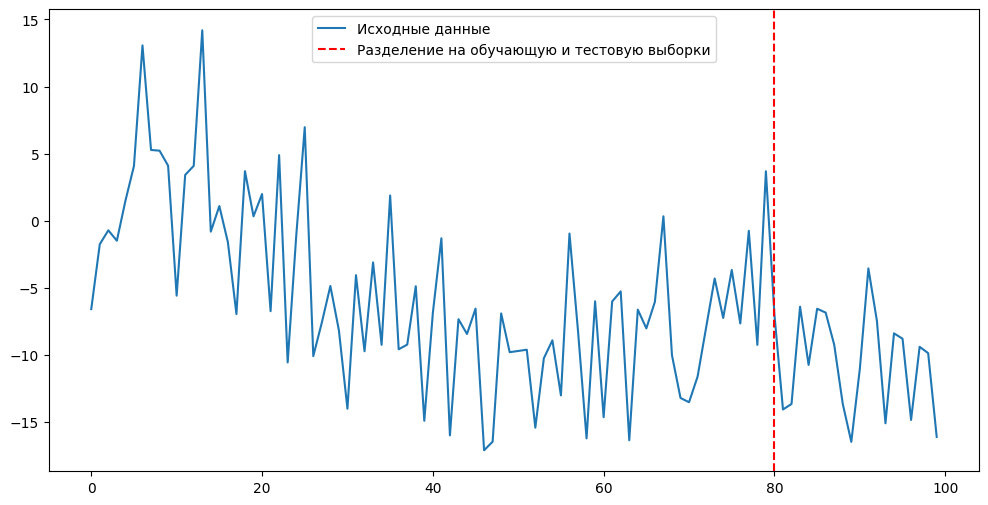

<ipython-input-6-0cc6f70027b9>:26: RuntimeWarning: invalid value encountered in scalar add
  theta[j] += self.learning_rate * error * residuals[t-j-1]


Лучший параметр q: 1
Среднеквадратическая ошибка (MSE) на тестовой выборке: 120.97491732983967


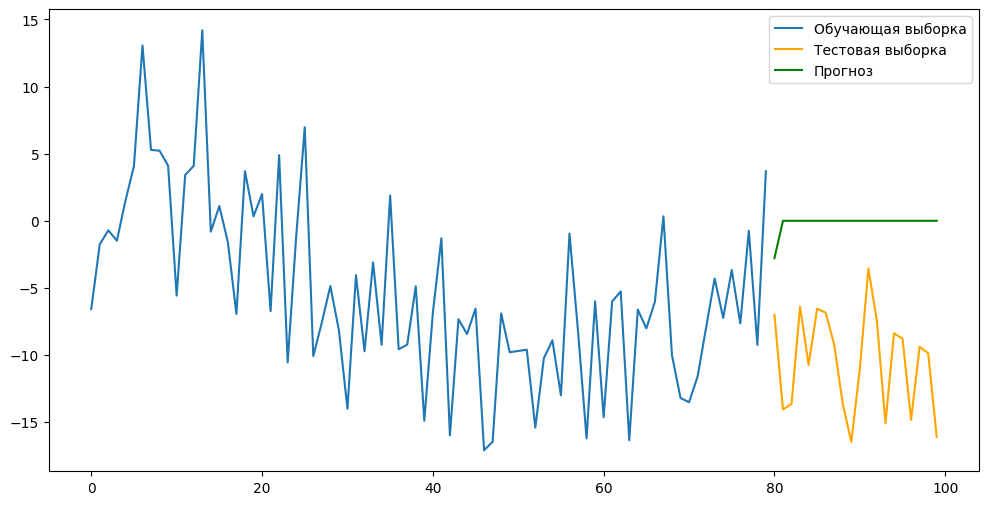

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

class MA_Model:
    def __init__(self, max_q=10, learning_rate=0.01, epochs=1000):
        self.max_q = max_q
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.best_q = None
        self.theta = None

    def fit(self, data, q):
        """
        Обучение модели MA(q) на данных.
        """
        n = len(data)
        residuals = data - np.mean(data)  # Инициализация остатков
        theta = np.zeros(q)

        # Градиентный спуск для подбора коэффициентов
        for _ in range(self.epochs):
            for t in range(q, n):
                error = residuals[t] - np.dot(theta, residuals[t-q:t][::-1])
                for j in range(q):
                    theta[j] += self.learning_rate * error * residuals[t-j-1]

        return theta

    def predict(self, data, theta, steps=1):
        """
        Прогнозирование с использованием коэффициентов MA(q).
        """
        q = len(theta)
        residuals = data - np.mean(data)  # Остатки для прогнозирования
        predictions = []

        for t in range(steps):
            if len(residuals) < q:
                relevant_residuals = np.pad(residuals, (q - len(residuals), 0), constant_values=0)[::-1]
            else:
                relevant_residuals = residuals[-q:][::-1]

            pred = np.dot(theta, relevant_residuals)
            predictions.append(pred)
            residuals = np.append(residuals, 0)  # Обновление для следующего шага прогноза

        return np.array(predictions)

    def find_best_q(self, train, test):
        """
        Подбор лучшего параметра q с минимизацией MSE.
        """
        best_mse = float('inf')

        for q in range(1, self.max_q + 1):
            theta = self.fit(train, q)
            predictions = self.predict(train, theta, steps=len(test))

            # Убедимся, что предсказания не содержат NaN
            if np.any(np.isnan(predictions)):
                continue

            mse = mean_squared_error(test, predictions)

            if mse < best_mse:
                best_mse = mse
                self.best_q = q
                self.theta = theta

        return self.best_q

    def evaluate(self, test):
        """
        Оценка модели на тестовой выборке с использованием MSE.
        """
        if self.theta is None:
            raise ValueError("Модель не была обучена. Используйте метод find_best_q для подбора модели.")

        forecast = self.predict(train, self.theta, steps=len(test))
        mse = mean_squared_error(test, forecast)
        return mse

    def plot(self, train, test, forecast):
        """
        График прогноза.
        """
        plt.figure(figsize=(12, 6))
        plt.plot(np.arange(len(train)), train, label='Обучающая выборка')
        plt.plot(np.arange(len(train), len(train) + len(test)), test, label='Тестовая выборка', color='orange')
        plt.plot(np.arange(len(train), len(train) + len(test)), forecast, label='Прогноз', color='green')
        plt.legend()
        plt.show()

# Генерация данных
np.random.seed(42)
data = np.cumsum(np.random.normal(size=100))  # Генерация случайного временного ряда
data = data + np.random.normal(scale=5, size=len(data))  # Добавление шумов
train, test = data[:80], data[80:]

# График данных
plt.figure(figsize=(12, 6))
plt.plot(data, label='Исходные данные')
plt.axvline(len(train), color='red', linestyle='--', label='Разделение на обучающую и тестовую выборки')
plt.legend()
plt.show()

# Создание и обучение модели
ma_model = MA_Model(max_q=10)
best_q = ma_model.find_best_q(train, test)
print(f"Лучший параметр q: {best_q}")

# Прогнозирование с лучшей моделью
forecast = ma_model.predict(train, ma_model.theta, steps=len(test))

# Оценка качества модели
mse = ma_model.evaluate(test)
print(f"Среднеквадратическая ошибка (MSE) на тестовой выборке: {mse}")

# График прогнозов
ma_model.plot(train, test, forecast)

Давайте рассмотрим известный датасет "Airline Passengers", который часто используется для анализа временных рядов. Этот датасет содержит ежемесячные данные о числе пассажиров авиакомпании за период с 1949 по 1960 годы. Мы будем использовать модель скользящего среднего (MA) для прогнозирования.

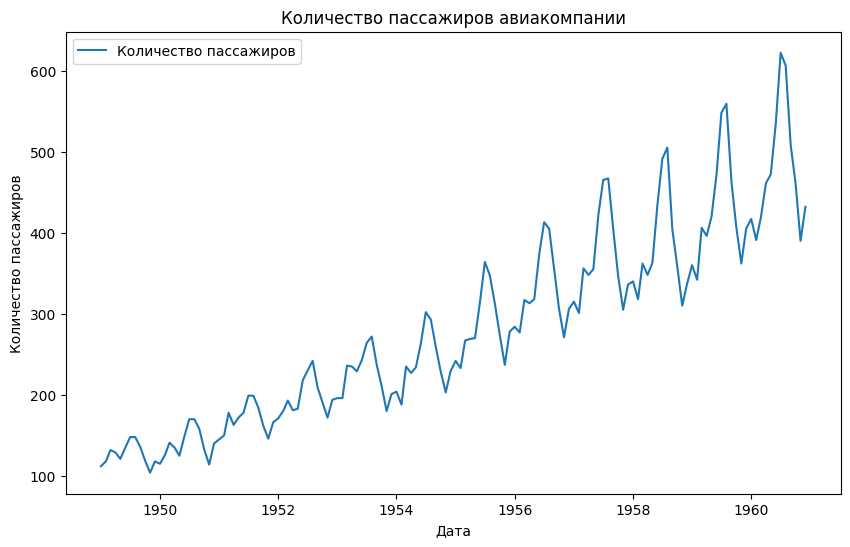

Тест на стационарность для исходных данных:
ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Ряд нестационарен

Тест на стационарность для дифференцированных данных:
ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Ряд нестационарен


<Figure size 1000x600 with 0 Axes>

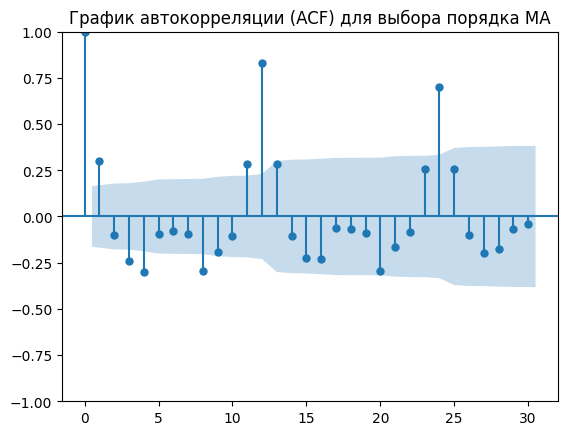

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MA(1) - AIC: 1618.8625271605572, BIC: 1627.771967059285


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MA(2) - AIC: 1522.1261435560086, BIC: 1534.0053967543126


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MA(3) - AIC: 1461.362056280841, BIC: 1476.211122778721


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

MA(4) - AIC: 1455.4623034700558, BIC: 1473.2811832675118


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MA(5) - AIC: 1481.5652852864796, BIC: 1502.3539783835115
MA(6) - AIC: 1450.5117545992575, BIC: 1474.2702609958656


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

MA(7) - AIC: 1442.3261305201754, BIC: 1469.0544502163593


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting para

MA(8) - AIC: 1387.7546787346905, BIC: 1417.4528117304505
MA(9) - AIC: 1387.6368967733206, BIC: 1420.3048430686565

Оптимальный порядок модели MA по AIC: 9
Оптимальный порядок модели MA по BIC: 8

Строим модель MA(9) с наилучшим q...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Оцененные параметры модели MA(9):
const     280.279971
ma.L1       1.393712
ma.L2       1.594322
ma.L3       1.312339
ma.L4       1.330946
ma.L5       1.615291
ma.L6       1.498907
ma.L7       1.110329
ma.L8       0.122809
ma.L9       0.115313
sigma2    656.318388
dtype: float64


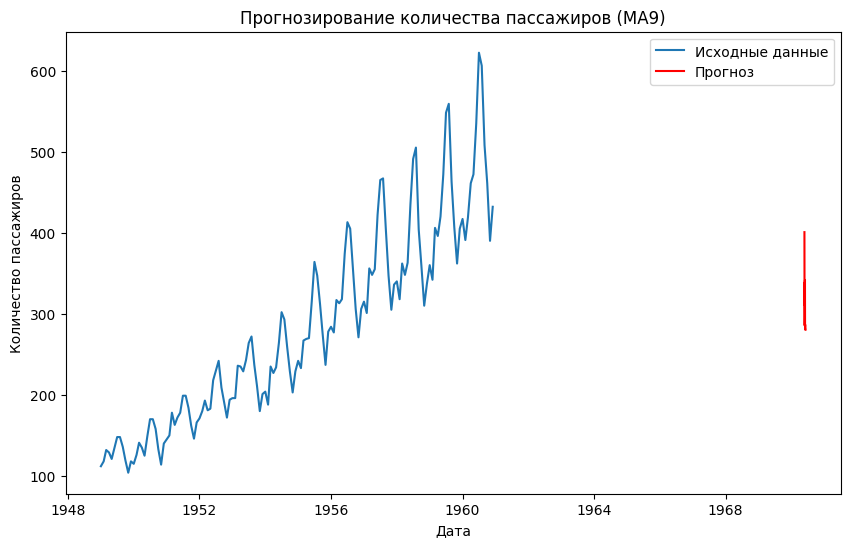

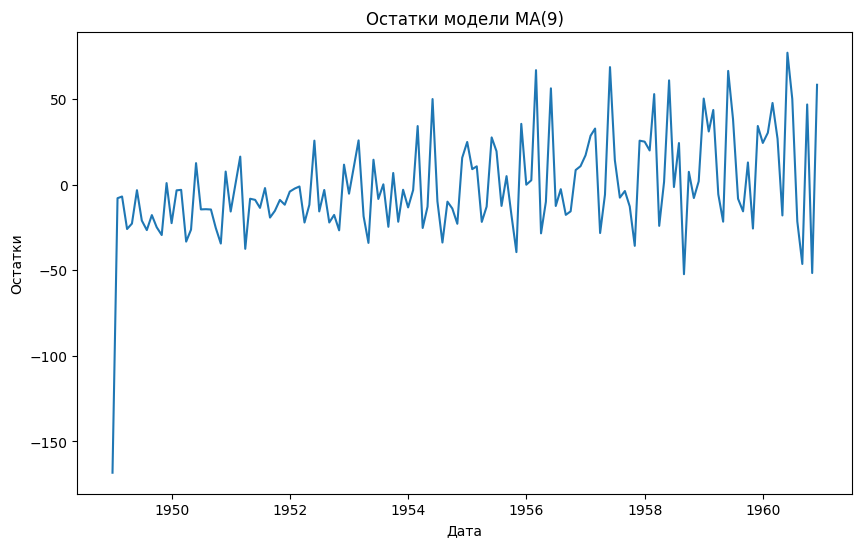

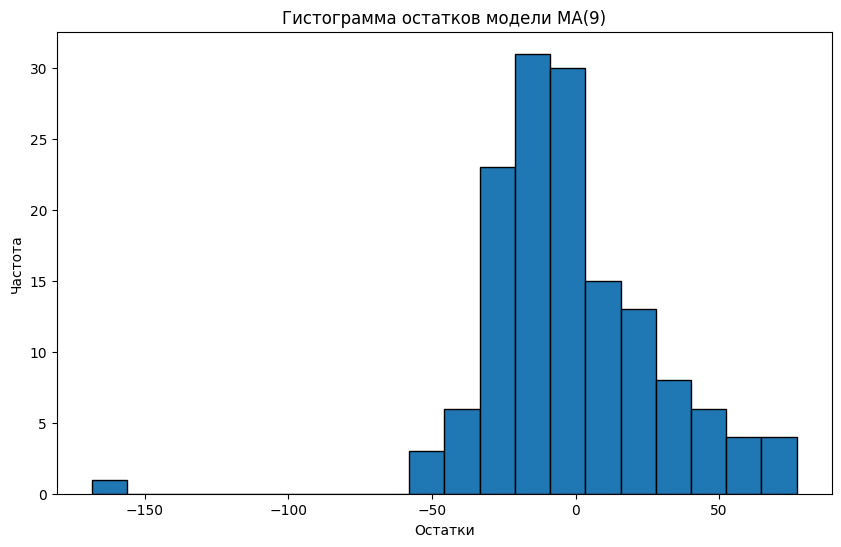


Тест Шапиро-Уилка на нормальность остатков:
Statistic: 0.9047088099191578, p-value: 4.0825134981477464e-08
Остатки не распределены нормально.

Результат теста Лью-Люса на автокорреляцию остатков:
      lb_stat  lb_pvalue
10  20.774473   0.022722


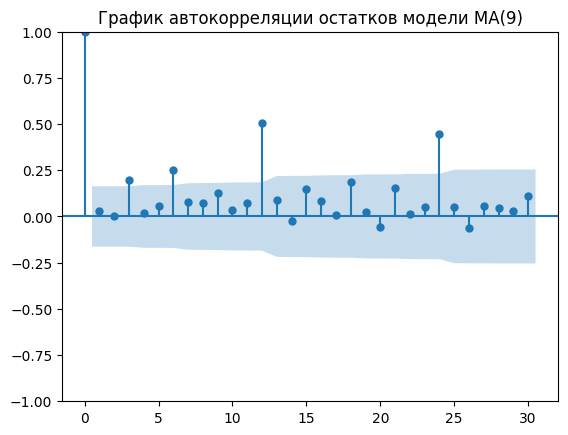

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats

# Загружаем датасет
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Визуализируем исходные данные
plt.figure(figsize=(10,6))
plt.plot(data, label='Количество пассажиров')
plt.title('Количество пассажиров авиакомпании')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

# Тест на стационарность (ADF)
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("Ряд стационарен")
    else:
        print("Ряд нестационарен")

# Применяем тест на стационарность к исходным данным
print("Тест на стационарность для исходных данных:")
adf_test(data)

# Преобразование данных, если они нестационарны
# Применяем дифференцирование, если ряд нестационарен
data_diff = data.diff().dropna()

# Тест на стационарность для разности
print("\nТест на стационарность для дифференцированных данных:")
adf_test(data_diff)

# 1. Подбор оптимального q с помощью графика ACF
plt.figure(figsize=(10,6))
plot_acf(data_diff, lags=30)
plt.title("График автокорреляции (ACF) для выбора порядка MA")
plt.show()

# 2. Подбор q с помощью AIC и BIC для различных значений q
best_aic = np.inf
best_bic = np.inf
best_q_aic = None
best_q_bic = None

for q in range(1, 10):  # Пробуем различные значения q от 1 до 9
    model = ARIMA(data, order=(0, 0, q))  # MA(q) модель
    model_fit = model.fit()

    # Сравниваем AIC и BIC
    if model_fit.aic < best_aic:
        best_aic = model_fit.aic
        best_q_aic = q
    if model_fit.bic < best_bic:
        best_bic = model_fit.bic
        best_q_bic = q

    print(f"MA({q}) - AIC: {model_fit.aic}, BIC: {model_fit.bic}")

# Выводим наилучшие значения q по AIC и BIC
print("\nОптимальный порядок модели MA по AIC:", best_q_aic)
print("Оптимальный порядок модели MA по BIC:", best_q_bic)

# 3. Строим модель MA с наилучшим q (по AIC или BIC)
optimal_q = best_q_aic  # Используем лучший q по AIC
print(f"\nСтроим модель MA({optimal_q}) с наилучшим q...")
model = ARIMA(data, order=(0, 0, optimal_q))
model_fit = model.fit()

# Выводим параметры модели MA
print("\nОцененные параметры модели MA({}):".format(optimal_q))
print(model_fit.params)

# 4. Прогнозирование на следующие 12 месяцев
forecast = model_fit.forecast(steps=12)

# Визуализируем результаты: исходные данные и прогноз
plt.figure(figsize=(10,6))
plt.plot(data, label='Исходные данные')
plt.plot(np.arange(len(data), len(data)+12), forecast, label='Прогноз', color='red')
plt.title(f'Прогнозирование количества пассажиров (MA{optimal_q})')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

# Диагностика остатков модели

# Остатки модели
residuals = model_fit.resid

# 1. График остатков
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Остатки модели MA({})'.format(optimal_q))
plt.xlabel('Дата')
plt.ylabel('Остатки')
plt.show()

# 2. Гистограмма остатков
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Гистограмма остатков модели MA({})'.format(optimal_q))
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

# Тест на нормальность остатков (тест Шапиро-Уилка)
w_stat, p_value = stats.shapiro(residuals)
print("\nТест Шапиро-Уилка на нормальность остатков:")
print(f"Statistic: {w_stat}, p-value: {p_value}")

if p_value > 0.05:
    print("Остатки распределены нормально.")
else:
    print("Остатки не распределены нормально.")

# 3. Тест Лью-Люса на автокорреляцию остатков
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nРезультат теста Лью-Люса на автокорреляцию остатков:")
print(ljung_box_test)

# 4. График автокорреляции остатков
plot_acf(residuals, lags=30)
plt.title("График автокорреляции остатков модели MA({})".format(optimal_q))
plt.show()

### Вывод

#### Тест на стационарность исходных данных:
Результаты применения теста на стационарность **ADF** для исходных данных показали, что **статистика ADF** равна 0.8153688792060498, а **p-значение** составляет 0.991880243437641. Так как p-значение значительно больше уровня значимости (обычно 0.05), гипотеза о стационарности не отвергается, что означает, что исходный ряд не является стационарным.

#### Тест на стационарность для дифференцированных данных:
После дифференцирования ряда, результат теста **ADF** показал статистику -2.8292668241700047 с p-значением 0.05421329028382478. Хотя p-значение близко к 0.05, оно все еще не позволяет отвергнуть нулевую гипотезу о стационарности. Следовательно, можно заключить, что дифференцированный ряд все еще может иметь некоторые признаки нестационарности.

#### Оценка модели MA(q):
Результаты оценки модели скользящего среднего MA для различных значений \(q\) (порядка модели) показали, что наилучший порядок модели для минимизации **AIC** (критерия информационного подхода Акаике) и **BIC** (критерия Байеса) соответствует \(q = 9\) для AIC и \(q = 8\) для BIC. Это свидетельствует о том, что для выбора порядка модели необходимо учитывать как AIC, так и BIC, и, в зависимости от предпочтений, можно использовать оба критерия.

При этом оцененные параметры модели MA(9) включают константу и 9 коэффициентов для влияния предыдущих ошибок. Значения коэффициентов \(\theta_1, \dots, \theta_9\) варьируются, что указывает на значительное влияние ошибок на предсказания модели. Особенно выделяется влияние первых нескольких ошибок, с высокими значениями для \(\theta_1\), \(\theta_2\), \(\theta_3\) и других, что подтверждает важность учета нескольких предыдущих ошибок для точности модели.

#### Оценка остатков модели:
- **Тест Шапиро-Уилка** на нормальность остатков показал, что остатки модели не распределены нормально (p-значение 4.0825134981477464e-08). Это может свидетельствовать о присутствии в остатках значительных отклонений от нормального распределения, что требует дополнительных проверок и возможной модификации модели.
  
- **Тест Лью-Люса** на автокорреляцию остатков показал статистику 20.774473 с p-значением 0.022722. Это указывает на наличие автокорреляции в остатках модели, что также является предупреждением о том, что модель может быть не полностью адекватной, и требуется дополнительная диагностика для учета автокорреляции.

#### Заключение:
Несмотря на то, что выбранная модель MA(9) продемонстрировала наименьшие значения AIC и BIC, результаты диагностики остатков показывают наличие признаков неадекватности модели: остатки не распределены нормально, и присутствует автокорреляция. Это указывает на необходимость доработки модели, возможно, с использованием более сложных методов, таких как ARIMA или SARIMA, которые могут учитывать не только ошибки, но и зависимости от наблюдаемых значений.

#**Модель авторегрессии AR(p)**

Модель авторегрессии для временного ряда можно записать следующим образом:

$$
y_t = \alpha + \phi_1 y_{t-1} + \dots + \phi_p y_{t-p} + \varepsilon_t,
$$

где $y_t$ — это стационарный ряд, а $\varepsilon_t$ — гауссовский белый шум, то есть $\varepsilon_t \sim N(0, \sigma^2)$ и независимы между собой. Отметим, что для стационарности ряда необходимы определённые условия на коэффициенты $\phi_1, \dots, \phi_p$.

По сути, наш ряд $y_t$ выражается как сумма некоторого фиксированного числа $\alpha$, значения белого шума в текущий момент времени $\varepsilon_t$, а также линейной комбинации не более $p$ предыдущих значений ряда, умноженных на соответствующие коэффициенты $\phi_1, \dots, \phi_p$, которые являются параметрами модели.

Другими словами, модель AR(p) — это модель линейной регрессии, для которой:

- **Таргет**: $y_t$ — значение ряда в момент времени $t$.
- **Признаки**: $y_{t-1}, \dots, y_{t-p}$ — значения ряда в предыдущие моменты времени.

Введём оператор сдвига $L$, который обладает следующими свойствами:

- Применение оператора $L$ к ряду даёт его предыдущее значение: $L y_t = y_{t-1}$.
- Применение оператора $L$ к белому шуму даёт его предыдущее значение: $L \varepsilon_t = \varepsilon_{t-1}$.
- Применение оператора $L$ к константе остаётся константой: $L c = c$.

Оператор $L$ иногда называют также **лаговым оператором**. Можно рассматривать функции от оператора сдвига, например, кратное применение оператора $L$:

$$
L^2 y_t = L(L y_t) = L(y_{t-1}) = y_{t-2},
$$

или

$$
L^{-1} y_t = y_{t+1}.
$$


### Лаговый многочлен и его использование

Для записи некоторых моделей временных рядов, особенно авторегрессионных моделей, удобно использовать **лаговый многочлен**. Лаговый многочлен — это выражение, включающее оператор сдвига $L$, который действует на временной ряд. С помощью такого подхода можно записать зависимость текущего значения ряда от его предыдущих значений компактно и математически строго.

Лаговый многочлен для модели AR(p) записывается как:

$$
\phi(L) = \sum_{i=1}^{p} \phi_i L^i,
$$

где:
- $\phi_1, \phi_2, \dots, \phi_p$ — коэффициенты авторегрессии, определяющие, как сильно каждое из предыдущих значений ряда влияет на текущее значение,
- $L$ — оператор сдвига, который действует на временной ряд $y_t$, сдвигая его на один или несколько периодов назад. То есть $L y_t = y_{t-1}$, $L^2 y_t = y_{t-2}$, и так далее.

Оператор $L$ помогает выразить авторегрессионную модель в виде полинома, который зависит от $L$. Это позволяет работать с временным рядом в терминах его предыдущих значений и коэффициентов, что упрощает анализ и вычисления.

### Обратный оператор к $\phi(L)$

Когда мы работаем с лаговыми многочленами, важным инструментом является **обратный оператор**. Обратным к многочлену $\phi(L)$ называется такой оператор $\phi^{-1}(L)$, что выполняется следующее равенство:

$$
\phi(L) \phi^{-1}(L) y_t = \phi^{-1}(L) \phi(L) y_t = y_t.
$$

Это свойство аналогично тому, как для чисел существует обратная операция (например, для числа 2 обратное значение — это $1/2$), но здесь речь идет об операторах, действующих на временной ряд. Операторы $\phi(L)$ и $\phi^{-1}(L)$ действуют таким образом, что их последовательное применение возвращает исходное значение временного ряда $y_t$.

### Геометрическое разложение для $|\phi| < 1$

Теперь давайте рассмотрим важную деталь — что происходит, когда $\phi$ является числом, и мы рассматриваем операторы, связанные с этим числом. Если $\phi$ является числовым значением и $|\phi| < 1$, то мы можем записать выражение для оператора $\frac{1}{1 - \phi L}$ в виде бесконечной суммы.

Для случая $\frac{1}{1 - \phi L}$ можно записать разложение в **геометрическую серию**:

$$
\frac{1}{1 - \phi L} = (1 - \phi L)^{-1} = \sum_{i=0}^{\infty} \phi^i L^i.
$$

Это разложение называется **рядом Тейлора** и применяется только в случае, когда $|\phi| < 1$, что гарантирует сходимость ряда. Разложение показывает, как можно представить обратный оператор как бесконечную сумму членов, каждый из которых включает более высокие степени оператора сдвига $L$.

- $\phi^0 = 1$, так что первое слагаемое — это 1, представляющее текущее значение временного ряда.
- Следующие слагаемые $\phi^i L^i$ представляют влияние более ранних значений временного ряда: $L^1$ — на один шаг назад, $L^2$ — на два шага назад и так далее.

Таким образом, это разложение позволяет выразить обратный оператор как линейную комбинацию сдвигов значений временного ряда, что очень полезно для аналитического выражения зависимостей и прогнозирования.

### Пример для модели AR(p)

Теперь давайте применим все эти концепции к авторегрессионной модели порядка $p$ (AR(p)), которая описывает временной ряд через его собственные предыдущие значения. Модель AR(p) можно записать как:

$$
y_t = \alpha + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t,
$$

где:
- $y_t$ — значение ряда в момент времени $t$,
- $\alpha$ — константа, которая может быть интерпретирована как среднее значение ряда,
- $\phi_1, \phi_2, \dots, \phi_p$ — коэффициенты модели, которые показывают, как сильно значения ряда в моменты времени $t-1, t-2, \dots, t-p$ влияют на значение в момент времени $t$,
- $\varepsilon_t$ — белый шум, который моделирует случайные ошибки.

С помощью оператора сдвига $L$, можно переписать модель AR(p) в более компактной форме:

$$
a(L) y_t = \alpha + \varepsilon_t,
$$

где $a(L)$ — это **характеристический полином** модели, записанный как:

$$
a(L) = 1 - \phi_1 L - \phi_2 L^2 - \dots - \phi_p L^p.
$$

Здесь полином $a(L)$ выражает зависимость текущего значения ряда от его предыдущих значений через операторы сдвига $L$. Это позволяет переписать исходное уравнение модели в более удобной форме для анализа.

### Характеристический полином

**Характеристический полином** $a(L)$ играет ключевую роль в анализе временных рядов. Он используется для того, чтобы:
- Оценивать, как сильно предшествующие значения влияют на текущее значение,
- Анализировать устойчивость модели и её предсказательные способности,
- Решать уравнения для нахождения корней, которые могут помочь в определении свойств временного ряда, таких как его стационарность.

Если полином $a(L)$ имеет корни внутри единичного круга в комплексной плоскости, это означает, что модель будет стационарной, что является важным условием для применения авторегрессионных моделей.


Чтобы более подробно объяснить, как мы можем представить выражения с лаговым оператором как геометрическую серию, давайте разберем это пошагово, с подробным объяснением каждого этапа.

### Лаговый оператор и его действия

Прежде чем перейти к геометрической серии, нужно понять, как действует лаговый оператор $L$. Лаговый оператор $L$ действует на временной ряд таким образом, что:

$$
L y_t = y_{t-1}, \quad L^2 y_t = y_{t-2}, \quad L^3 y_t = y_{t-3}, \quad \dots.
$$

То есть оператор $L$ сдвигает значение ряда на один шаг назад. Таким образом, если мы применим $L$ к ряду, то мы получим его значения в прошлом.

### Геометрическая серия

Геометрическая серия — это сумма членов, каждый из которых является результатом умножения предыдущего на фиксированное число. В контексте авторегрессионных моделей (например, AR(1)) это число обычно является коэффициентом авторегрессии $\phi$. Геометрическая серия имеет следующий вид:

$$
S = a + ar + ar^2 + ar^3 + \dots,
$$

где:
- $a$ — первый член серии,
- $r$ — множитель (коэффициент) для каждого следующего члена.

Геометрическая серия сходится, если $|r| < 1$, и в этом случае её сумма выражается как:

$$
S = \frac{a}{1 - r}.
$$

Теперь применим это к моделям временных рядов с лаговым оператором.

### Пример: Модель AR(1)

Рассмотрим авторегрессионную модель первого порядка (AR(1)):

$$
y_t = \alpha + \phi y_{t-1} + \varepsilon_t.
$$

Где $\alpha$ — это константа, $\phi$ — коэффициент авторегрессии, а $\varepsilon_t$ — белый шум.

Мы можем переписать это уравнение с использованием оператора сдвига $L$ следующим образом:

$$
y_t = \alpha + \phi L y_t + \varepsilon_t.
$$

Теперь решим это уравнение относительно $y_t$. Мы получаем:

$$
y_t = \frac{\alpha + \varepsilon_t}{1 - \phi L}.
$$

Здесь $\frac{1}{1 - \phi L}$ — это выражение, которое напоминает геометрическую серию. Давайте подробнее разберем, как это связано с геометрической серией.

### Разложение в геометрическую серию

Выражение $\frac{1}{1 - \phi L}$ можно разложить как бесконечную геометрическую серию. Мы можем это сделать, если $|\phi| < 1$, что гарантирует сходимость ряда.

$$
\frac{1}{1 - \phi L} = 1 + \phi L + \phi^2 L^2 + \phi^3 L^3 + \dots.
$$

Это разложение по сути является геометрической серией, где $r = \phi$, а каждый следующий член этой серии — это более высокий сдвиг оператора $L$, умноженный на соответствующую степень $\phi$. Давайте проиллюстрируем это:

$$
y_t = (\alpha + \varepsilon_t) \cdot (1 + \phi L + \phi^2 L^2 + \phi^3 L^3 + \dots).
$$

Теперь, давайте разберем, что означает каждое слагаемое:

1. $1 \cdot (\alpha + \varepsilon_t)$ — это текущее значение, то есть $y_t$ в момент времени $t$.
2. $\phi L \cdot (\alpha + \varepsilon_t)$ — это сдвиг на один период назад. Здесь $\phi$ умножается на $y_{t-1}$ (предыдущее значение временного ряда).
3. $\phi^2 L^2 \cdot (\alpha + \varepsilon_t)$ — это сдвиг на два периода назад. Здесь $\phi^2$ умножается на $y_{t-2}$.
4. $\phi^3 L^3 \cdot (\alpha + \varepsilon_t)$ — это сдвиг на три периода назад, и так далее.

### Почему это геометрическая серия

Мы видим, что каждый следующий член серии — это степень коэффициента $\phi$, умноженная на предыдущие значения временного ряда, сдвиг которых осуществляется с помощью оператора $L$. Это классический пример **геометрической прогрессии**, где коэффициент прогрессии — это $\phi$, а члены прогрессии соответствуют предыдущим значениям ряда, умноженным на различные степени $\phi$.

### Геометрическая серия в контексте авторегрессионной модели

Таким образом, если $|\phi| < 1$, то мы можем представить решение модели AR(1) как сумму геометрической серии, где каждый следующий член учитывает влияние более ранних значений на текущее значение:

$$
y_t = (\alpha + \varepsilon_t) \cdot \left( 1 + \phi L + \phi^2 L^2 + \phi^3 L^3 + \dots \right).
$$

Это разложение помогает понять, как текущие значения временного ряда зависят от его предыдущих значений и как их влияние постепенно уменьшается с увеличением лагов.

### Пример числового разложения

Предположим, что $\phi = 0.5$. Тогда разложение $\frac{1}{1 - 0.5L}$ будет следующим:

$$
\frac{1}{1 - 0.5L} = 1 + 0.5L + 0.25L^2 + 0.125L^3 + \dots.
$$

Это означает, что текущее значение $y_t$ будет зависеть от предыдущих значений ряда, при этом влияние более удаленных значений будет уменьшаться по мере увеличения лагов. Математически это выражается через степень $\phi$, которая сокращает влияние на более дальние значения ряда.


Таким образом, разложение выражения $\frac{1}{1 - \phi L}$ как геометрической серии позволяет более наглядно и аналитически понять, как текущие значения временного ряда зависят от предыдущих. Геометрическая серия представляет собой простую и эффективную модель для вычисления влияния прошлых значений, что является важным инструментом в анализе авторегрессионных моделей временных рядов.


### Важные утверждения о стационарных процессах:

**1. Любой стационарный процесс можно представить как модель скользящего среднего с бесконечным числом слагаемых (MA(∞))**

Для начала важно понять, что такое **стабильный процесс** или **стабильность временного ряда**. Процесс называется **стабильным (или стационарным)**, если его статистические характеристики (например, среднее, дисперсия, ковариация) не зависят от времени. Проще говоря, если вы возьмете два одинаковых интервала времени, то в обоих интервалах процесс будет вести себя одинаково.

Теперь, одно важное утверждение заключается в том, что **любой стационарный процесс можно выразить как модель скользящего среднего с бесконечным числом слагаемых**, то есть **MA(∞)**.

Модель **MA(∞)** (скользящее среднее с бесконечным числом слагаемых) означает, что текущее значение процесса зависит от **неограниченного количества** случайных величин (или ошибок) в прошлом. Эти случайные величины могут быть как конечным, так и бесконечным числом, но результат будет похожим на скользящее среднее, где каждое значение зависит от предыдущих случайных ошибок.

Этот результат известен как **теорема Волда о декомпозиции временного ряда**. Теорема говорит, что **любой стационарный процесс можно разложить на сумму этих случайных ошибок (или отклонений)**.

**2. Модель AR(p) задает стационарный временной ряд тогда и только тогда, когда все комплексные корни уравнения $a(z) = 0$ лежат вне единичного круга**

Теперь давайте рассмотрим **модель AR(p)** (авторегрессионная модель порядка p), которая описывает процесс, где каждое значение зависит от нескольких предыдущих значений самого процесса. Математически модель выглядит так:

$$
y_t = \alpha + \sum_{i=1}^{p} \phi_i y_{t-i} + \varepsilon_t,
$$
где:
- $y_t$ — это значение процесса в момент времени $t$,
- $\phi_i$ — коэффициенты модели, которые показывают, как сильно значение в прошлом влияет на текущее значение,
- $\varepsilon_t$ — случайная ошибка или шум, который добавляется к модели,
- $p$ — порядок модели, то есть сколько предыдущих значений процесса используется для предсказания текущего.

Это утверждение говорит о том, что модель AR(p) будет стационарной только в том случае, если **все корни** уравнения $a(z) = 0$, которое связано с моделью AR(p), **лежат вне единичного круга** в комплексной плоскости.

**Что такое корни уравнения и единичный круг?**

- Уравнение $a(z)$ связано с коэффициентами модели AR(p) и имеет вид:

$$
a(z) = 1 - \sum_{i=1}^{p} \phi_i z^{-i}.
$$

- Комплексные корни этого уравнения — это такие значения $z$, для которых $a(z) = 0$. Эти корни играют важную роль в определении стационарности модели.
- **Единичный круг** в комплексной плоскости — это круг с радиусом 1, который находится в начале координат (то есть его центр в точке 0).

**Почему это условие важно?**

Если все корни $a(z) = 0$ находятся **вне единичного круга**, то модель будет стационарной. Это означает, что процесс не будет "взрываться" и его статистические характеристики не будут изменяться со временем.

Если хотя бы один из корней лежит **внутри единичного круга** или на его **границе**, то процесс **будет нестабильным**, и его значения будут расти или колебаться бесконечно, что делает модель **нестабильной**.

### Пояснение второго утверждения

Чтобы понять, почему корни уравнения $a(z) = 0$ должны лежать вне единичного круга, давайте рассмотрим разложение этого уравнения.

Предположим, что $z_1, z_2, ..., z_p$ — это все комплексные корни уравнения $a(z) = 0$. Тогда уравнение $a(z)$ можно записать в виде:

$$
a(z) = (z - z_1)(z - z_2) \cdots (z - z_p).
$$

Важное представление, которое также можно записать как:

$$
a(z) = \prod_{i=1}^{p} (1 - \frac{z}{z_i}),
$$
где $z_i$ — это корни уравнения.

Теперь, когда мы разлагаем временной ряд на простые дроби, то у нас могут возникнуть выражения вида:

$$
\frac{\varepsilon_t}{1 - L z_j},
$$
где $L$ — это оператор задержки (например, $L y_t = y_{t-1}$), а $z_j$ — корни уравнения.

Если хотя бы один из $z_j$ лежит **внутри единичного круга** или **на его границе**, то этот член будет **расходящимся**. То есть такие члены приведут к тому, что временной ряд будет иметь тенденцию к бесконечности, что делает его **нестабильным**.

#### Как это связано с реальными процессами?

Если вы работаете с реальными временными рядами, например, с экономическими данными или с данными о погоде, то стационарность имеет важное значение. Стационарный процесс легче анализировать, так как его поведение можно предсказать, основываясь на его прошлых значениях.




### Рассмотрим модель AR(1)

Модель **AR(1)** (авторегрессионная модель первого порядка) — это простая модель, где текущее значение временного ряда зависит от его предыдущего значения и случайной ошибки (шума). Математически модель AR(1) записывается так:

$$
y_t = \alpha + \phi y_{t-1} + \varepsilon_t,
$$
где:
- $y_t$ — это значение процесса в момент времени $t$,
- $\alpha$ — это константа (среднее значение),
- $\phi$ — коэффициент авторегрессии,
- $y_{t-1}$ — это предыдущее значение ряда,
- $\varepsilon_t$ — это случайная ошибка или белый шум.

### 1. Характеристика уравнения для модели AR(1)

Чтобы записать характеристическое уравнение для модели AR(1), используем её **полиномиальное представление**.

Представим процесс AR(1) в виде уравнения:

$$
y_t - \alpha = \phi (y_{t-1} - \alpha) + \varepsilon_t.
$$

Теперь применим оператор задержки $L$ (оператор, который сдвигает временной ряд на один период назад):

$$
L y_t = y_{t-1}.
$$

Тогда уравнение для модели AR(1) можно переписать так:

$$
(1 - \phi L) y_t = \alpha + \varepsilon_t.
$$

Это уравнение показывает зависимость текущего значения $y_t$ от предыдущих значений и случайного шума.

### 2. Характеристическое уравнение

Теперь можно записать характеристическое уравнение для модели AR(1). Оно получается путём замены всех $y_t$ на $z^t$ (где $z$ — комплексная переменная), что помогает анализировать корни уравнения. В результате получаем следующее характеристическое уравнение:

$$
1 - \phi z = 0.
$$

### 3. Корень характеристического уравнения

Решение этого уравнения даёт корень:

$$
z = \frac{1}{\phi}.
$$

Этот корень важен для понимания стабильности (стационарности) модели. Если $|\phi| < 1$, то корень $z = \frac{1}{\phi}$ лежит за пределами единичного круга на комплексной плоскости, и модель будет **стационарной**. Если $|\phi| \geq 1$, то процесс будет нестабильным и нестационарным.


Для модели **AR(2)** (авторегрессионной модели второго порядка) характеристическое уравнение будет записываться аналогично, но с учетом двух предыдущих значений временного ряда.

### Модель AR(2)

Модель AR(2) записывается следующим образом:

$$
y_t = \alpha + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \varepsilon_t,
$$
где:
- $y_t$ — это значение временного ряда в момент времени $t$,
- $y_{t-1}$ и $y_{t-2}$ — значения временного ряда в предыдущие моменты времени,
- $\alpha$ — константа (среднее значение),
- $\phi_1$ и $\phi_2$ — коэффициенты авторегрессии для первого и второго лагов соответственно,
- $\varepsilon_t$ — случайный шум или ошибка.

### 1. Запись уравнения в полиномиальной форме

Сначала выразим модель AR(2) в виде уравнения с использованием полиномиального представления:

$$
y_t - \alpha = \phi_1 (y_{t-1} - \alpha) + \phi_2 (y_{t-2} - \alpha) + \varepsilon_t.
$$

Теперь применим оператор задержки $L$, который действует на все значения временного ряда:

$$
L y_t = y_{t-1}, \quad L^2 y_t = y_{t-2}.
$$

Таким образом, уравнение для модели AR(2) можно записать в следующем виде:

$$
(1 - \phi_1 L - \phi_2 L^2) y_t = \alpha + \varepsilon_t.
$$

### 2. Характеристическое уравнение

Для записи характеристического уравнения используем полиномиальное представление и заменим все $y_t$ на $z^t$. Получаем следующее характеристическое уравнение:

$$
1 - \phi_1 z - \phi_2 z^2 = 0.
$$

Это и есть характеристическое уравнение для модели AR(2).

### 3. Нахождение корней характеристического уравнения

Решение характеристического уравнения $1 - \phi_1 z - \phi_2 z^2 = 0$ позволяет найти корни, которые будут иметь вид:

$$
z_1 \quad \text{и} \quad z_2,
$$
где $z_1$ и $z_2$ — это корни характеристического уравнения.

Эти корни важны для анализа **стационарности** модели. Модель будет стационарной, если **все корни характеристического уравнения** лежат **вне единичного круга** на комплексной плоскости, то есть:

$$
|z_1| > 1 \quad \text{и} \quad |z_2| > 1.
$$

Если хотя бы один из корней лежит внутри или на единичном круге, то модель будет **нестационарной**.

### 4. Пример

Допустим, у нас есть модель AR(2) с параметрами $\phi_1 = 0.5$ и $\phi_2 = -0.3$. Тогда характеристическое уравнение будет следующим:

$$
1 - 0.5z + 0.3z^2 = 0.
$$

Чтобы найти корни этого уравнения, можно использовать методы решения квадратных уравнений, например, с помощью дискриминанта:

$$
z = \frac{-(-0.5) \pm \sqrt{(-0.5)^2 - 4 \cdot 0.3 \cdot 1}}{2 \cdot 0.3}.
$$

В этом случае получим два корня, и в зависимости от их величины можно судить о стационарности модели.



### Резюме

Для модели **AR(2)** характеристическое уравнение имеет вид:

$$
1 - \phi_1 z - \phi_2 z^2 = 0.
$$

Корни этого уравнения, $z_1$ и $z_2$, определяют стационарность модели. Модель будет стационарной, если все корни лежат за пределами единичного круга, то есть $|z_1| > 1$ и $|z_2| > 1$.


### 2. Условие стационарности модели AR(1)

Модель AR(1) будет **стационарной** (то есть её статистические свойства не будут зависеть от времени) тогда и только тогда, когда **модуль коэффициента $\phi$ будет меньше 1**. То есть, модель будет стационарной, если:

$$
|\phi| < 1.
$$

Если это условие выполнено, то модель AR(1) будет стабильной, и её статистические характеристики не будут меняться со временем.

Также важно заметить, что значение $\phi$ показывает, насколько сильно текущее значение зависит от предыдущего. Чем **меньше** $\phi$, тем **меньше** вклад прошлого значения $y_{t-1}$ в текущее значение $y_t$. Когда $\phi$ близко к 1, то текущее значение сильно зависит от предыдущего.



### 3. Ожидаемые значения и дисперсия

Если процесс стационарен, то можно вывести следующие ключевые статистические характеристики.

**Математическое ожидание:**

Математическое ожидание $E(y_t)$ процесса можно вычислить следующим образом. Возьмём математическое ожидание обеих сторон уравнения:

$$
E(y_t) = E(\alpha + \phi y_{t-1} + \varepsilon_t).
$$

Поскольку $\varepsilon_t$ — это белый шум с математическим ожиданием 0, то:

$$
E(\varepsilon_t) = 0,
$$

и уравнение упрощается до:

$$
E(y_t) = \alpha + \phi E(y_{t-1}).
$$

Так как ряд стационарен, то $E(y_t)$ не зависит от времени, и можно записать:

$$
E(y_t) = E(y_{t-1}) = m.
$$

Тогда получаем уравнение для математического ожидания:

$$
m = \alpha + \phi m.
$$

Отсюда:

$$
m = \frac{\alpha}{1 - \phi}.
$$

**Дисперсия:**

Дисперсия $D(y_t)$ временного ряда для стационарного процесса вычисляется следующим образом:

$$
D(y_t) = \sigma^2 \frac{1}{1 - \phi^2}.
$$

Здесь $\sigma^2$ — это дисперсия белого шума $\varepsilon_t$.

**Ковариация:**

Ковариация между значениями ряда на два разных момента времени $t$ и $t-h$ (где $h$ — это лаг) равна:

$$
\text{cov}(y_t, y_{t-h}) = \phi^h \cdot \frac{\sigma^2}{1 - \phi^2}.
$$



### 4. Поведение модели в зависимости от $\phi$

Теперь давайте рассмотрим, как поведение модели зависит от значения коэффициента $\phi$.

- **Если $|\phi| < 1$:** Тогда модель AR(1) будет **стационарной**. Мы можем представить этот ряд как модель **MA(∞)** (скользящее среднее с бесконечным числом слагаемых):

  $$
  y_t = \mu + \sum_{j=0}^{\infty} \phi^j \varepsilon_{t-j},
  $$
  где $\mu = \frac{\alpha}{1 - \phi}$ — это долгосрочное среднее значение.

- **Если $|\phi| = 1$:** В этом случае модель AR(1) превращается в **случайное блуждание** (или процесс случайного шага), где текущее значение процесса зависит от предыдущего, но изменения не уменьшаются со временем. Это означает, что процесс имеет тенденцию "блуждать" вокруг своего среднего значения и может двигаться в любом направлении без ограничения.

- **Если $|\phi| > 1$:** Тогда модель AR(1) становится **экспоненциально растущей**. Это означает, что процесс будет расти или уменьшаться экспоненциально, что делает модель **нестабильной** и нестационарной.



### 5. Визуализация

Визуализируя поведение процесса AR(1) для разных значений $\phi$, мы получаем следующие результаты:

- Для $|\phi| < 1$, временной ряд будет колебаться вокруг среднего значения и стабилизироваться.
- Для $|\phi| = 1$, временной ряд будет показывать случайные колебания (случайное блуждание).
- Для $|\phi| > 1$, временной ряд будет расти экспоненциально, что делает его нестабильным.

Таким образом:

Модель AR(1) позволяет описывать стационарные временные ряды, где каждое значение зависит от предыдущего, а также от случайного шума. Стационарность модели зависит от величины коэффициента $\phi$. Если $|\phi| < 1$, то модель стабилизируется и её статистические характеристики (среднее, дисперсия и ковариация) не изменяются со временем. Если $|\phi| = 1$, процесс становится случайным блужданием, а если $|\phi| > 1$, процесс становится нестабильным и экспоненциально растущим.

Надеюсь, это объяснение стало более понятным! Если есть вопросы, не стесняйтесь их задавать!




```
import numpy as np
import matplotlib.pyplot as plt

# Функция для генерации временного ряда AR(1)
def generate_ar1(phi, n=100, sigma=1):
    y = np.zeros(n)
    epsilon = np.random.normal(0, sigma, n)  # Генерация случайного шума
    for t in range(1, n):
        y[t] = phi * y[t-1] + epsilon[t]
    return y

# Параметры
n = 100
phi_values = [-0.5, 0.9, 1.0, 1.1]
titles = [
    "AR(1) с φ = -0.5 (отрицательный коэффициент)",
    "AR(1) с φ = 0.9 (положительный коэффициент)",
    "Случайное блуждание (φ = 1.0)",
    "Экспоненциальный рост (φ = 1.1)"
]

# Создание графиков
plt.figure(figsize=(12, 10))

for i, phi in enumerate(phi_values):
    y = generate_ar1(phi, n)
    plt.subplot(2, 2, i + 1)
    plt.plot(y, label=f'φ = {phi}')
    plt.title(titles[i])
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.axhline(0, color='black', lw=0.5, ls='--')  # Линия нуля
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()
```



ar1_modeling_2e6dc1d6f7_82d4f46e94.svg

- В первом случае мы имеем модель $y_t = -0.5y_{t-1} + \varepsilon_t$. Отрицательный коэффициент указывает на большие колебания ряда.
- Во втором случае модель $y_t = 0.9y_{t-1} + \varepsilon_t$, где большой положительный коэффициент делает ряд менее шумным.
- В третьем случае показаны несколько рядов вида случайного блуждания $y_t = y_{t-1} + \varepsilon_t$, что соответствует случаю $\varphi = 1$.
- В четвертом случае представлен экспоненциальный процесс $y_t = 1.1y_{t-1} + \varepsilon_t$. На графике шум практически не заметен из-за масштаба.

Теперь немного вернемся к модели MA($q$). Чуть выше мы выяснили, что при определенных условиях на коэффициенты $\varphi$ временной ряд модели AR($p$) будет стационарным, а значит, его можно представить в виде MA($\infty$). На самом деле, модель скользящего среднего порядка $q$ также можно записать через оператор $L$ следующим образом:

$$
y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q} = \mu + b(L)\varepsilon_t,
$$

где $b(z) = 1 + \theta_1 z + \dots + \theta_q z^q$ — характеристический многочлен. Для простоты предположим, что $\mu = 0$. Важным аспектом при такой записи является понятие обратимости, то есть представление в виде

$$
\varepsilon_t = b^{-1}(L) y_t,
$$

что означает, что ряд можно представить как бесконечную авторегрессионную модель. Как и в предыдущих рассуждениях, можно заключить, что временной ряд $y_t$ обратим, если все комплексные корни $b(z) = 0$ лежат вне единичного круга.

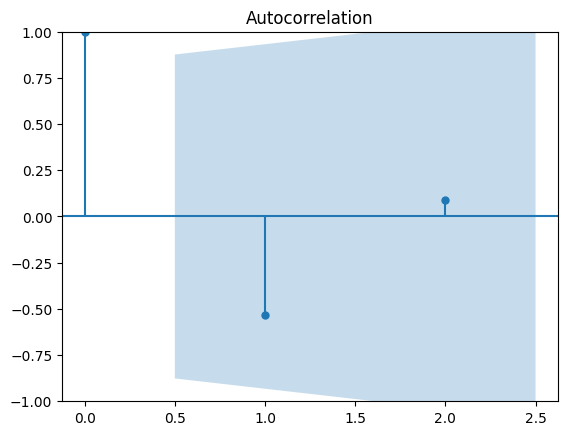

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Лучший параметр p: 2, AIC: 59.92751583314403


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Пример данных
data = {
    'Дата': ['2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04', '2024-11-05'],
    'Количество проданных единиц': [20, 50, 200, 10, 150]
}

df = pd.DataFrame(data)

# Преобразование даты в формат pandas
df['Дата'] = pd.to_datetime(df['Дата'])
df.set_index('Дата', inplace=True)

# Получение временного ряда
sales = df['Количество проданных единиц']

# Подбор параметра p для ARIMA через ACF (Автокорреляция)
from statsmodels.graphics.tsaplots import plot_acf

# Строим график автокорреляции
plot_acf(sales)
plt.show()

# Функция для подбора p (порядок AR) с использованием AIC
def select_best_p(data):
    best_aic = float('inf')
    best_p = 0

    # Пробуем различные значения p от 1 до 5
    for p in range(1, 6):
        model = ARIMA(data, order=(p, 0, 0))  # p, d=0 (без дифференцирования), q=0 (без MA)
        model_fitted = model.fit()

        # Сравниваем AIC для каждого значения p
        if model_fitted.aic < best_aic:
            best_aic = model_fitted.aic
            best_p = p

    return best_p, best_aic

# Подбор оптимального параметра p
best_p, best_aic = select_best_p(sales)
print(f"Лучший параметр p: {best_p}, AIC: {best_aic}")

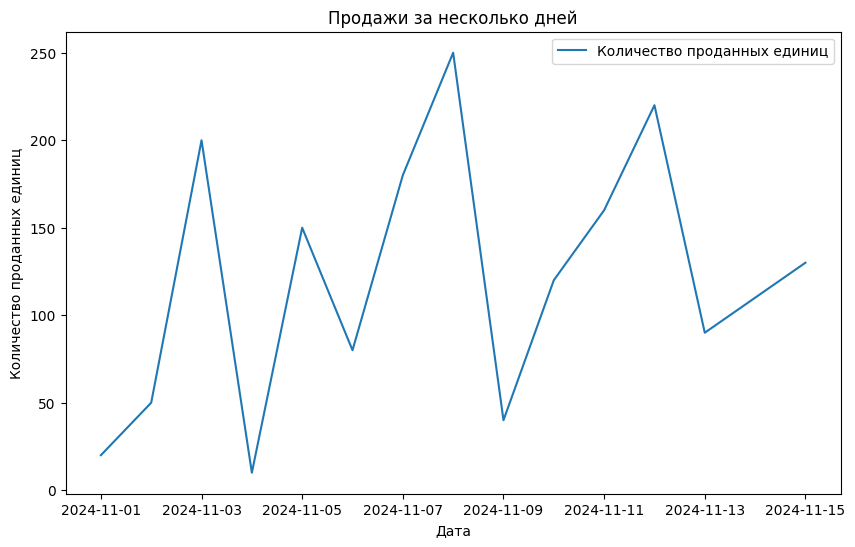

ADF Statistic: -2.532607144623628
p-value: 0.10774085696237806
Ряд нестационарен.
Тестирование p=1...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=2...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=3...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=4...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=5...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


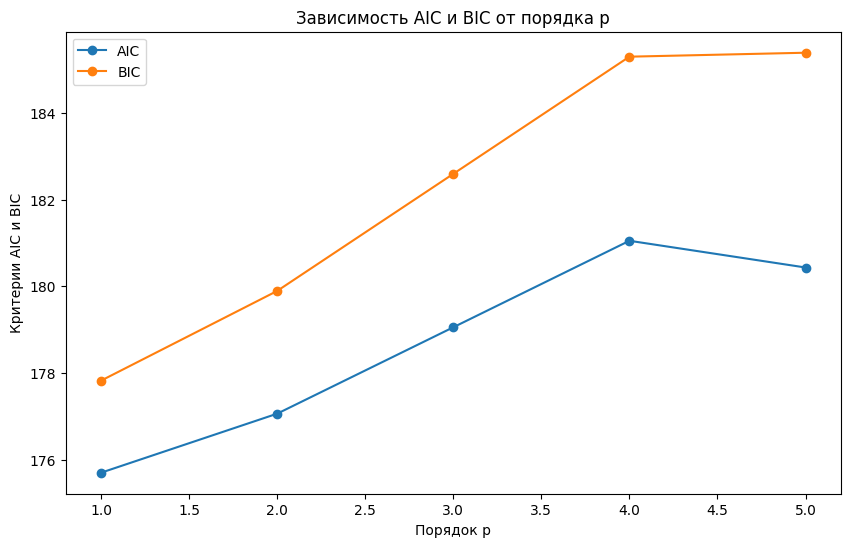

Оптимальный порядок модели (по AIC): p = 1
                                    SARIMAX Results                                    
Dep. Variable:     Количество проданных единиц   No. Observations:                   15
Model:                          ARIMA(1, 0, 0)   Log Likelihood                 -84.849
Date:                         Sat, 30 Nov 2024   AIC                            175.698
Time:                                 10:28:42   BIC                            177.822
Sample:                             11-01-2024   HQIC                           175.675
                                  - 11-15-2024                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.8180     16.061      7.585      0.000      90.339     153.297
ar.L1         -0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-3-0612609d2689>:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stat = coeff / stderr[i]


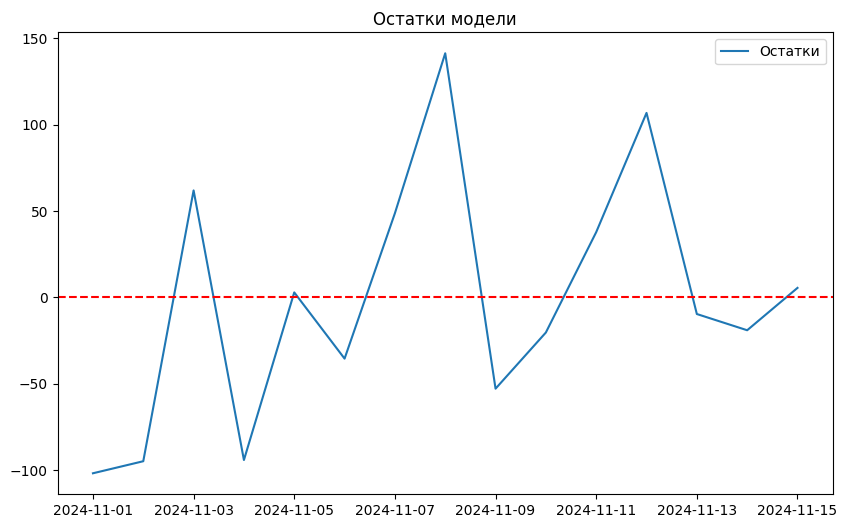


Результаты теста Льюнг-Бокса:
    lb_stat  lb_pvalue
1  0.005309   0.941915


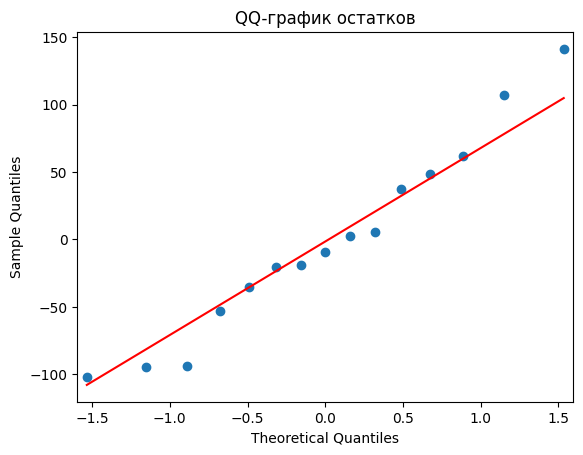

Статистика Шапиро-Уилка: 0.9587566990420049
p-value Шапиро-Уилка: 0.6707974097968611
Остатки распределены нормально.


<ipython-input-3-0612609d2689>:138: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train, test = sales[train_index], sales[test_index]
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-3-0612609d2689>:138: FutureWarning: Series.__getitem__ tr

Оптимальный p по кросс-валидации: 2


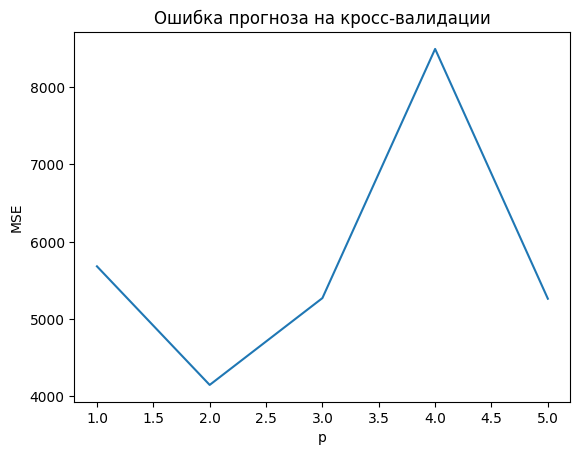

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import t

# Пример расширенных данных
data = {
    'Дата': ['2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04', '2024-11-05',
             '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
             '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15'],
    'Количество проданных единиц': [20, 50, 200, 10, 150, 80, 180, 250, 40, 120, 160, 220, 90, 110, 130]
}

# Создание DataFrame
df = pd.DataFrame(data)

# Преобразование даты в формат pandas
df['Дата'] = pd.to_datetime(df['Дата'])
df.set_index('Дата', inplace=True)

# Получение временного ряда
sales = df['Количество проданных единиц']

# 1. Визуализация данных
plt.figure(figsize=(10, 6))
plt.plot(sales, label="Количество проданных единиц")
plt.title("Продажи за несколько дней")
plt.xlabel("Дата")
plt.ylabel("Количество проданных единиц")
plt.legend()
plt.show()

# 2. Проверка стационарности (ADF-тест)
adf_result = adfuller(sales)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("Ряд стационарен.")
else:
    print("Ряд нестационарен.")

# 3. Перебор порядка p для AR модели
aic_values = []
bic_values = []
p_values = range(1, 6)  # Мы ограничим диапазон до 5 для небольшого примера

for p in p_values:
    try:
        print(f"Тестирование p={p}...")
        model = ARIMA(sales, order=(p, 0, 0)).fit()
        aic_values.append(model.aic)
        bic_values.append(model.bic)
    except ValueError as e:  # Ловим специфическую ошибку
        print(f"Ошибка при тестировании p={p}: {e}")
        aic_values.append(np.nan)
        bic_values.append(np.nan)
    except Exception as e:  # Ловим любые другие ошибки
        print(f"Неизвестная ошибка при тестировании p={p}: {e}")
        aic_values.append(np.nan)
        bic_values.append(np.nan)

# Визуализация AIC и BIC
plt.figure(figsize=(10, 6))
plt.plot(p_values, aic_values, marker="o", label="AIC")
plt.plot(p_values, bic_values, marker="o", label="BIC")
plt.xlabel("Порядок p")
plt.ylabel("Критерии AIC и BIC")
plt.title("Зависимость AIC и BIC от порядка p")
plt.legend()
plt.show()

# Оптимальный порядок
optimal_p = np.argmin(aic_values) + 1
print("Оптимальный порядок модели (по AIC): p =", optimal_p)

# 4. Обучение модели с оптимальным порядком
model = ARIMA(sales, order=(optimal_p, 0, 0))
result = model.fit()

print(result.summary())

# 5. Оценка модели и t-тест для коэффициентов
coefficients = result.params[1:]  # Коэффициенты AR
stderr = result.bse[1:]  # Стандартные ошибки

print("\nПроверка значимости коэффициентов:")
for i, coeff in enumerate(coefficients):
    t_stat = coeff / stderr[i]
    p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=len(sales) - optimal_p - 1))
    print(f"Коэффициент {i+1}: {coeff:.4f}, t-статистика: {t_stat:.4f}, p-value: {p_value:.4f}")

# 6. Диагностика модели
residuals = result.resid

# Остатки: Визуализация
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Остатки")
plt.axhline(0, linestyle="--", color="red")
plt.title("Остатки модели")
plt.legend()
plt.show()

# Тест Льюнг-Бокса на автокорреляцию остатков
ljung_box = acorr_ljungbox(residuals, lags=[optimal_p], return_df=True)
print("\nРезультаты теста Льюнг-Бокса:")
print(ljung_box)

# QQ-график остатков
sm.qqplot(residuals, line='s')
plt.title("QQ-график остатков")
plt.show()

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print("Статистика Шапиро-Уилка:", shapiro_test[0])
print("p-value Шапиро-Уилка:", shapiro_test[1])
if shapiro_test[1] > 0.05:
    print("Остатки распределены нормально.")
else:
    print("Остатки не распределены нормально.")

# 7. Кросс-валидация для выбора p
max_p = 5
tscv = TimeSeriesSplit(n_splits=3)  # Можно уменьшить количество разбиений для маленького датасета

errors = []

for p in range(1, max_p + 1):
    fold_errors = []
    for train_index, test_index in tscv.split(sales):
        train, test = sales[train_index], sales[test_index]
        model = ARIMA(train, order=(p, 0, 0)).fit()
        predictions = model.forecast(steps=len(test))
        fold_errors.append(mean_squared_error(test, predictions))
    errors.append(np.mean(fold_errors))

# Оптимальный p
optimal_p_cv = np.argmin(errors) + 1
print(f"Оптимальный p по кросс-валидации: {optimal_p_cv}")

# Визуализация ошибки прогноза для каждого p
plt.plot(range(1, max_p + 1), errors)
plt.title("Ошибка прогноза на кросс-валидации")
plt.xlabel("p")
plt.ylabel("MSE")
plt.show()

##**Модель ARMA(p, q)**

Модель ARMA(p, q) по сути является суммой моделей AR(p) и MA(q). Иными словами, модель представляет собой комбинацию нескольких предыдущих значений временного ряда и нескольких предыдущих значений белого шума с соответствующими коэффициентами.

Формула модели ARMA(p, q) имеет вид:

$$
y_t = \alpha + \phi_1 y_{t-1} + \dots + \phi_p y_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q}
$$

Эквивалентное представление модели с использованием оператора сдвига можно получить, рассмотрев два многочлена:

$$
a(L) y_t = \alpha + b(L) \varepsilon_t
$$

или

$$
y_t = \mu + b(L) a(L) \varepsilon_t
$$

где $a(z) = 1 - \phi_1 z - \dots - \phi_p z^p$, а $b(z) = 1 + \theta_1 z + \dots + \theta_q z^q$.

Заметим, что в этом представлении константа $\alpha$ заменена на $\mu = E(y_t)$. На самом деле стационарность такого ряда определяется только компонентой AR(p), то есть значениями коэффициентов $\phi$, поскольку ряд в модели MA(q) всегда является стационарным.



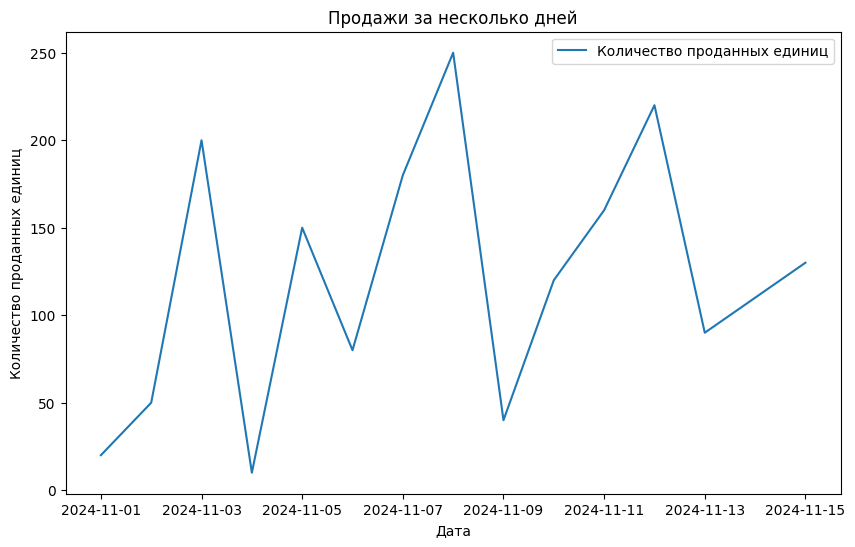

ADF Statistic: -2.532607144623628
p-value: 0.10774085696237806
Ряд нестационарен.
Тестирование p=1, q=1...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=1, q=2...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=1, q=3...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=1, q=4...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Тестирование p=1, q=5...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Lik

Тестирование p=2, q=1...
Тестирование p=2, q=2...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Тестирование p=2, q=3...
Тестирование p=2, q=4...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Тестирование p=2, q=5...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Тестирование p=3, q=1...
Тестирование p=3, q=2...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as star

Тестирование p=3, q=3...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=3, q=4...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All

Тестирование p=3, q=5...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=4, q=1...
Тестирование p=4, q=2...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Тестирование p=4, q=3...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=4, q=4...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All

Тестирование p=4, q=5...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=5, q=1...
Тестирование p=5, q=2...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Тестирование p=5, q=3...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=5, q=4...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All

Тестирование p=5, q=5...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


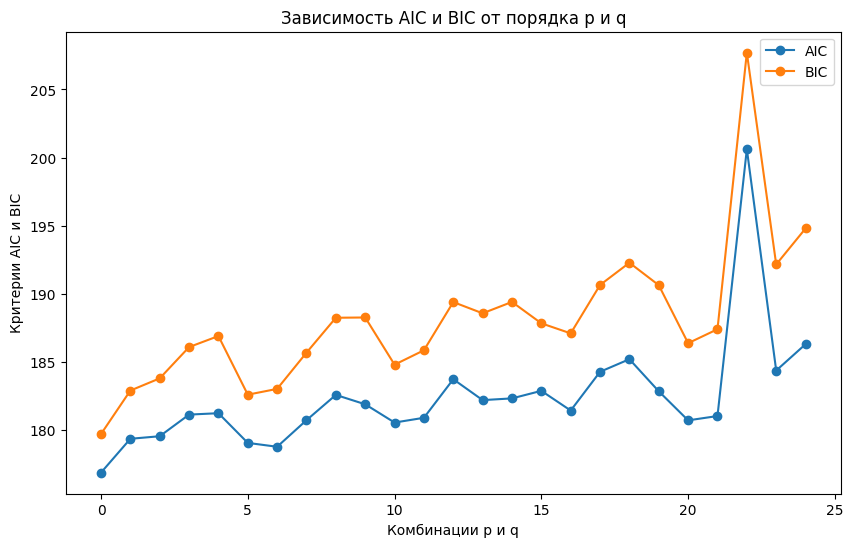

Оптимальные параметры модели (по AIC): p = 1, q = 1
                                    SARIMAX Results                                    
Dep. Variable:     Количество проданных единиц   No. Observations:                   15
Model:                          ARIMA(1, 0, 1)   Log Likelihood                 -84.437
Date:                         Sat, 30 Nov 2024   AIC                            176.873
Time:                                 11:29:52   BIC                            179.705
Sample:                             11-01-2024   HQIC                           176.843
                                  - 11-15-2024                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.9853     17.996      7.001      0.000      90.713     161.257
ar.L1  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-4-b28cd8b01294>:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stat = coeff / stderr[i]


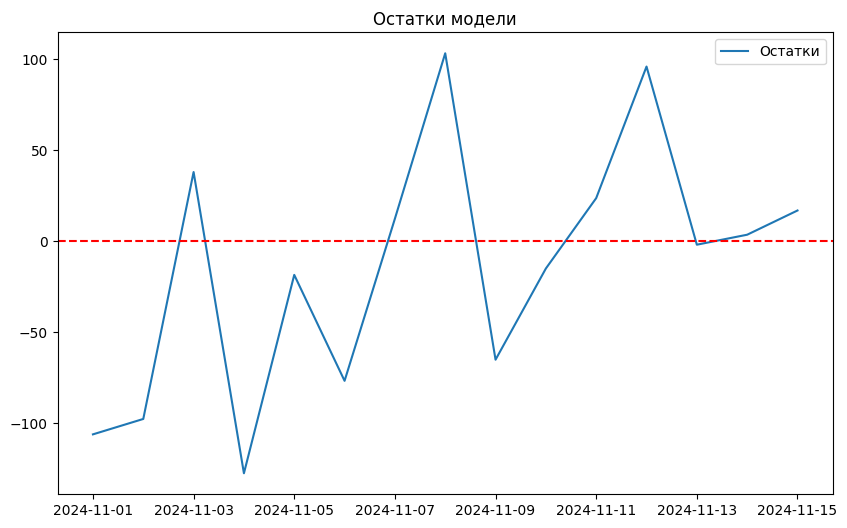


Результаты теста Льюнг-Бокса:
   lb_stat  lb_pvalue
2    0.051   0.974822


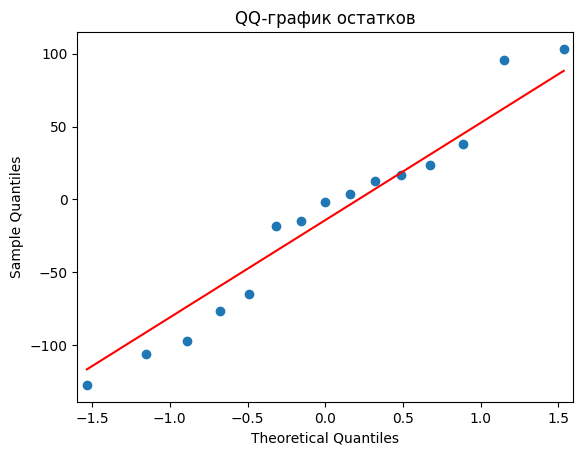

Статистика Шапиро-Уилка: 0.9552097976763931
p-value Шапиро-Уилка: 0.6098579720393887
Остатки распределены нормально.


<ipython-input-4-b28cd8b01294>:144: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train, test = sales[train_index], sales[test_index]
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-4-b28cd8b01294>:144: FutureWarning: Series.__getitem__ tr

Оптимальные p и q по кросс-валидации: p = 3, q = 2


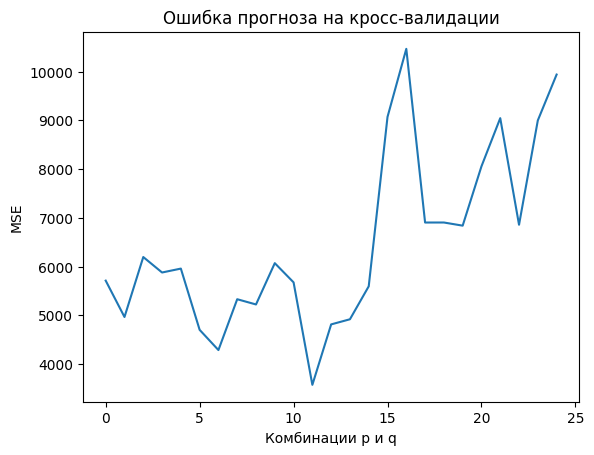

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import t

# Пример расширенных данных
data = {
    'Дата': ['2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04', '2024-11-05',
             '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
             '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15'],
    'Количество проданных единиц': [20, 50, 200, 10, 150, 80, 180, 250, 40, 120, 160, 220, 90, 110, 130]
}

# Создание DataFrame
df = pd.DataFrame(data)

# Преобразование даты в формат pandas
df['Дата'] = pd.to_datetime(df['Дата'])
df.set_index('Дата', inplace=True)

# Получение временного ряда
sales = df['Количество проданных единиц']

# 1. Визуализация данных
plt.figure(figsize=(10, 6))
plt.plot(sales, label="Количество проданных единиц")
plt.title("Продажи за несколько дней")
plt.xlabel("Дата")
plt.ylabel("Количество проданных единиц")
plt.legend()
plt.show()

# 2. Проверка стационарности (ADF-тест)
adf_result = adfuller(sales)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("Ряд стационарен.")
else:
    print("Ряд нестационарен.")

# 3. Перебор порядка p и q для ARMA модели
aic_values = []
bic_values = []
p_values = range(1, 6)  # Мы ограничим диапазон до 5 для небольшого примера
q_values = range(1, 6)  # Также ограничим диапазон q до 5

for p in p_values:
    for q in q_values:
        try:
            print(f"Тестирование p={p}, q={q}...")
            model = ARIMA(sales, order=(p, 0, q)).fit()  # Используем ARMA модель (p, 0, q)
            aic_values.append(model.aic)
            bic_values.append(model.bic)
        except ValueError as e:
            print(f"Ошибка при тестировании p={p}, q={q}: {e}")
            aic_values.append(np.nan)
            bic_values.append(np.nan)
        except Exception as e:
            print(f"Неизвестная ошибка при тестировании p={p}, q={q}: {e}")
            aic_values.append(np.nan)
            bic_values.append(np.nan)

# Визуализация AIC и BIC
plt.figure(figsize=(10, 6))
plt.plot(range(len(aic_values)), aic_values, marker="o", label="AIC")
plt.plot(range(len(bic_values)), bic_values, marker="o", label="BIC")
plt.xlabel("Комбинации p и q")
plt.ylabel("Критерии AIC и BIC")
plt.title("Зависимость AIC и BIC от порядка p и q")
plt.legend()
plt.show()

# Оптимальные p и q
optimal_index = np.argmin(aic_values)
optimal_p = p_values[optimal_index // len(q_values)]
optimal_q = q_values[optimal_index % len(q_values)]
print(f"Оптимальные параметры модели (по AIC): p = {optimal_p}, q = {optimal_q}")

# 4. Обучение модели с оптимальными p и q
model = ARIMA(sales, order=(optimal_p, 0, optimal_q))
result = model.fit()

print(result.summary())

# 5. Оценка модели и t-тест для коэффициентов
coefficients = result.params[1:]  # Коэффициенты AR и MA
stderr = result.bse[1:]  # Стандартные ошибки

print("\nПроверка значимости коэффициентов:")
for i, coeff in enumerate(coefficients):
    t_stat = coeff / stderr[i]
    p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=len(sales) - optimal_p - optimal_q - 1))
    print(f"Коэффициент {i+1}: {coeff:.4f}, t-статистика: {t_stat:.4f}, p-value: {p_value:.4f}")

# 6. Диагностика модели
residuals = result.resid

# Остатки: Визуализация
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Остатки")
plt.axhline(0, linestyle="--", color="red")
plt.title("Остатки модели")
plt.legend()
plt.show()

# Тест Льюнг-Бокса на автокорреляцию остатков
ljung_box = acorr_ljungbox(residuals, lags=[optimal_p + optimal_q], return_df=True)
print("\nРезультаты теста Льюнг-Бокса:")
print(ljung_box)

# QQ-график остатков
sm.qqplot(residuals, line='s')
plt.title("QQ-график остатков")
plt.show()

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print("Статистика Шапиро-Уилка:", shapiro_test[0])
print("p-value Шапиро-Уилка:", shapiro_test[1])
if shapiro_test[1] > 0.05:
    print("Остатки распределены нормально.")
else:
    print("Остатки не распределены нормально.")

# 7. Кросс-валидация для выбора p и q
max_p = 5
max_q = 5
tscv = TimeSeriesSplit(n_splits=3)  # Можно уменьшить количество разбиений для маленького датасета

errors = []

for p in range(1, max_p + 1):
    for q in range(1, max_q + 1):
        fold_errors = []
        for train_index, test_index in tscv.split(sales):
            train, test = sales[train_index], sales[test_index]
            model = ARIMA(train, order=(p, 0, q)).fit()
            predictions = model.forecast(steps=len(test))
            fold_errors.append(mean_squared_error(test, predictions))
        errors.append(np.mean(fold_errors))

# Оптимальные p и q по кросс-валидации
optimal_index_cv = np.argmin(errors)
optimal_p_cv = p_values[optimal_index_cv // max_q]
optimal_q_cv = q_values[optimal_index_cv % max_q]
print(f"Оптимальные p и q по кросс-валидации: p = {optimal_p_cv}, q = {optimal_q_cv}")

# Визуализация ошибки прогноза для каждого p и q
plt.plot(range(len(errors)), errors)
plt.title("Ошибка прогноза на кросс-валидации")
plt.xlabel("Комбинации p и q")
plt.ylabel("MSE")
plt.show()


## **Модель ARIMA(p,d,q)**

Модель **ARIMA(p,d,q)** — это общее расширение моделей типа ARMA для нестационарных временных рядов, которые могут быть приведены к стационарному виду с помощью процедуры дифференцирования. Модель ARIMA(p,d,q) для ряда $y_t$ определяется как модель ARMA(p,q) для ряда разностей порядка $d$ исходного ряда $y_t$.

#### Разности порядка $d$:

1. **Разность первого порядка**:

   $$
   y_t - y_{t-1} = (1 - L)y_t
   $$
   где $L$ — это оператор задержки (или лаг).

2. **Разность второго порядка**:

   $$
   (1 - L)^2 y_t = (1 - L) \left( y_t - y_{t-1} \right) = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) = y_t - 2y_{t-1} + y_{t-2}
   $$

   Эти операторы $(1 - L)^d$ представляют собой последовательные применения разностей, и чем выше $d$, тем больше разностей применяется.

#### Модель ARIMA:

После применения операции дифференцирования, модель ARIMA принимает следующий вид:

$$
a(L) (1 - L)^d y_t = \alpha + b(L) \varepsilon_t
$$
или
$$
(1 - L)^d y_t = \mu + a(L) b(L) \varepsilon_t
$$

где:
- $a(L)$ и $b(L)$ — полиномы в лаговых операторах,
- $\varepsilon_t$ — белый шум,
- $\mu$ — постоянная (если она присутствует).

### **Единичные корни в модели ARIMA**

Многочлен $a(z)$, связанный с моделью ARIMA, может быть записан как:

$$
a(z) = a(z) (1 - z)^d
$$

Этот многочлен имеет **$d$** единичных корней. Важным является тот факт, что количество единичных корней указывает на количество разностей, применённых для устранения **нестационарности** в ряду. Существует связь между количеством единичных корней и порядком дифференцирования.

**Что такое единичные корни?**

Единичный корень — это корень уравнения, при котором полином $a(L)$ принимает значение 0 для $L = 1$. Когда в многочлене появляется единичный корень, это указывает на наличие тренда или другого типа нестационарности в ряду.

**Почему это важно?**

Модели ARIMA используются для моделирования нестационарных рядов, и наличие единичных корней свидетельствует о том, что ряд не стационарен. Дифференцирование, то есть применение операции $(1 - L)^d$, устраняет эти единичные корни и делает ряд стационарным. Количество единичных корней прямо связано с количеством разностей, которые необходимо применить, чтобы устранить нестационарность.

#### Как найти единичные корни?

Для того чтобы понять, сколько единичных корней присутствует в модели, необходимо рассмотреть полином авторегрессии $a(L)$. Например, для модели ARMA с полиномом $a(L) = 1 - \phi_1 L - \phi_2 L^2$, решение уравнения $a(L) = 0$ даст корни, которые могут быть единичными.

Если при решении уравнения $a(L) = 0$ мы получаем корни $L = 1$, это означает, что ряд имеет единичный корень, то есть процесс нестационарен. Если таких корней несколько, то количество разностей (параметр $d$) нужно увеличить.

### **Пример: процесс случайного блуждания**

Рассмотрим процесс случайного блуждания:

$$
y_t = y_{t-1} + \varepsilon_t
$$

где $\varepsilon_t$ — белый шум. Этот процесс не является стационарным, поскольку он имеет тренд. Однако, если применить операцию дифференцирования первого порядка, получим:

$$
y_t' = y_t - y_{t-1}
$$

Тогда:

$$
y_t' = \varepsilon_t
$$

Теперь $y_t'$ представляет собой **стационарный процесс**, так как он больше не имеет тренда, а представляет собой просто белый шум. Таким образом, операция дифференцирования первого порядка устраняет единичный корень, что делает процесс стационарным.

#### **Роль единичных корней в модели ARIMA**

Каждый единичный корень в многочлене $a(L)$ отражает наличие нестационарности в ряду. Параметр $d$ в модели ARIMA показывает, сколько единичных корней следует устранить с помощью дифференцирования, чтобы сделать ряд стационарным.

- **При $d = 1$**: ряд имеет один единичный корень, и его нужно дифференцировать один раз, чтобы устранить тренд.
- **При $d = 2$**: ряд имеет два единичных корня, и его нужно дифференцировать дважды.
- **И так далее**.

Таким образом, количество единичных корней зависит от порядка нестационарности, и для устранения этой нестационарности мы применяем соответствующее количество дифференцирований.





**Частичная автокорреляция**

Для модели скользящего среднего порядка $q$ мы выяснили, что значения автокорреляционной функции для такого ряда становятся равными нулю после лага $q$. Эта особенность позволяет использовать автокорреляционную функцию для определения порядка модели скользящего среднего. Однако возникает разумный вопрос: как оценить порядок $p$ для модели авторегрессии AR($p$)? Здесь полезным инструментом является понятие **частичной автокорреляционной функции**.

**Частичная автокорреляция (PACF)** — это корреляция ряда с собой после снятия линейной зависимости от промежуточных значений ряда. Иными словами, частичная автокорреляция позволяет оценить непосредственное влияние значения ряда в момент $t$ на его значение в момент $t-\tau$, учитывая влияние промежуточных значений (от $t-1$ до $t-(\tau-1)$).

Чуть более формально, частичную автокорреляцию можно выразить следующим образом:

$$
\gamma_{\tau} =
\begin{cases}
\text{corr}(y_t, y_{t-\tau}), & \tau = 1; \\
\text{corr}(y_t - \hat{y}_{t-1}^{(\tau-1)}, y_{t-\tau} - \hat{y}_{t-\tau-1}^{(\tau-1)}), & \tau \geq 2,
\end{cases}
$$

где $\hat{y}_{t-1}^{(\tau-1)}$ — это предсказанное значение $y_t$, полученное с использованием линейной регрессии на предыдущие значения $y_{t-1}, y_{t-2}, \dots, y_{t-(\tau-1)}$. Таким образом, для каждого лага $\tau$ частичная автокорреляция учитывает только непосредственное влияние предыдущих значений на текущее, устраняя влияние промежуточных значений.

Пример для $\tau = 2$:

$$
\gamma_2 = \text{corr}(y_{t+2} - \hat{y}_{t+1}^{(1)}, y_t - \hat{y}_{t-1}^{(1)}),
$$

где $\hat{y}_{t+1}^{(1)} = \phi_1 y_{t+1}$ — это линейное предсказание значения $y_{t+2}$ по модели AR(1), и $\hat{y}_{t-1}^{(1)} = \phi_1 y_{t-1}$ — это предсказание значения $y_t$ по модели AR(1).

Можно показать, что для модели авторегрессии AR($p$) значение частичной автокорреляции будет ненулевым для лагов $\tau \leq p$ и равняться нулю для лагов $\tau > p$. Это аналогично ситуации с автокорреляционной функцией для модели скользящего среднего MA($q$), где значения автокорреляции становятся нулевыми после лага $q$.

Таким образом, исследование поведения как автокорреляционной функции (ACF), так и частичной автокорреляционной функции (PACF) может быть использовано для определения порядка модели скользящего среднего MA($q$) и порядка модели авторегрессии AR($p$), соответственно.



### Пример 1: Модель скользящего среднего MA(1)

Предположим, у нас есть временной ряд, описываемый моделью **MA(1)**:

$$
y_t = \varepsilon_t + \theta_1 \varepsilon_{t-1},
$$

где $\varepsilon_t$ — белый шум с нулевым средним и постоянной дисперсией, а $\theta_1$ — коэффициент модели.

1. **Автокорреляционная функция (ACF)** для модели **MA(1)**:
   - $\text{ACF}(\tau = 0) = 1$ (корреляция с самим собой всегда равна 1).
   - $\text{ACF}(\tau = 1) = \frac{\theta_1}{1 + \theta_1^2}$ — ненулевая корреляция на лаге 1.
   - $\text{ACF}(\tau \geq 2) = 0$ — все последующие автокорреляции равны нулю.

   Таким образом, для модели **MA(1)** автокорреляция обрывается на лаге 1, что позволяет заключить, что модель — это **MA(1)**.

2. **Частичная автокорреляционная функция (PACF)**:
   - $\text{PACF}(\tau = 1) = \frac{\theta_1}{1 + \theta_1^2}$.
   - $\text{PACF}(\tau \geq 2) = 0$ — все последующие частичные автокорреляции равны нулю.

   Частичная автокорреляция также показывает, что модель — это **MA(1)**, так как она обрывается на лаге 1.

### Пример 2: Модель авторегрессии AR(1)

Предположим, что у нас есть модель **AR(1)**:

$$
y_t = \phi_1 y_{t-1} + \varepsilon_t,
$$

где $\phi_1$ — коэффициент модели, а $\varepsilon_t$ — белый шум.

1. **Автокорреляционная функция (ACF)** для модели **AR(1)**:
   - $\text{ACF}(\tau = 0) = 1$.
   - $\text{ACF}(\tau = 1) = \phi_1$ — корреляция с предыдущим значением.
   - $\text{ACF}(\tau \geq 2) = \phi_1^{\tau}$ — для всех более высоких лагов автокорреляция убывает по экспоненциальному закону.

   Для модели **AR(1)** автокорреляция не обрывается, но имеет экспоненциальное затухание.

2. **Частичная автокорреляционная функция (PACF)**:
   - $\text{PACF}(\tau = 1) = \phi_1$.
   - $\text{PACF}(\tau \geq 2) = 0$ — все последующие частичные автокорреляции равны нулю.

   Частичная автокорреляция обрывается на лаге 1, что указывает на модель **AR(1)**.

### Пример 3: Модель авторегрессии AR(2)

Предположим, у нас есть модель **AR(2)**:

$$
y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \varepsilon_t,
$$

где $\phi_1$ и $\phi_2$ — коэффициенты модели, а $\varepsilon_t$ — белый шум.

1. **Автокорреляционная функция (ACF)** для модели **AR(2)**:
   - $\text{ACF}(\tau = 0) = 1$.
   - $\text{ACF}(\tau = 1) = \phi_1$.
   - $\text{ACF}(\tau = 2) = \phi_1^2 + \phi_2$.
   - $\text{ACF}(\tau \geq 3)$ — значимость этих значений зависит от значений коэффициентов, но автокорреляция постепенно убывает с увеличением лагов.

2. **Частичная автокорреляционная функция (PACF)**:
   - $\text{PACF}(\tau = 1) = \phi_1$.
   - $\text{PACF}(\tau = 2) = \phi_2$.
   - $\text{PACF}(\tau \geq 3) = 0$.

   Частичная автокорреляция обрывается на лаге 2, что указывает на модель **AR(2)**.

### Заключение

- **MA($q$)**: автокорреляция обрывается на лаге $q$, а частичная автокорреляция имеет ненулевые значения до лага $q$, после чего становится равной нулю.
- **AR($p$)**: автокорреляция постепенно убывает, а частичная автокорреляция обрывается на лаге $p$, после чего становится равной нулю.

Эти примеры показывают, как анализ автокорреляционной и частичной автокорреляционной функций может помочь в определении порядка модели.





### Оценка коэффициентов в ARIMA

Пусть гиперпараметры $p, d, q$ фиксированы. В предположении, что $\varepsilon_t$ — гауссовский белый шум, в нашей модели можно записать функцию правдоподобия:

$$
L_y(\theta, \varphi, \alpha) = p_{\theta, \varphi, \alpha}(y_1, \dots, y_T),
$$

где $p_{\theta, \varphi, \alpha}(y_1, \dots, y_T)$ — совместная плотность. Поскольку $\varepsilon_t$ имеет нормальное распределение, эта плотность будет иметь известный вид. Соответственно, для оценки параметров используется метод максимального правдоподобия.

Для поиска начальных приближений для параметров $p$ и $q$ воспользуемся автокорреляционной и частичной автокорреляционной функциями:
- Начальное приближение для $p$: последний значимый пик у PACF (частичной автокорреляционной функции).
- Начальное приближение для $q$: последний значимый пик у ACF (автокорреляционной функции).

Далее обычно используется поиск по сетке вокруг подобранных значений, минимизируя информационный критерий:
- **AIC** (критерий Акаике):

$$
AIC = -2 \ell^* + 2(p + q + 1),
$$

где $\ell^* = \ln L_y(\hat{\theta}, \hat{\varphi}, \hat{\alpha})$ — логарифм функции правдоподобия, $T$ — длина временного ряда.

- **AICc** (корректировка для кратких рядов):

$$
AICc = -2 \ell^* + 2(p + q + 1) \cdot \frac{(p + q + 2)}{T - p - q - 2},
$$

где $T$ — длина ряда.

- **BIC** (Байесовский информационный критерий или критерий Шварца):

$$
BIC = -2 \ell^* + (\ln T - 2)(p + q + 1),
$$

где $\ell^* = \ln L_y(\hat{\theta}, \hat{\varphi}, \hat{\alpha})$ — логарифм функции правдоподобия, $T$ — длина временного ряда.



### План применения модели ARIMA для прогнозирования временных рядов:

1. **Анализ выбросов**: замените нерелевантные выбросы на $NA$ или усредните их с учетом соседних значений.
2. **Стабилизация дисперсии**: примените преобразования для стабилизации дисперсии (например, логарифмирование или Box-Cox преобразование).
3. **Дифференцирование**: если ряд не стационарен, примените дифференцирование для достижения стационарности.
4. **Выбор начальных значений для $p$ и $q$**: определите значения по PACF и ACF.
5. **Поиск оптимальной модели**: подберите оптимальные значения для $p$ и $q$ с минимизацией AIC/AICc.
6. **Пошаговое построение прогноза**:
   - Для $t \leq T$: остатки модели $\varepsilon_t$ можно выразить как $\varepsilon_t = y_t - \hat{y}_t$.
   - Для $t > T$: предполагаем, что $\varepsilon_t = 0$, и прогнозируем $y_t$ как $\hat{y}_t$.
7. **Построение предсказательного интервала**:

- **Если остатки модели нормальны и гомоскедастичны (дисперсия постоянна)**:
  - Предсказательный интервал можно построить теоретически, используя формулу для дисперсии:
$$
\hat{\sigma}^2(h) = \hat{\sigma}^2 \left(1 + \sum_{i=1}^{h-1} \psi_i^2 \right)
$$
Здесь $h$ — горизонт прогнозирования (сколько шагов вперёд мы прогнозируем), $\hat{\sigma}^2$ — оценка дисперсии шума $\varepsilon_t$, а $\psi_i$ — коэффициенты, которые можно вычислить, если временной ряд можно представить как бесконечный процесс скользящего среднего.
  
Это выражение учитывает зависимость между текущим и предыдущими значениями временного ряда. Если модель использует ARMA или ARIMA, то $\psi_i$ и дисперсия могут быть связаны с параметрами модели $\phi$ и $\theta$, которые описывают авторегрессию и скользящее среднее.

- **Если остатки не нормальны или гомоскедастичность нарушена**:
  - В таком случае, можно использовать метод бутстрепа для построения предсказательных интервалов. Бутстреп — это статистический метод, который позволяет сгенерировать множество подвыборок из исходных данных (с возвращением) и на основе этих подвыборок оценить параметры модели и её предсказательные интервалы.
  
Таким образом, если стандартные предположения не выполняются, метод бутстрепа позволяет построить более надежные интервалы, не делая строгих предположений о форме распределения остатков.

2. **Применение бутстрэппинга**:  

Бутстрэппинг — это метод повторной выборки данных с целью построения распределения прогнозируемых значений.  

#### Шаги бутстрэппинга:  

1. **Получение остатков**:  
   - Вычислите остатки модели ARIMA:  
$$
     \varepsilon_t = y_t - \hat{y}_t.
$$  

2. **Повторная выборка остатков**:  
   - Сформируйте множество бутстрэппинг-выборок из остатков $\varepsilon_t$:  
     - Выбирайте остатки случайным образом с возвратом, формируя новые серии $\varepsilon_t^*$.  

3. **Генерация новых временных рядов**:  
   - Для каждой бутстрэппинг-выборки $\varepsilon_t^*$:  
     - Сформируйте новый временной ряд:  
$$
       y_t^* = \hat{y}_t + \varepsilon_t^*.
$$  
     - Используйте параметры модели ARIMA ($p, d, q$) для генерации прогнозов на основе $y_t^*$.  

4. **Повторение прогнозов**:  
   - Повторите процесс $N$ раз (например, $N = 1000$), чтобы получить распределение прогнозируемых значений $\hat{y}_{t+h}^*$ для каждого шага $h$ прогнозирования.  

5. **Оценка доверительных интервалов**:  
   - Постройте эмпирическое распределение прогнозируемых значений для каждого шага $h$.  
   - Используйте квантили распределения для построения доверительных интервалов:  
- $\text{Нижняя граница} = \hat{y}_{t+h}^{* (2.5\%)}$  
- $\text{Верхняя граница} = \hat{y}_{t+h}^{* (97.5\%)}$  



3. **Преимущества бутстрэппинга**:  
   - Метод не требует предположений о нормальности остатков.  
   - Позволяет учесть сложные структуры ошибок, включая гетероскедастичность и асимметрию.  

4. **Ограничения бутстрэппинга**:  
   - Высокая вычислительная сложность, особенно при большом объеме данных или долгих горизонтах прогнозирования.  
   - При наличии автокорреляции остатков важно учитывать её в выборке (например, с использованием блокового бутстрэппинга).  



### Блоковый бутстрэппинг (для автокоррелированных остатков):  

Если остатки модели демонстрируют автокорреляцию (зависят от предыдущих значений), используйте **блоковый бутстрэппинг**:  

1. **Разделите остатки на блоки**:  
   - Разбейте остатки на последовательные блоки длиной $k$, где $k$ выбирается так, чтобы охватить основную автокорреляцию (например, $k = 3$ или $k = 5$).  

2. **Повторная выборка блоков**:  
   - Вместо выборки отдельных остатков случайным образом выбирайте целые блоки.  

3. **Формирование новых временных рядов**:  
   - Составьте новую серию остатков, объединяя выбранные блоки, и используйте её для генерации временных рядов, как описано ранее.  

Этот подход сохраняет структуру автокорреляции в остатках и делает бутстрэппинг более реалистичным.  



Давайте рассмотрим конкретный пример пошагового построения прогноза для временного ряда, используя модель ARIMA, и как мы можем вычислить предсказательные интервалы. Мы будем использовать гипотетический временной ряд, но шаги можно будет адаптировать для реальных данных.

### Шаг 1: Подбор модели с использованием AIC/AICc

Предположим, у нас есть временной ряд $y_t$, который мы хотим проанализировать. На начальном этапе мы подбираем оптимальную модель. Например, мы хотим использовать модель ARIMA. Для этого мы оцениваем несколько моделей ARIMA с различными параметрами (порядки $p$, $d$, $q$) и выбираем ту модель, которая минимизирует AIC или AICc.

- Рассчитываем AIC и AICc для нескольких моделей ARIMA:
    - ARIMA(1, 1, 1)
    - ARIMA(2, 1, 1)
    - ARIMA(1, 1, 2)
  
  Пусть для модели ARIMA(1, 1, 1) AIC = 2500, для ARIMA(2, 1, 1) AIC = 2450, для ARIMA(1, 1, 2) AIC = 2480.
  
- Мы выбираем модель ARIMA(2, 1, 1), так как она имеет минимальное значение AIC.

### Шаг 2: Пошаговое построение прогноза

Теперь, имея выбранную модель ARIMA(2, 1, 1), мы можем построить прогноз для будущих значений временного ряда.

- **Для $t \leq T$ (в прошлом и настоящем времени)**:
  В данной модели $\varepsilon_t = y_t - \hat{y_t}$. Например, для времени $t = 10$, если $y_{10} = 100$, а $\hat{y_{10}} = 98$, то:
$$
  \varepsilon_{10} = 100 - 98 = 2
$$
  Мы повторяем этот шаг для всех наблюдений до момента $T$, чтобы оценить остатки.

- **Для $t > T$ (будущие значения)**:
  Для $t > T$, прогнозируемое значение $\hat{y_t}$ будет вычисляться с помощью модели ARIMA, которая использует предыдущие значения и параметры $\phi$ и $\theta$. Предположим, что для $t = 11$, прогнозное значение $\hat{y_{11}} = 102$, а для $t = 12$, $\hat{y_{12}} = 105$.

  Эти прогнозы строятся на основе авторегрессионных и скользящих средних частей модели.

### Шаг 3: Построение предсказательного интервала

Теперь, чтобы построить предсказательный интервал для будущих значений, мы учитываем дисперсию остатков и используем два варианта построения интервала.

#### Вариант 1: Теоретический предсказательный интервал (если остатки нормальны и гомоскедастичны)

Для построения теоретического интервала, предположим, что дисперсия ошибок $\hat{\sigma}^2$ известна, и она равна 4. Также коэффициенты $\psi_i$ для нашего ряда можно вычислить, но для простоты примем их значение равным 1 для каждого шага прогнозирования.

Формула для дисперсии прогноза на горизонт $h$:
$$
\hat{\sigma}^2(h) = \hat{\sigma}^2 \left( 1 + \sum_{i=1}^{h-1} \psi_i^2 \right)
$$
Для $h = 3$ (горизонт прогнозирования на 3 периода вперед):
$$
\hat{\sigma}^2(3) = 4 \left( 1 + 1^2 + 1^2 \right) = 4 \times 3 = 12
$$
Предсказательный интервал для $y_{11}$ и $y_{12}$ будет рассчитываться как:
$$
\hat{y_{t}} \pm z \cdot \hat{\sigma} \cdot \sqrt{h}
$$
где $z$ — критическое значение стандартного нормального распределения (например, для 95%-го интервала $z = 1.96$), а $h$ — горизонт прогнозирования.

- Для $t = 11$, $\hat{y_{11}} = 102$:
$$
\hat{y_{11}} \pm 1.96 \cdot \sqrt{12} \approx 102 \pm 6.93
$$
Интервал: $[95.07, 108.93]$.

- Для $t = 12$, $\hat{y_{12}} = 105$:
$$
\hat{y_{12}} \pm 1.96 \cdot \sqrt{12} \approx 105 \pm 6.93
$$
Интервал: $[98.07, 111.93]$.

#### Вариант 2: Предсказательный интервал с помощью бутстрепа

Если остатки модели не нормальны или есть другие проблемы с предположениями, можно использовать бутстреп для построения интервала.

- Бутстреп заключается в том, чтобы случайным образом выбирать подвыборки из наблюдений $y_t$ с возвращением, строить для них новые прогнозы и затем вычислять предсказательные интервалы, используя эти многократные выборки.

Для этого мы генерируем несколько (например, 1000) бутстреп-выборок и для каждой из них строим прогнозы для $y_{11}$ и $y_{12}$. Затем из полученных прогнозов находим 2.5-й и 97.5-й процентили, чтобы получить 95%-й предсказательный интервал.

Предположим, что после выполнения бутстрепа для $y_{11}$ интервалы будут такие:
$$
[94.5, 109.5]
$$
и для $y_{12}$:
$$
[97.2, 112.8]
$$


Таким образом, в нашем примере мы использовали модель ARIMA(2, 1, 1), построили прогнозы для будущих значений временного ряда, а также рассчитали предсказательные интервалы как с помощью теоретических методов, так и с использованием бутстрепа.

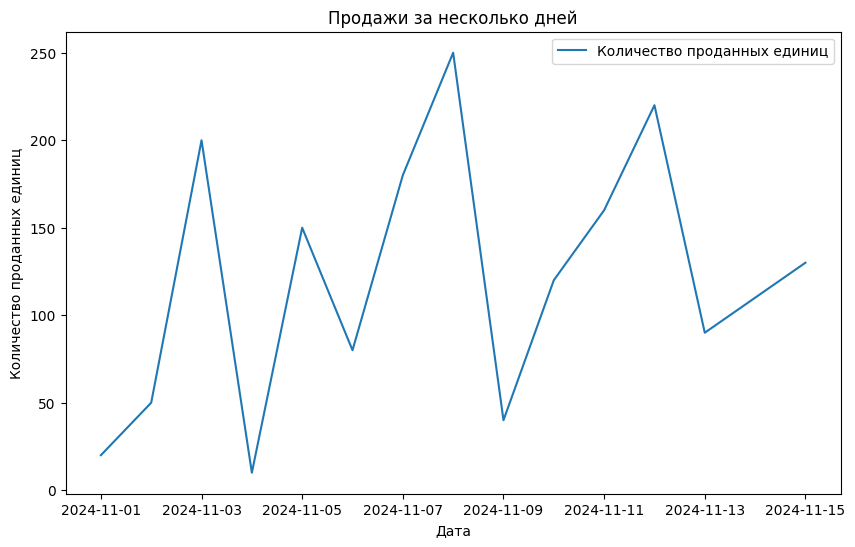

Тест для d=0:
ADF Statistic: -2.532607144623628
p-value: 0.10774085696237806
Тест для d=1:
ADF Statistic: -4.167777386122715
p-value: 0.0007467227853716068
Оптимальное d найдено: 1
Тестирование p=1, d=1, q=1...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=1, d=1, q=2...
Тестирование p=1, d=1, q=3...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Тестирование p=1, d=1, q=4...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

Тестирование p=1, d=1, q=5...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Тестирование p=2, d=1, q=1...
Тестирование p=2, d=1, q=2...
Тестирование p=2, d=1, q=3...
Тестирование p=2, d=1, q=4...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Тестирование p=2, d=1, q=5...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=3, d=1, q=1...
Тестирование p=3, d=1, q=2...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=3, d=1, q=3...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Тестирование p=3, d=1, q=4...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All

Тестирование p=3, d=1, q=5...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as star

Тестирование p=4, d=1, q=1...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as star

Тестирование p=4, d=1, q=2...
Тестирование p=4, d=1, q=3...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Тестирование p=4, d=1, q=4...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All

Тестирование p=4, d=1, q=5...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Тестирование p=5, d=1, q=1...
Тестирование p=5, d=1, q=2...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=5, d=1, q=3...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=5, d=1, q=4...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All

Тестирование p=5, d=1, q=5...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Оптимальные параметры (по AIC): p=1, d=1, q=2
Оптимальные параметры (по BIC): p=1, d=1, q=1
                                    SARIMAX Results                                    
Dep. Variable:     Количество проданных единиц   No. Observations:                   15
Model:                          ARIMA(1, 1, 2)   Log Likelihood                 -79.946
Date:                         Sat, 30 Nov 2024   AIC                            167.892
Time:                                 11:35:43   BIC                            170.448
Sample:                             11-01-2024   HQIC                           167.655
                                  - 11-15-2024                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2492      0.510      0.489   

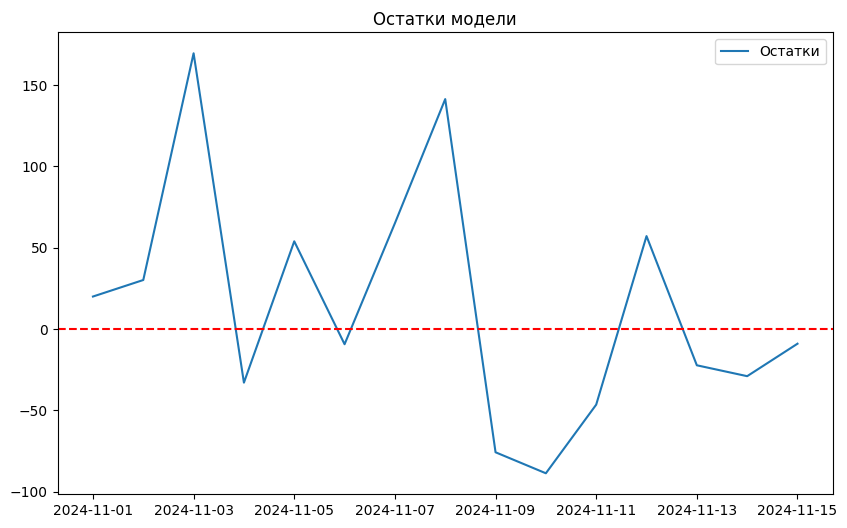


Результаты теста Льюнг-Бокса:
    lb_stat  lb_pvalue
3  0.645186   0.886014


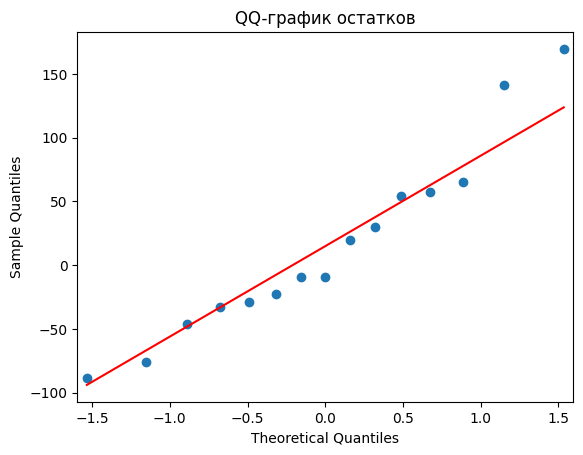

Статистика Шапиро-Уилка: 0.9422346212757904
p-value Шапиро-Уилка: 0.41130257115287255
Остатки распределены нормально.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be

Оптимальные параметры по кросс-валидации: p=2, q=2 (MSE=4415.8456)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import t

# Пример данных
data = {
    'Дата': ['2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04', '2024-11-05',
             '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
             '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15'],
    'Количество проданных единиц': [20, 50, 200, 10, 150, 80, 180, 250, 40, 120, 160, 220, 90, 110, 130]
}

# Создание DataFrame
df = pd.DataFrame(data)
df['Дата'] = pd.to_datetime(df['Дата'])
df.set_index('Дата', inplace=True)

# Получение временного ряда
sales = df['Количество проданных единиц']

# 1. Визуализация данных
plt.figure(figsize=(10, 6))
plt.plot(sales, label="Количество проданных единиц")
plt.title("Продажи за несколько дней")
plt.xlabel("Дата")
plt.ylabel("Количество проданных единиц")
plt.legend()
plt.show()

# 2. Функция для проверки стационарности
def check_stationarity(series):
    adf_result = adfuller(series)
    print("ADF Statistic:", adf_result[0])
    print("p-value:", adf_result[1])
    return adf_result[1] < 0.05

# 3. Поиск оптимального значения d
max_d = 2  # Зададим максимальное значение d (обычно 0, 1, или 2)
best_d = 0
for d in range(max_d + 1):
    diff_series = sales.diff(d).dropna() if d > 0 else sales
    print(f"Тест для d={d}:")
    if check_stationarity(diff_series):
        best_d = d
        print(f"Оптимальное d найдено: {best_d}")
        break
else:
    print(f"Не удалось найти стационарный ряд. Используем максимальное d={max_d}")
    best_d = max_d

# 4. Перебор значений p, q для оптимального d
p_values = range(1, 6)
q_values = range(1, 6)
aic_values = []
bic_values = []
orders = []

for p in p_values:
    for q in q_values:
        try:
            print(f"Тестирование p={p}, d={best_d}, q={q}...")
            model = ARIMA(sales, order=(p, best_d, q)).fit()
            aic_values.append(model.aic)
            bic_values.append(model.bic)
            orders.append((p, best_d, q))
        except Exception as e:
            print(f"Ошибка при тестировании p={p}, d={best_d}, q={q}: {e}")
            aic_values.append(np.nan)
            bic_values.append(np.nan)

# Найдем лучшие параметры по AIC
best_aic_index = np.argmin(aic_values)
best_order_aic = orders[best_aic_index]
print(f"Оптимальные параметры (по AIC): p={best_order_aic[0]}, d={best_order_aic[1]}, q={best_order_aic[2]}")

# Найдем лучшие параметры по BIC
best_bic_index = np.argmin(bic_values)
best_order_bic = orders[best_bic_index]
print(f"Оптимальные параметры (по BIC): p={best_order_bic[0]}, d={best_order_bic[1]}, q={best_order_bic[2]}")

# 5. Обучение модели с лучшими параметрами
model = ARIMA(sales, order=best_order_aic)
result = model.fit()

print(result.summary())

# 6. Диагностика модели
residuals = result.resid

# Остатки: Визуализация
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Остатки")
plt.axhline(0, linestyle="--", color="red")
plt.title("Остатки модели")
plt.legend()
plt.show()

# Тест Льюнг-Бокса на автокорреляцию остатков
ljung_box = acorr_ljungbox(residuals, lags=[best_order_aic[0] + best_order_aic[2]], return_df=True)
print("\nРезультаты теста Льюнг-Бокса:")
print(ljung_box)

# QQ-график остатков
sm.qqplot(residuals, line='s')
plt.title("QQ-график остатков")
plt.show()

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print("Статистика Шапиро-Уилка:", shapiro_test[0])
print("p-value Шапиро-Уилка:", shapiro_test[1])
if shapiro_test[1] > 0.05:
    print("Остатки распределены нормально.")
else:
    print("Остатки не распределены нормально.")

# 7. Кросс-валидация для выбора параметров
tscv = TimeSeriesSplit(n_splits=3)
cv_errors = []

for p in p_values:
    for q in q_values:
        fold_errors = []
        for train_index, test_index in tscv.split(sales):
            train, test = sales.iloc[train_index], sales.iloc[test_index]
            try:
                model = ARIMA(train, order=(p, best_d, q)).fit()
                predictions = model.forecast(steps=len(test))
                fold_errors.append(mean_squared_error(test, predictions))
            except Exception as e:
                fold_errors.append(np.nan)
        cv_errors.append((p, q, np.nanmean(fold_errors)))

# Найти минимальную ошибку
optimal_pq = min(cv_errors, key=lambda x: x[2])
print(f"Оптимальные параметры по кросс-валидации: p={optimal_pq[0]}, q={optimal_pq[1]} (MSE={optimal_pq[2]:.4f})")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

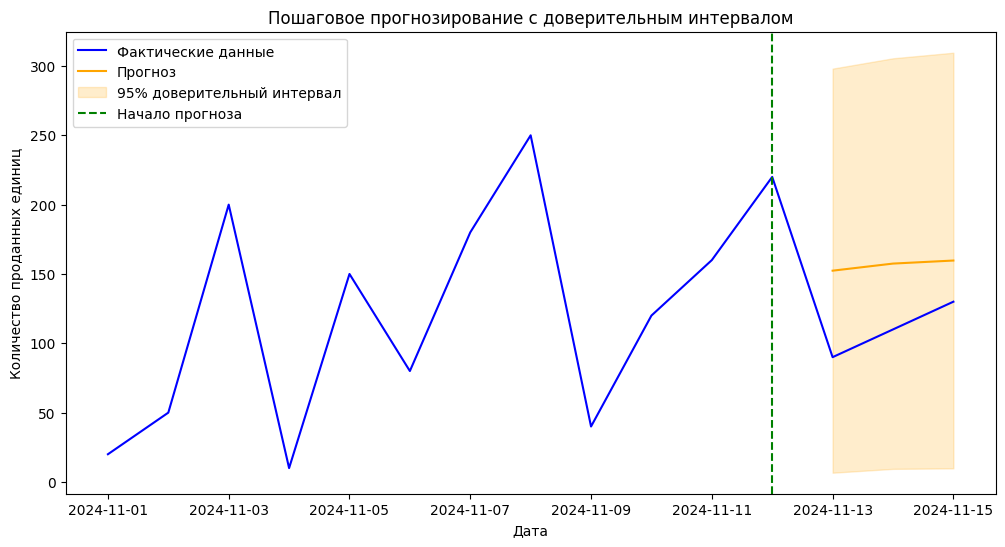

Среднеквадратичная ошибка (MSE): 2342.3744


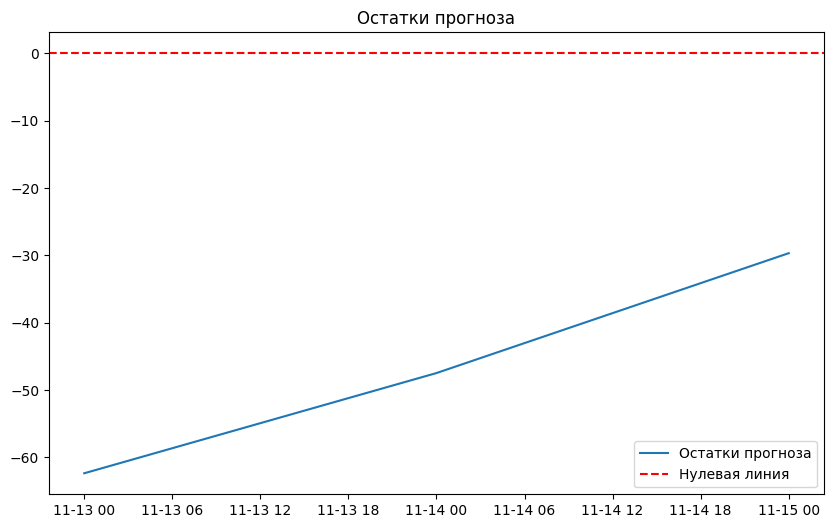

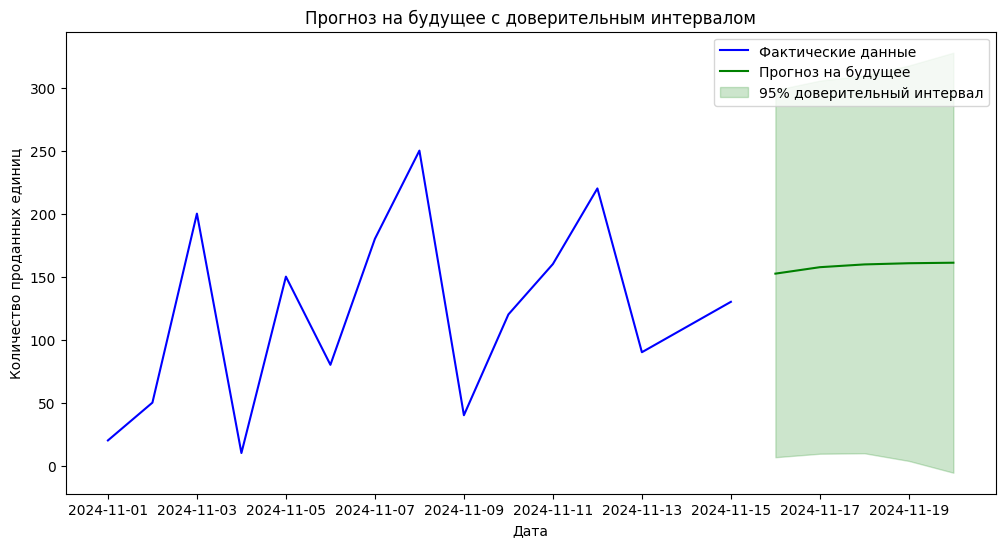


Прогноз на будущее:
                 Дата     Прогноз  Нижняя граница (95%)  Верхняя граница (95%)
2024-11-13 2024-11-16  152.373686              6.665602             298.081771
2024-11-14 2024-11-17  157.490115              9.442794             305.537436
2024-11-15 2024-11-18  159.687291              9.820880             309.553703
2024-11-16 2024-11-19  160.630837              3.731548             317.530125
2024-11-17 2024-11-20  161.036029             -5.631355             327.703413


In [ ]:
# 8. Пошаговое построение прогноза
# Разделим данные на тренировочные и тестовые
train_size = int(len(sales) * 0.8)
train, test = sales[:train_size], sales[train_size:]

# Обучение модели на тренировочных данных
model = ARIMA(train, order=best_order_aic)
result = model.fit()

# Пошаговое прогнозирование
forecast_steps = len(test)
forecast = result.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean  # Прогнозируемые значения
forecast_se = forecast.se_mean  # Стандартные ошибки прогноза

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(sales, label="Фактические данные", color="blue")
plt.plot(test.index, forecast_values, label="Прогноз", color="orange")
plt.fill_between(test.index,
                 forecast_values - 1.96 * forecast_se,
                 forecast_values + 1.96 * forecast_se,
                 color="orange", alpha=0.2, label="95% доверительный интервал")
plt.axvline(train.index[-1], color="green", linestyle="--", label="Начало прогноза")
plt.title("Пошаговое прогнозирование с доверительным интервалом")
plt.xlabel("Дата")
plt.ylabel("Количество проданных единиц")
plt.legend()
plt.show()

# Оценка ошибок на тестовой выборке
forecast_errors = test - forecast_values
mse = mean_squared_error(test, forecast_values)
print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")

# Построение остатков (ошибок прогноза)
plt.figure(figsize=(10, 6))
plt.plot(forecast_errors, label="Остатки прогноза")
plt.axhline(0, linestyle="--", color="red", label="Нулевая линия")
plt.title("Остатки прогноза")
plt.legend()
plt.show()

# 9. Построение предсказательного интервала для будущих значений
future_steps = 5  # Прогнозируем на 5 будущих шагов
future_forecast = result.get_forecast(steps=future_steps)

future_values = future_forecast.predicted_mean  # Прогнозируемые значения
future_se = future_forecast.se_mean  # Стандартные ошибки прогноза
future_index = pd.date_range(start=sales.index[-1] + pd.Timedelta(days=1), periods=future_steps)

# Построение доверительных интервалов
lower_bound = future_values - 1.96 * future_se
upper_bound = future_values + 1.96 * future_se

# Визуализация прогноза на будущее
plt.figure(figsize=(12, 6))
plt.plot(sales, label="Фактические данные", color="blue")
plt.plot(future_index, future_values, label="Прогноз на будущее", color="green")
plt.fill_between(future_index, lower_bound, upper_bound, color="green", alpha=0.2, label="95% доверительный интервал")
plt.title("Прогноз на будущее с доверительным интервалом")
plt.xlabel("Дата")
plt.ylabel("Количество проданных единиц")
plt.legend()
plt.show()

# Печать будущих прогнозов
forecast_df = pd.DataFrame({
    "Дата": future_index,
    "Прогноз": future_values,
    "Нижняя граница (95%)": lower_bound,
    "Верхняя граница (95%)": upper_bound
})
print("\nПрогноз на будущее:")
print(forecast_df)

##**Модели SARIMA и ARIMAX**

Рассмотрим некоторые расширения модели ARIMA. Обобщение модели ARIMA на ряды с сезонной составляющей называется SARIMA. Пусть $s$ — известная сезонность ряда. Добавим в модель ARIMA компоненты, отвечающие за значения в предыдущие сезоны. Тогда модель SARIMA $(p,d,q) \times (P,D,Q)_s$ может быть записана следующим образом:

$$
(1 - L)^d(1 - L^s)^D y_t = \mu + b(L)B(L^s) a(L)A(L^s) \varepsilon_t,
$$

где:
- $a(z) = 1 - \phi_1 z - \dots - \phi_p z^p$,
- $b(z) = 1 + \theta_1 z + \dots + \theta_q z^q$,
- $A(z) = 1 - \phi_1 s z - \dots - \phi_P z^P$,
- $B(z) = 1 + \theta_1 s z + \dots + \theta_Q z^Q$.

Здесь:
- $\mu$ — постоянная (среднее значение ряда),
- $\varepsilon_t$ — белый шум.

Параметры сезонного дифференцирования $D$, а также параметры $P, Q$ подбираются из тех же соображений, что и для $p, d, q$, но с поправкой, что это делается с учетом сезонности $s$.



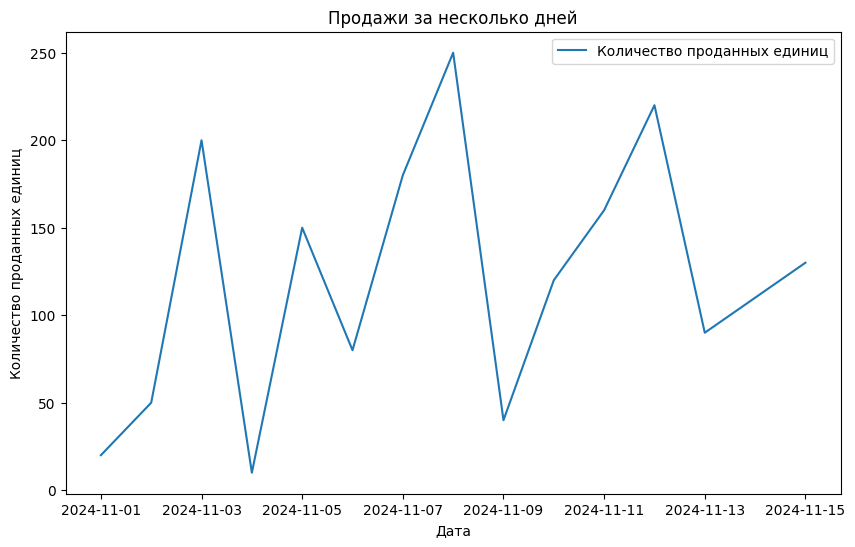

Тест для d=0:
ADF Statistic: -2.532607144623628
p-value: 0.10774085696237806
Тест для d=1:
ADF Statistic: -4.167777386122715
p-value: 0.0007467227853716068
Оптимальное d найдено: 1
Тестирование p=1, d=1, q=1, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=1, d=1, q=1, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=1, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=1, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=1, d=1, q=1, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

Тестирование p=1, d=1, q=1, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=1, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=1, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=1, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=1, d=1, q=2, P=0, D=0, Q=0, S=7...
Тестирование p=1, d=1, q=2, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=2, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

Тестирование p=1, d=1, q=2, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=2, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=2, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=2, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=2, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=2, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=1, d=1, q=3, P=0, D=0, Q=0, S=7...
Тестирование p=1, d=1, q=3, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=3, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=3, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=1, d=1, q=3, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=3, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

Тестирование p=1, d=1, q=3, P=2, D=0, Q=0, S=7...
Тестирование p=1, d=1, q=3, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=3, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=4, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred

Тестирование p=1, d=1, q=4, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting param

Тестирование p=1, d=1, q=4, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Тестирование p=1, d=1, q=4, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting param

Тестирование p=1, d=1, q=4, P=1, D=0, Q=1, S=7...
Тестирование p=1, d=1, q=4, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Con

Тестирование p=1, d=1, q=4, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting param

Тестирование p=1, d=1, q=4, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting param

Тестирование p=1, d=1, q=4, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=5, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=1, d=1, q=5, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=1, d=1, q=5, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=1, d=1, q=5, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=1, d=1, q=5, P=1, D=0, Q=1, S=7...
Тестирование p=1, d=1, q=5, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/li

Тестирование p=1, d=1, q=5, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=1, d=1, q=5, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=1, d=1, q=5, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Тестирование p=2, d=1, q=1, P=0, D=0, Q=0, S=7...
Тестирование p=2, d=1, q=1, P=0, D=0, Q=1, S=7...
Тестирование p=2, d=1, q=1, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестирование p=2, d=1, q=1, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=2, d=1, q=1, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

Тестирование p=2, d=1, q=1, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=1, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=1, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=1, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Тестирование p=2, d=1, q=2, P=0, D=0, Q=0, S=7...
Тестирование p=2, d=1, q=2, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=2, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=2, d=1, q=2, P=1, D=0, Q=0, S=7...
Тестирование p=2, d=1, q=2, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

Тестирование p=2, d=1, q=2, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=2, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=2, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=2, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par

Тестирование p=2, d=1, q=3, P=0, D=0, Q=0, S=7...
Тестирование p=2, d=1, q=3, P=0, D=0, Q=1, S=7...
Тестирование p=2, d=1, q=3, P=0, D=0, Q=2, S=7...
Тестирование p=2, d=1, q=3, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations 

Тестирование p=2, d=1, q=3, P=1, D=0, Q=1, S=7...
Тестирование p=2, d=1, q=3, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations 

Тестирование p=2, d=1, q=3, P=2, D=0, Q=0, S=7...
Тестирование p=2, d=1, q=3, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations 

Ошибка при тестировании p=2, d=1, q=3, P=2, Q=1: LU decomposition error.
Тестирование p=2, d=1, q=3, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=2, d=1, q=4, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Тестирование p=2, d=1, q=4, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=4, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=2, d=1, q=4, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=4, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=4, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=4, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=4, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=4, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=5, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=2, d=1, q=5, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=2, d=1, q=5, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=2, d=1, q=5, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=2, d=1, q=5, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=2, d=1, q=5, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=2, d=1, q=5, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=2, d=1, q=5, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=2, d=1, q=5, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Тестирование p=3, d=1, q=1, P=0, D=0, Q=0, S=7...
Тестирование p=3, d=1, q=1, P=0, D=0, Q=1, S=7...
Тестирование p=3, d=1, q=1, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

Тестирование p=3, d=1, q=1, P=1, D=0, Q=0, S=7...
Тестирование p=3, d=1, q=1, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=1, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=1, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=1, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=1, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=3, d=1, q=2, P=0, D=0, Q=0, S=7...
Тестирование p=3, d=1, q=2, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=2, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

Тестирование p=3, d=1, q=2, P=1, D=0, Q=0, S=7...
Тестирование p=3, d=1, q=2, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=2, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

Тестирование p=3, d=1, q=2, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=2, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=2, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=3, d=1, q=3, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=3, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=3, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=3, d=1, q=3, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=3, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=3, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=3, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=3, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=3, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=3, d=1, q=4, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=4, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=4, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=3, d=1, q=4, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=4, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=4, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=4, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=4, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=4, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=5, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=3, d=1, q=5, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=3, d=1, q=5, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=3, d=1, q=5, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=3, d=1, q=5, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=3, d=1, q=5, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=3, d=1, q=5, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=3, d=1, q=5, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=3, d=1, q=5, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Тестирование p=4, d=1, q=1, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=4, d=1, q=1, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=4, d=1, q=1, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Тестирование p=4, d=1, q=1, P=1, D=0, Q=0, S=7...
Тестирование p=4, d=1, q=1, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/

Тестирование p=4, d=1, q=1, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=4, d=1, q=1, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=4, d=1, q=1, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=4, d=1, q=1, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=4, d=1, q=2, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Тестирование p=4, d=1, q=2, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/

Тестирование p=4, d=1, q=2, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Тестирование p=4, d=1, q=2, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=4, d=1, q=2, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=4, d=1, q=2, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=4, d=1, q=2, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=4, d=1, q=2, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=4, d=1, q=2, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=4, d=1, q=3, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=3, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=3, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=4, d=1, q=3, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=3, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=3, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=3, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=3, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=3, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=4, d=1, q=4, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=4, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=4, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=4, d=1, q=4, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=4, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=4, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=4, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=4, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=4, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=5, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=4, d=1, q=5, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=4, d=1, q=5, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=4, d=1, q=5, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=4, d=1, q=5, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=4, d=1, q=5, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=4, d=1, q=5, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=4, d=1, q=5, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=4, d=1, q=5, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=5, d=1, q=1, P=0, D=0, Q=0, S=7...
Тестирование p=5, d=1, q=1, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

Тестирование p=5, d=1, q=1, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=5, d=1, q=1, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=1, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=1, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=1, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=1, P=2, D=0, Q=1, S=7...
Тестирование p=5, d=1, q=1, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Ошибка при тестировании p=5, d=1, q=1, P=2, Q=2: LU decomposition error.
Тестирование p=5, d=1, q=2, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was prov

Тестирование p=5, d=1, q=2, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=5, d=1, q=2, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Тестирование p=5, d=1, q=2, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=5, d=1, q=2, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=5, d=1, q=2, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=5, d=1, q=2, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=5, d=1, q=2, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Тестирование p=5, d=1, q=2, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=5, d=1, q=3, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=3, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=3, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=5, d=1, q=3, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=3, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=3, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=3, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=3, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=3, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=5, d=1, q=4, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=4, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=4, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Тестирование p=5, d=1, q=4, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=4, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестирование p=5, d=1, q=4, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

Тестирование p=5, d=1, q=4, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=4, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=4, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=5, P=0, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=5, d=1, q=5, P=0, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=5, d=1, q=5, P=0, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Тестирование p=5, d=1, q=5, P=1, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=5, d=1, q=5, P=1, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=5, d=1, q=5, P=1, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=5, d=1, q=5, P=2, D=0, Q=0, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=5, d=1, q=5, P=2, D=0, Q=1, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866:

Тестирование p=5, d=1, q=5, P=2, D=0, Q=2, S=7...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par

Оптимальные параметры (по AIC): p=2, d=1, q=3, P=2, Q=2
Оптимальные параметры (по BIC): p=2, d=1, q=3, P=2, Q=2
                                    SARIMAX Results                                    
Dep. Variable:     Количество проданных единиц   No. Observations:                   12
Model:                          ARIMA(1, 1, 2)   Log Likelihood                 -64.139
Date:                         Sat, 30 Nov 2024   AIC                            136.278
Time:                                 11:45:59   BIC                            137.869
Sample:                             11-01-2024   HQIC                           135.274
                                  - 11-12-2024                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4294     

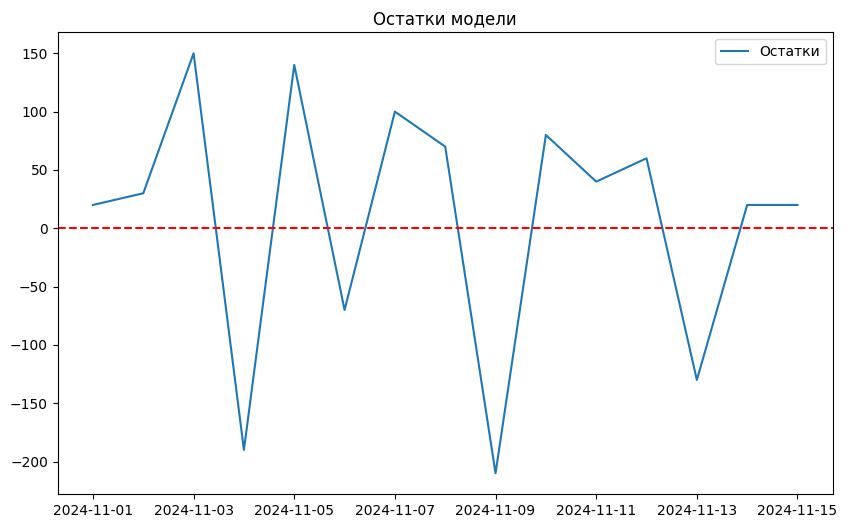


Результаты теста Льюнг-Бокса:
    lb_stat  lb_pvalue
5  8.669088   0.123014


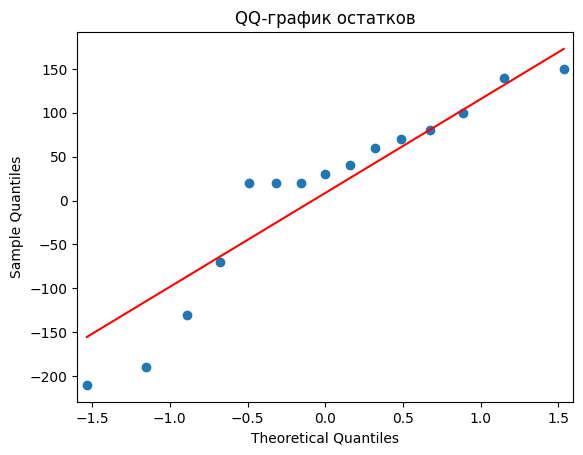

Статистика Шапиро-Уилка: 0.891974775510981
p-value Шапиро-Уилка: 0.07183925402160721
Остатки распределены нормально.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be

Оптимальные параметры по кросс-валидации: p=2, q=2 (MSE=4415.8456)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import t

# Пример данных
data = {
    'Дата': ['2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04', '2024-11-05',
             '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
             '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15'],
    'Количество проданных единиц': [20, 50, 200, 10, 150, 80, 180, 250, 40, 120, 160, 220, 90, 110, 130]
}

# Создание DataFrame
df = pd.DataFrame(data)
df['Дата'] = pd.to_datetime(df['Дата'])
df.set_index('Дата', inplace=True)

# Получение временного ряда
sales = df['Количество проданных единиц']

# 1. Визуализация данных
plt.figure(figsize=(10, 6))
plt.plot(sales, label="Количество проданных единиц")
plt.title("Продажи за несколько дней")
plt.xlabel("Дата")
plt.ylabel("Количество проданных единиц")
plt.legend()
plt.show()

# 2. Функция для проверки стационарности
def check_stationarity(series):
    adf_result = adfuller(series)
    print("ADF Statistic:", adf_result[0])
    print("p-value:", adf_result[1])
    return adf_result[1] < 0.05

# 3. Поиск оптимального значения d
max_d = 2  # Зададим максимальное значение d (обычно 0, 1, или 2)
best_d = 0
for d in range(max_d + 1):
    diff_series = sales.diff(d).dropna() if d > 0 else sales
    print(f"Тест для d={d}:")
    if check_stationarity(diff_series):
        best_d = d
        print(f"Оптимальное d найдено: {best_d}")
        break
else:
    print(f"Не удалось найти стационарный ряд. Используем максимальное d={max_d}")
    best_d = max_d

# 4. Перебор значений p, q и P, Q для оптимального d
p_values = range(1, 6)
q_values = range(1, 6)
seasonal_PQ_values = range(0, 3)  # Можно добавить параметры сезонности от 0 до 2
S = 7  # Период сезонности (например, 7 дней, если данные еженедельно)
aic_values = []
bic_values = []
orders = []

for p in p_values:
    for q in q_values:
        for P in seasonal_PQ_values:
            for Q in seasonal_PQ_values:
                try:
                    print(f"Тестирование p={p}, d={best_d}, q={q}, P={P}, D=0, Q={Q}, S={S}...")
                    model = SARIMAX(sales, order=(p, best_d, q), seasonal_order=(P, 0, Q, S)).fit()
                    aic_values.append(model.aic)
                    bic_values.append(model.bic)
                    orders.append((p, best_d, q, P, 0, Q, S))
                except Exception as e:
                    print(f"Ошибка при тестировании p={p}, d={best_d}, q={q}, P={P}, Q={Q}: {e}")
                    aic_values.append(np.nan)
                    bic_values.append(np.nan)

# Найдем лучшие параметры по AIC
best_aic_index = np.argmin(aic_values)
best_order_aic = orders[best_aic_index]
print(f"Оптимальные параметры (по AIC): p={best_order_aic[0]}, d={best_order_aic[1]}, q={best_order_aic[2]}, P={best_order_aic[3]}, Q={best_order_aic[5]}")

# Найдем лучшие параметры по BIC
best_bic_index = np.argmin(bic_values)
best_order_bic = orders[best_bic_index]
print(f"Оптимальные параметры (по BIC): p={best_order_bic[0]}, d={best_order_bic[1]}, q={best_order_bic[2]}, P={best_order_bic[3]}, Q={best_order_bic[5]}")

# 5. Обучение модели с лучшими параметрами
model = SARIMAX(sales, order=best_order_aic[:3], seasonal_order=best_order_aic[3:]).fit()

print(result.summary())

# 6. Диагностика модели
residuals = model.resid

# Остатки: Визуализация
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Остатки")
plt.axhline(0, linestyle="--", color="red")
plt.title("Остатки модели")
plt.legend()
plt.show()

# Тест Льюнг-Бокса на автокорреляцию остатков
ljung_box = acorr_ljungbox(residuals, lags=[best_order_aic[0] + best_order_aic[2]], return_df=True)
print("\nРезультаты теста Льюнг-Бокса:")
print(ljung_box)

# QQ-график остатков
sm.qqplot(residuals, line='s')
plt.title("QQ-график остатков")
plt.show()

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print("Статистика Шапиро-Уилка:", shapiro_test[0])
print("p-value Шапиро-Уилка:", shapiro_test[1])
if shapiro_test[1] > 0.05:
    print("Остатки распределены нормально.")
else:
    print("Остатки не распределены нормально.")

# 7. Кросс-валидация для выбора параметров
tscv = TimeSeriesSplit(n_splits=3)
cv_errors = []

for p in p_values:
    for q in q_values:
        fold_errors = []
        for train_index, test_index in tscv.split(sales):
            train, test = sales.iloc[train_index], sales.iloc[test_index]
            try:
                model = SARIMAX(train, order=(p, best_d, q), seasonal_order=(0, 0, 0, S)).fit()
                predictions = model.forecast(steps=len(test))
                fold_errors.append(mean_squared_error(test, predictions))
            except Exception as e:
                fold_errors.append(np.nan)
        cv_errors.append((p, q, np.nanmean(fold_errors)))

# Найти минимальную ошибку
optimal_pq = min(cv_errors, key=lambda x: x[2])
print(f"Оптимальные параметры по кросс-валидации: p={optimal_pq[0]}, q={optimal_pq[1]} (MSE={optimal_pq[2]:.4f})")

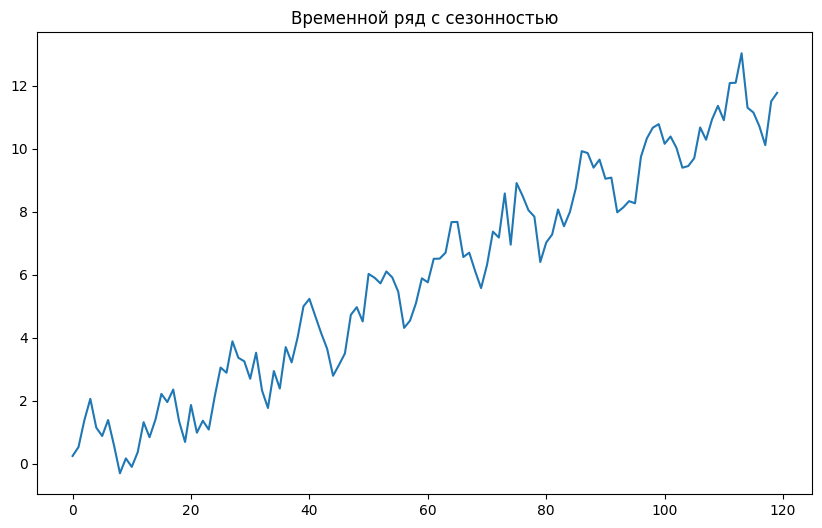

p-value теста Дики-Фуллера: 0.9921870208837585
Ряд не стационарен, требуется дифференцирование
p-value теста Дики-Фуллера после дифференцирования: 1.5803080559387677e-05
Параметры: (0, 0, 0), (0, 0, 0, 12) | AIC: 800.004762593746
Параметры: (0, 0, 0), (0, 0, 1, 12) | AIC: 629.2544407658214
Параметры: (0, 0, 0), (0, 0, 2, 12) | AIC: 505.57493005989113
Параметры: (0, 0, 0), (0, 1, 0, 12) | AIC: 372.30832676363207
Параметры: (0, 0, 0), (0, 1, 1, 12) | AIC: 312.13374408584383


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (0, 0, 0), (0, 1, 2, 12) | AIC: 270.56925579217847
Параметры: (0, 0, 0), (1, 0, 0, 12) | AIC: 289.35568381711926
Параметры: (0, 0, 0), (1, 0, 1, 12) | AIC: 288.1338904285275


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (0, 0, 0), (1, 0, 2, 12) | AIC: 257.7075512402864
Параметры: (0, 0, 0), (1, 1, 0, 12) | AIC: 286.67579651572237
Параметры: (0, 0, 0), (1, 1, 1, 12) | AIC: 233.85240576679794
Параметры: (0, 0, 0), (1, 1, 2, 12) | AIC: 166.2389650381322
Параметры: (0, 0, 0), (2, 0, 0, 12) | AIC: 257.0218298861994
Параметры: (0, 0, 0), (2, 0, 1, 12) | AIC: 230.81538680306062
Параметры: (0, 0, 0), (2, 0, 2, 12) | AIC: 209.83836990008606
Параметры: (0, 0, 0), (2, 1, 0, 12) | AIC: 212.09091678333493
Параметры: (0, 0, 0), (2, 1, 1, 12) | AIC: 180.87084716267287
Параметры: (0, 0, 0), (2, 1, 2, 12) | AIC: 179.54688726458423
Параметры: (0, 0, 1), (0, 0, 0, 12) | AIC: 650.3464867085297
Параметры: (0, 0, 1), (0, 0, 1, 12) | AIC: 508.6163411100427
Параметры: (0, 0, 1), (0, 0, 2, 12) | AIC: 440.2491394509013
Параметры: (0, 0, 1), (0, 1, 0, 12) | AIC: 322.71165330002833
Параметры: (0, 0, 1), (0, 1, 1, 12) | AIC: 283.77964333440264


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (0, 0, 1), (0, 1, 2, 12) | AIC: 249.47722929191605
Параметры: (0, 0, 1), (1, 0, 0, 12) | AIC: 278.8551083344068


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (0, 0, 1), (1, 0, 1, 12) | AIC: 277.0075930910384
Параметры: (0, 0, 1), (1, 0, 2, 12) | AIC: 244.29978443505226
Параметры: (0, 0, 1), (1, 1, 0, 12) | AIC: 283.1073434317498
Параметры: (0, 0, 1), (1, 1, 1, 12) | AIC: 230.10709874731413
Параметры: (0, 0, 1), (1, 1, 2, 12) | AIC: 164.74917934736087
Параметры: (0, 0, 1), (2, 0, 0, 12) | AIC: 248.01472013864395


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (0, 0, 1), (2, 0, 1, 12) | AIC: 250.4765639721245


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (0, 0, 1), (2, 0, 2, 12) | AIC: 208.58651482425253
Параметры: (0, 0, 1), (2, 1, 0, 12) | AIC: 213.70037206819367


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (0, 0, 1), (2, 1, 1, 12) | AIC: 181.65389037722892
Параметры: (0, 0, 1), (2, 1, 2, 12) | AIC: 176.82354032369673
Параметры: (0, 0, 2), (0, 0, 0, 12) | AIC: 558.1098506971604
Параметры: (0, 0, 2), (0, 0, 1, 12) | AIC: 452.8374806362068
Параметры: (0, 0, 2), (0, 0, 2, 12) | AIC: 367.27472145007096
Параметры: (0, 0, 2), (0, 1, 0, 12) | AIC: 302.3861160837343
Параметры: (0, 0, 2), (0, 1, 1, 12) | AIC: 268.3710765822923


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (0, 0, 2), (0, 1, 2, 12) | AIC: 234.5177906478749
Параметры: (0, 0, 2), (1, 0, 0, 12) | AIC: 276.1465127324971


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (0, 0, 2), (1, 0, 1, 12) | AIC: 273.0732861861981
Параметры: (0, 0, 2), (1, 0, 2, 12) | AIC: 230.8827912953394
Параметры: (0, 0, 2), (1, 1, 0, 12) | AIC: 277.4548809610028
Параметры: (0, 0, 2), (1, 1, 1, 12) | AIC: 227.93409684882332
Параметры: (0, 0, 2), (1, 1, 2, 12) | AIC: 163.7257939285802
Параметры: (0, 0, 2), (2, 0, 0, 12) | AIC: 241.450090762345


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (0, 0, 2), (2, 0, 1, 12) | AIC: 243.87402781843824


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (0, 0, 2), (2, 0, 2, 12) | AIC: 236.91933611233813
Параметры: (0, 0, 2), (2, 1, 0, 12) | AIC: 215.56388909921355
Параметры: (0, 0, 2), (2, 1, 1, 12) | AIC: 182.68438332868436
Параметры: (0, 0, 2), (2, 1, 2, 12) | AIC: 175.70349275375614
Параметры: (0, 1, 0), (0, 0, 0, 12) | AIC: 267.027055809907
Параметры: (0, 1, 0), (0, 0, 1, 12) | AIC: 239.59041879711668
Параметры: (0, 1, 0), (0, 0, 2, 12) | AIC: 214.18127380834497
Параметры: (0, 1, 0), (0, 1, 0, 12) | AIC: 286.73567436110676
Параметры: (0, 1, 0), (0, 1, 1, 12) | AIC: 202.12606610840123
Параметры: (0, 1, 0), (0, 1, 2, 12) | AIC: 181.1048242905997
Параметры: (0, 1, 0), (1, 0, 0, 12) | AIC: 240.82207247799602
Параметры: (0, 1, 0), (1, 0, 1, 12) | AIC: 235.00190316721933
Параметры: (0, 1, 0), (1, 0, 2, 12) | AIC: 211.90809181869255
Параметры: (0, 1, 0), (1, 1, 0, 12) | AIC: 236.17982530491082
Параметры: (0, 1, 0), (1, 1, 1, 12) | AIC: 211.31759465915076
Параметры: (0, 1, 0), (1, 1, 2, 12) | AIC: 180.78350684714098
Параметры: 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (0, 1, 0), (2, 0, 1, 12) | AIC: 214.71187063378295
Параметры: (0, 1, 0), (2, 0, 2, 12) | AIC: 208.80085553045936
Параметры: (0, 1, 0), (2, 1, 0, 12) | AIC: 191.55434630516797
Параметры: (0, 1, 0), (2, 1, 1, 12) | AIC: 184.4044260589049
Параметры: (0, 1, 0), (2, 1, 2, 12) | AIC: 180.47234270837694
Параметры: (0, 1, 1), (0, 0, 0, 12) | AIC: 263.20530751616263
Параметры: (0, 1, 1), (0, 0, 1, 12) | AIC: 232.3293733851086
Параметры: (0, 1, 1), (0, 0, 2, 12) | AIC: 205.25228160494953
Параметры: (0, 1, 1), (0, 1, 0, 12) | AIC: 220.9486947655146
Параметры: (0, 1, 1), (0, 1, 1, 12) | AIC: 141.56869349039886
Параметры: (0, 1, 1), (0, 1, 2, 12) | AIC: 127.33688747293847
Параметры: (0, 1, 1), (1, 0, 0, 12) | AIC: 221.06604253624013
Параметры: (0, 1, 1), (1, 0, 1, 12) | AIC: 173.33844152386487
Параметры: (0, 1, 1), (1, 0, 2, 12) | AIC: 152.48497742624647
Параметры: (0, 1, 1), (1, 1, 0, 12) | AIC: 168.61665731643185
Параметры: (0, 1, 1), (1, 1, 1, 12) | AIC: 146.66415876108246
Параметры: 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (0, 1, 2), (2, 0, 1, 12) | AIC: 153.89771781735988
Параметры: (0, 1, 2), (2, 0, 2, 12) | AIC: 146.57819134919689
Параметры: (0, 1, 2), (2, 1, 0, 12) | AIC: 143.79708547394003
Параметры: (0, 1, 2), (2, 1, 1, 12) | AIC: 134.9488702006592
Параметры: (0, 1, 2), (2, 1, 2, 12) | AIC: 129.9830800575237
Параметры: (1, 0, 0), (0, 0, 0, 12) | AIC: 269.9738917858726
Параметры: (1, 0, 0), (0, 0, 1, 12) | AIC: 243.06848732066334


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 0, 0), (0, 0, 2, 12) | AIC: 219.36436794282477
Параметры: (1, 0, 0), (0, 1, 0, 12) | AIC: 278.2860788687
Параметры: (1, 0, 0), (0, 1, 1, 12) | AIC: 206.82713512019737
Параметры: (1, 0, 0), (0, 1, 2, 12) | AIC: 184.79379465704955
Параметры: (1, 0, 0), (1, 0, 0, 12) | AIC: 242.69351577596368
Параметры: (1, 0, 0), (1, 0, 1, 12) | AIC: 239.26692985218813
Параметры: (1, 0, 0), (1, 0, 2, 12) | AIC: 217.8619535657501
Параметры: (1, 0, 0), (1, 1, 0, 12) | AIC: 233.8828136452927
Параметры: (1, 0, 0), (1, 1, 1, 12) | AIC: 216.61253722840286
Параметры: (1, 0, 0), (1, 1, 2, 12) | AIC: 184.3221770325185
Параметры: (1, 0, 0), (2, 0, 0, 12) | AIC: 233.79563805028795
Параметры: (1, 0, 0), (2, 0, 1, 12) | AIC: 216.69030379218714
Параметры: (1, 0, 0), (2, 0, 2, 12) | AIC: 213.80232813281606
Параметры: (1, 0, 0), (2, 1, 0, 12) | AIC: 211.5654499140353
Параметры: (1, 0, 0), (2, 1, 1, 12) | AIC: 179.800672873603
Параметры: (1, 0, 0), (2, 1, 2, 12) | AIC: 180.51472310341953
Параметры: (1, 0, 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 0, 1), (0, 0, 2, 12) | AIC: 211.2685669258756
Параметры: (1, 0, 1), (0, 1, 0, 12) | AIC: 224.25036565502757
Параметры: (1, 0, 1), (0, 1, 1, 12) | AIC: 143.9714517500956
Параметры: (1, 0, 1), (0, 1, 2, 12) | AIC: 128.7645034265953
Параметры: (1, 0, 1), (1, 0, 0, 12) | AIC: 216.5766899381575
Параметры: (1, 0, 1), (1, 0, 1, 12) | AIC: 175.85306171476637
Параметры: (1, 0, 1), (1, 0, 2, 12) | AIC: 156.7554773082135
Параметры: (1, 0, 1), (1, 1, 0, 12) | AIC: 170.61663541370868
Параметры: (1, 0, 1), (1, 1, 1, 12) | AIC: 149.14756301306457


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 0, 1), (1, 1, 2, 12) | AIC: 128.82680249493546
Параметры: (1, 0, 1), (2, 0, 0, 12) | AIC: 167.757779996111
Параметры: (1, 0, 1), (2, 0, 1, 12) | AIC: 154.64386456254866
Параметры: (1, 0, 1), (2, 0, 2, 12) | AIC: 149.97098835808697
Параметры: (1, 0, 1), (2, 1, 0, 12) | AIC: 143.794915479642


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 0, 1), (2, 1, 1, 12) | AIC: 134.7753381382732
Параметры: (1, 0, 1), (2, 1, 2, 12) | AIC: 131.27895115165256
Параметры: (1, 0, 2), (0, 0, 0, 12) | AIC: 263.88874367515393
Параметры: (1, 0, 2), (0, 0, 1, 12) | AIC: 234.85236455518972


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 0, 2), (0, 0, 2, 12) | AIC: 212.22374387272822
Параметры: (1, 0, 2), (0, 1, 0, 12) | AIC: 224.02178890037206
Параметры: (1, 0, 2), (0, 1, 1, 12) | AIC: 145.41823641765433


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 0, 2), (0, 1, 2, 12) | AIC: 129.257798164747
Параметры: (1, 0, 2), (1, 0, 0, 12) | AIC: 217.07857041156004
Параметры: (1, 0, 2), (1, 0, 1, 12) | AIC: 177.3384358716045
Параметры: (1, 0, 2), (1, 0, 2, 12) | AIC: 156.77253943921738
Параметры: (1, 0, 2), (1, 1, 0, 12) | AIC: 171.52945979514155


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 0, 2), (1, 1, 1, 12) | AIC: 149.2385400312241


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 0, 2), (1, 1, 2, 12) | AIC: 133.45278039600538
Параметры: (1, 0, 2), (2, 0, 0, 12) | AIC: 169.40203013019376


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 0, 2), (2, 0, 1, 12) | AIC: 155.91701587982476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 0, 2), (2, 0, 2, 12) | AIC: 150.11043258422075


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 0, 2), (2, 1, 0, 12) | AIC: 145.79290820149197


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 0, 2), (2, 1, 1, 12) | AIC: 136.70293302989379


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 0, 2), (2, 1, 2, 12) | AIC: 133.0094011187585
Параметры: (1, 1, 0), (0, 0, 0, 12) | AIC: 265.3929402543455
Параметры: (1, 1, 0), (0, 0, 1, 12) | AIC: 233.70658627730887
Параметры: (1, 1, 0), (0, 0, 2, 12) | AIC: 206.78913195556842
Параметры: (1, 1, 0), (0, 1, 0, 12) | AIC: 264.2445801658126
Параметры: (1, 1, 0), (0, 1, 1, 12) | AIC: 178.65817657843445


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 1, 0), (0, 1, 2, 12) | AIC: 159.61929000782365
Параметры: (1, 1, 0), (1, 0, 0, 12) | AIC: 229.56200283701622
Параметры: (1, 1, 0), (1, 0, 1, 12) | AIC: 212.92060406725503
Параметры: (1, 1, 0), (1, 0, 2, 12) | AIC: 189.72604356193054
Параметры: (1, 1, 0), (1, 1, 0, 12) | AIC: 206.61620775577265
Параметры: (1, 1, 0), (1, 1, 1, 12) | AIC: 187.1704636659445
Параметры: (1, 1, 0), (1, 1, 2, 12) | AIC: 160.33658409857455
Параметры: (1, 1, 0), (2, 0, 0, 12) | AIC: 196.84783706718972
Параметры: (1, 1, 0), (2, 0, 1, 12) | AIC: 188.7186750634256
Параметры: (1, 1, 0), (2, 0, 2, 12) | AIC: 184.9712776952502
Параметры: (1, 1, 0), (2, 1, 0, 12) | AIC: 170.32596624703788
Параметры: (1, 1, 0), (2, 1, 1, 12) | AIC: 159.78192693449537
Параметры: (1, 1, 0), (2, 1, 2, 12) | AIC: 160.76680916031452
Параметры: (1, 1, 1), (0, 0, 0, 12) | AIC: 264.23142850069183
Параметры: (1, 1, 1), (0, 0, 1, 12) | AIC: 233.65315843299052
Параметры: (1, 1, 1), (0, 0, 2, 12) | AIC: 206.95625377202956
Параметры: 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (1, 1, 2), (1, 0, 2, 12) | AIC: 153.2832012366321
Параметры: (1, 1, 2), (1, 1, 0, 12) | AIC: 167.1732581947277
Параметры: (1, 1, 2), (1, 1, 1, 12) | AIC: 146.64998105496184
Параметры: (1, 1, 2), (1, 1, 2, 12) | AIC: 128.48261422963415
Параметры: (1, 1, 2), (2, 0, 0, 12) | AIC: 171.02589209956878
Параметры: (1, 1, 2), (2, 0, 1, 12) | AIC: 153.82829977203625
Параметры: (1, 1, 2), (2, 0, 2, 12) | AIC: 148.57748372638494
Параметры: (1, 1, 2), (2, 1, 0, 12) | AIC: 143.5617295683123
Параметры: (1, 1, 2), (2, 1, 1, 12) | AIC: 133.2675012438499
Параметры: (1, 1, 2), (2, 1, 2, 12) | AIC: 131.98346208965953
Параметры: (2, 0, 0), (0, 0, 0, 12) | AIC: 266.39227613319576
Параметры: (2, 0, 0), (0, 0, 1, 12) | AIC: 236.31532145318923


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 0), (0, 0, 2, 12) | AIC: 214.5877574443155
Параметры: (2, 0, 0), (0, 1, 0, 12) | AIC: 261.3444505383984
Параметры: (2, 0, 0), (0, 1, 1, 12) | AIC: 185.39028087816632
Параметры: (2, 0, 0), (0, 1, 2, 12) | AIC: 163.1297080780107
Параметры: (2, 0, 0), (1, 0, 0, 12) | AIC: 231.16704905065316
Параметры: (2, 0, 0), (1, 0, 1, 12) | AIC: 214.91871556466594
Параметры: (2, 0, 0), (1, 0, 2, 12) | AIC: 196.3295593000394
Параметры: (2, 0, 0), (1, 1, 0, 12) | AIC: 207.2776475203209
Параметры: (2, 0, 0), (1, 1, 1, 12) | AIC: 189.06476593348015
Параметры: (2, 0, 0), (1, 1, 2, 12) | AIC: 164.19257076392324
Параметры: (2, 0, 0), (2, 0, 0, 12) | AIC: 198.7513131274897
Параметры: (2, 0, 0), (2, 0, 1, 12) | AIC: 190.68690229769388
Параметры: (2, 0, 0), (2, 0, 2, 12) | AIC: 186.94566691420323
Параметры: (2, 0, 0), (2, 1, 0, 12) | AIC: 171.99490367175136
Параметры: (2, 0, 0), (2, 1, 1, 12) | AIC: 178.29950764357184
Параметры: (2, 0, 0), (2, 1, 2, 12) | AIC: 162.7074220874759
Параметры: (2, 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 1), (0, 0, 2, 12) | AIC: 213.04847390196826


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 1), (0, 1, 0, 12) | AIC: 226.12969561758223
Параметры: (2, 0, 1), (0, 1, 1, 12) | AIC: 145.97076123565478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 1), (0, 1, 2, 12) | AIC: 130.5788734991234
Параметры: (2, 0, 1), (1, 0, 0, 12) | AIC: 216.2923983235533
Параметры: (2, 0, 1), (1, 0, 1, 12) | AIC: 177.854491868154
Параметры: (2, 0, 1), (1, 0, 2, 12) | AIC: 158.3389199943026


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 1), (1, 1, 0, 12) | AIC: 168.7040951931055


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 1), (1, 1, 1, 12) | AIC: 150.66551872479062


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 1), (1, 1, 2, 12) | AIC: 134.41803655746452
Параметры: (2, 0, 1), (2, 0, 0, 12) | AIC: 167.73776809897066


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 1), (2, 0, 1, 12) | AIC: 154.50199748175316


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 1), (2, 0, 2, 12) | AIC: 151.41581667199168
Параметры: (2, 0, 1), (2, 1, 0, 12) | AIC: 143.55281493728552


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 1), (2, 1, 1, 12) | AIC: 133.10927465595563


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 1), (2, 1, 2, 12) | AIC: 134.0208261485238
Параметры: (2, 0, 2), (0, 0, 0, 12) | AIC: 265.8840754187327
Параметры: (2, 0, 2), (0, 0, 1, 12) | AIC: 228.2017103776804


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 2), (0, 0, 2, 12) | AIC: 214.65533121023952
Параметры: (2, 0, 2), (0, 1, 0, 12) | AIC: 221.1093310142295


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 2), (0, 1, 1, 12) | AIC: 146.17324619794252


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 2), (0, 1, 2, 12) | AIC: 130.7007144321443
Параметры: (2, 0, 2), (1, 0, 0, 12) | AIC: 214.35392879648978


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 2), (1, 0, 1, 12) | AIC: 178.89913561234314
Параметры: (2, 0, 2), (1, 0, 2, 12) | AIC: 159.1836506597649
Параметры: (2, 0, 2), (1, 1, 0, 12) | AIC: 170.18659049564903


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 2), (1, 1, 1, 12) | AIC: 152.52401042753698


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 2), (1, 1, 2, 12) | AIC: 135.15233424525115


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 2), (2, 0, 0, 12) | AIC: 168.74878640376474


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 2), (2, 0, 1, 12) | AIC: 155.83428487793967


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 2), (2, 0, 2, 12) | AIC: 151.72735610061343
Параметры: (2, 0, 2), (2, 1, 0, 12) | AIC: 146.26270595155012


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 2), (2, 1, 1, 12) | AIC: 133.39863195740395


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 0, 2), (2, 1, 2, 12) | AIC: 133.8316415424227
Параметры: (2, 1, 0), (0, 0, 0, 12) | AIC: 263.85750426104823
Параметры: (2, 1, 0), (0, 0, 1, 12) | AIC: 235.70017275039393
Параметры: (2, 1, 0), (0, 0, 2, 12) | AIC: 208.78331377964605
Параметры: (2, 1, 0), (0, 1, 0, 12) | AIC: 252.2944114903861
Параметры: (2, 1, 0), (0, 1, 1, 12) | AIC: 171.92963688594963
Параметры: (2, 1, 0), (0, 1, 2, 12) | AIC: 156.21279063756742
Параметры: (2, 1, 0), (1, 0, 0, 12) | AIC: 228.71101896650478
Параметры: (2, 1, 0), (1, 0, 1, 12) | AIC: 201.7830515817952
Параметры: (2, 1, 0), (1, 0, 2, 12) | AIC: 184.10506043469854
Параметры: (2, 1, 0), (1, 1, 0, 12) | AIC: 197.67619010288035
Параметры: (2, 1, 0), (1, 1, 1, 12) | AIC: 179.62355613762537
Параметры: (2, 1, 0), (1, 1, 2, 12) | AIC: 157.11746514103544
Параметры: (2, 1, 0), (2, 0, 0, 12) | AIC: 192.85215593560187
Параметры: (2, 1, 0), (2, 0, 1, 12) | AIC: 182.2086937284731
Параметры: (2, 1, 0), (2, 0, 2, 12) | AIC: 177.62425628123157
Параметры: (

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 1, 2), (1, 0, 2, 12) | AIC: 153.86830682104542
Параметры: (2, 1, 2), (1, 1, 0, 12) | AIC: 166.19650139061116
Параметры: (2, 1, 2), (1, 1, 1, 12) | AIC: 150.17609640937695
Параметры: (2, 1, 2), (1, 1, 2, 12) | AIC: 131.5539830219909


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 1, 2), (2, 0, 0, 12) | AIC: 168.53897442297784


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 1, 2), (2, 0, 1, 12) | AIC: 153.06214448920883


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Параметры: (2, 1, 2), (2, 0, 2, 12) | AIC: 148.71971469713543
Параметры: (2, 1, 2), (2, 1, 0, 12) | AIC: 144.57998419219095
Параметры: (2, 1, 2), (2, 1, 1, 12) | AIC: 134.06645832730646
Параметры: (2, 1, 2), (2, 1, 2, 12) | AIC: 133.98328696740646

Наилучшие параметры: (0, 1, 1), (1, 1, 2, 12) | AIC: 126.54739959696396
                                        SARIMAX Results                                        
Dep. Variable:                                   Value   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                 -58.274
Date:                                 Sat, 30 Nov 2024   AIC                            126.547
Time:                                         11:59:57   BIC                            138.520
Sample:                                              0   HQIC                           131.351
                                                 - 120                                         
Covaria

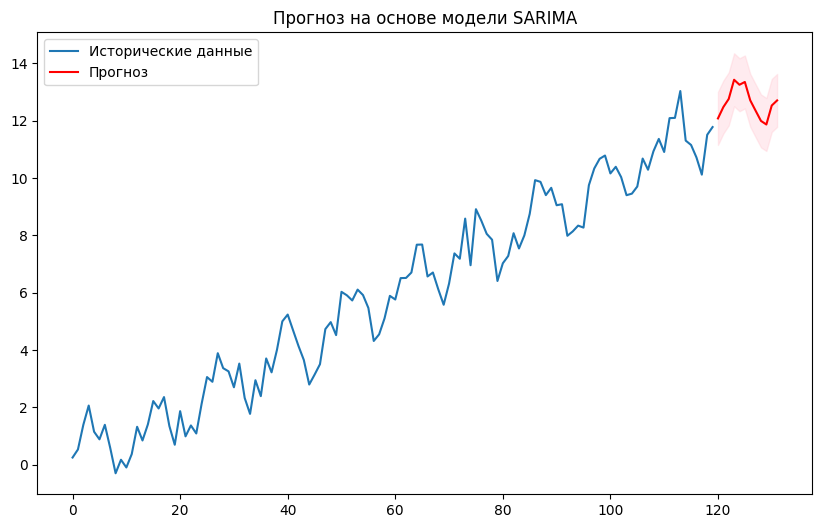

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

# Генерация синтетических данных (пример)
np.random.seed(42)
n = 120  # 10 лет ежемесячных данных
t = np.arange(n)
seasonal_effect = np.sin(t / 12 * 2 * np.pi)  # Сезонность
trend = 0.1 * t  # Линейный тренд
noise = np.random.normal(scale=0.5, size=n)  # Шум
data = seasonal_effect + trend + noise  # Сумма эффектов

# Преобразуем в Pandas DataFrame для удобства
data = pd.Series(data, name='Value')

# Визуализация временного ряда
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Временной ряд с сезонностью')
plt.show()

# Шаг 1: Определение сезонности s
seasonality = 12  # Для ежемесячных данных

# Шаг 2: Тест на стационарность
result = adfuller(data)
print(f'p-value теста Дики-Фуллера: {result[1]}')
if result[1] < 0.05:
    print("Ряд стационарен")
else:
    print("Ряд не стационарен, требуется дифференцирование")

# Если ряд не стационарен, применим дифференцирование
# В нашем примере можно попробовать сезонное дифференцирование

# Шаг 3: Дифференцирование для стационарности
data_diff = data.diff(seasonality).dropna()

# Проверим снова на стационарность после дифференцирования
result = adfuller(data_diff)
print(f'p-value теста Дики-Фуллера после дифференцирования: {result[1]}')

# Шаг 4: Определение диапазона параметров для перебора
# Подбор параметров для SARIMA (P, D, Q)
p = q = range(0, 3)  # Пример диапазона для P и Q
d = range(0, 2)  # Подбираем только D = 0 или D = 1
P = Q = range(0, 3)  # Сезонные параметры P и Q
S = [seasonality]  # Сезонность, уже определена как 12 для месячных данных

# Перебор всех возможных комбинаций параметров
best_aic = np.inf
best_order = None
best_seasonal_order = None
best_model = None

# Перебор по сетке всех комбинаций параметров (P, D, Q, s)
for param in product(p, d, q):
    for seasonal_param in product(P, d, Q, S):
        try:
            # Параметры для SARIMA
            order = param  # (p, d, q)
            seasonal_order = seasonal_param  # (P, D, Q, s)

            # Модель SARIMA
            model = SARIMAX(data,
                            order=order,  # Несаонные параметры
                            seasonal_order=seasonal_order,  # Сезонные параметры
                            enforce_stationarity=False,
                            enforce_invertibility=False)

            # Обучаем модель
            results = model.fit(disp=False)

            # Оценка модели по AIC
            aic = results.aic
            print(f"Параметры: {order}, {seasonal_order} | AIC: {aic}")

            # Сравниваем AIC и выбираем наилучшую модель
            if aic < best_aic:
                best_aic = aic
                best_order = order
                best_seasonal_order = seasonal_order
                best_model = results
        except Exception as e:
            continue

# Выводим лучшие параметры и результаты
print(f"\nНаилучшие параметры: {best_order}, {best_seasonal_order} | AIC: {best_aic}")
print(best_model.summary())

# Шаг 5: Прогнозирование
forecast_steps = 12  # Прогнозируем на 12 шагов вперёд
forecast = best_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Визуализация прогноза
plt.figure(figsize=(10, 6))
plt.plot(data, label='Исторические данные')
plt.plot(forecast_mean, label='Прогноз', color='red')
plt.fill_between(forecast_mean.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Прогноз на основе модели SARIMA')
plt.legend()
plt.show()



**ARIMAX** — это обобщение модели ARIMA, которое учитывает экзогенные факторы. Пусть $x_t \in \mathbb{R}^n$ — вектор регрессоров, известный до начала прогноза.

Простой вариант модели ARIMAX:

$$
(1 - L)^d y_t = \mu + \sum_{i=1}^n \beta_i a(L) x_{t-i} + b(L) a(L) \varepsilon_t
$$

Общий случай модели ARIMAX:

$$
(1 - L)^d y_t = \mu + \sum_{i=1}^n u_i(L) v_i(L) x_{t-i} + a(L) b(L) \varepsilon_t
$$

Пример регрессора $x_t$: $x_t = I(\text{в момент времени } t \text{ — праздник})$, где $I$ — индикаторная функция.

Модели SARIMA и ARIMAX могут быть объединены в одну модель **SARIMAX** $(p,d,q) \times (P,D,Q)_s$:


Корреляция между признаками и целевой переменной:
                             Количество проданных единиц  Праздничный день  \
Количество проданных единиц                     1.000000          0.512149   
Праздничный день                                0.512149          1.000000   
День недели                                    -0.000322          0.410632   

                             День недели  
Количество проданных единиц    -0.000322  
Праздничный день                0.410632  
День недели                     1.000000  


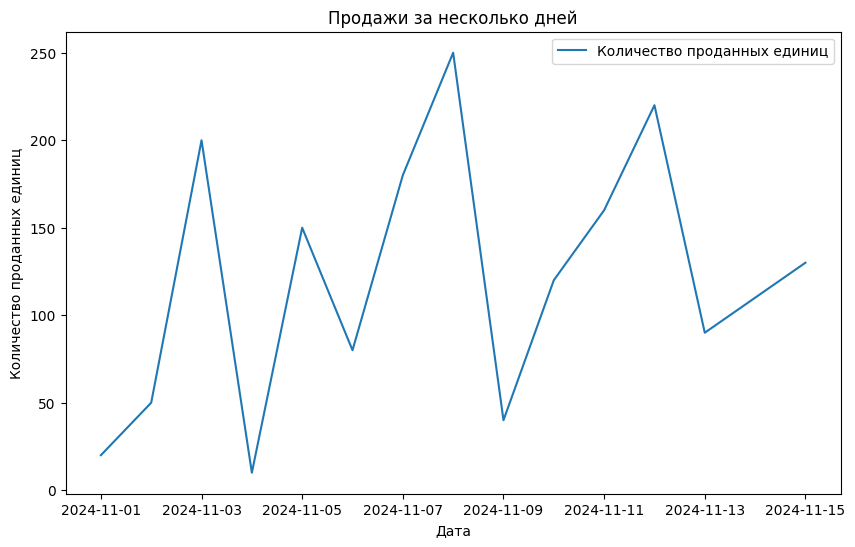

ADF Statistic: -2.532607144623628
p-value: 0.10774085696237806
Ряд нестационарен. Попробуем разности.
ADF Statistic (после дифференцирования): -4.167777386122715
p-value (после дифференцирования): 0.0007467227853716068
Ряд стал стационарным после дифференцирования.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Оптимальный порядок p для ARMAX: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                    SARIMAX Results                                    
Dep. Variable:     Количество проданных единиц   No. Observations:                   14
Model:                          ARIMA(5, 0, 0)   Log Likelihood                 -71.976
Date:                         Sat, 30 Nov 2024   AIC                            161.952
Time:                                 11:37:46   BIC                            167.704
Sample:                             11-02-2024   HQIC                           161.420
                                  - 11-15-2024                                         
Covariance Type:                           opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               22.4510      8.251      2.721      0.007       6.280      38.622
Праздничный день    91.0689     33.524   

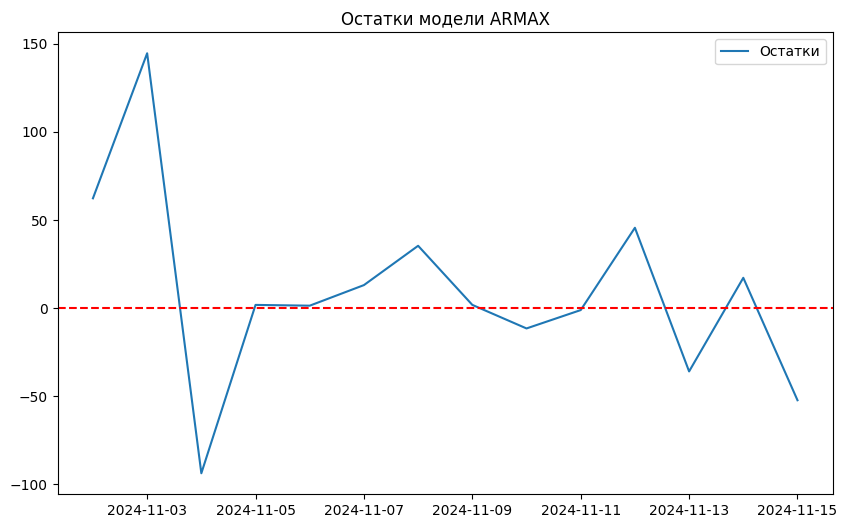


Результаты теста Льюнг-Бокса:
    lb_stat  lb_pvalue
5  1.497675   0.913338


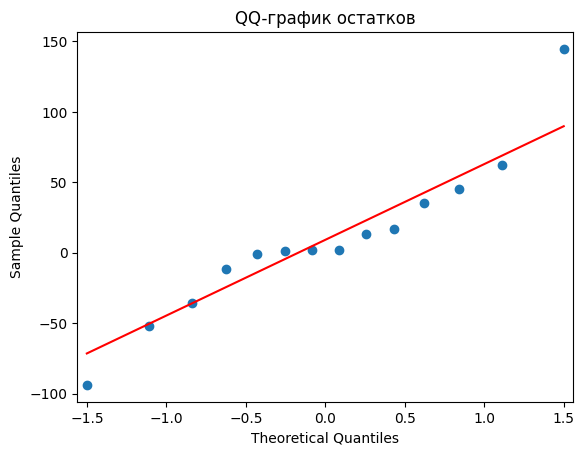

Статистика Шапиро-Уилка: 0.939968015036313
p-value Шапиро-Уилка: 0.41791444049247795
Остатки распределены нормально.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import t

# Пример расширенных данных
data = {
    'Дата': ['2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04', '2024-11-05',
             '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
             '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15'],
    'Количество проданных единиц': [20, 50, 200, 10, 150, 80, 180, 250, 40, 120, 160, 220, 90, 110, 130],
    'Праздничный день': [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],  # Экзогенная переменная
}

# Создание DataFrame
df = pd.DataFrame(data)

# Преобразование даты в формат pandas
df['Дата'] = pd.to_datetime(df['Дата'])
df.set_index('Дата', inplace=True)

# Добавление сезонного признака (день недели)
df['День недели'] = df.index.dayofweek

# Проверка корреляции с целевой переменной
print("Корреляция между признаками и целевой переменной:")
print(df.corr())

# Получение временного ряда и экзогенных переменных
sales = df['Количество проданных единиц']
exog_vars = df[['Праздничный день', 'День недели']]

# Визуализация данных
plt.figure(figsize=(10, 6))
plt.plot(sales, label="Количество проданных единиц")
plt.title("Продажи за несколько дней")
plt.xlabel("Дата")
plt.ylabel("Количество проданных единиц")
plt.legend()
plt.show()

# Проверка стационарности (ADF-тест)
adf_result = adfuller(sales)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("Ряд стационарен.")
else:
    print("Ряд нестационарен. Попробуем разности.")

# Разности для стационарности
if adf_result[1] >= 0.05:
    sales_diff = sales.diff().dropna()
    adf_result_diff = adfuller(sales_diff)
    print("ADF Statistic (после дифференцирования):", adf_result_diff[0])
    print("p-value (после дифференцирования):", adf_result_diff[1])
    if adf_result_diff[1] < 0.05:
        print("Ряд стал стационарным после дифференцирования.")
    else:
        print("Ряд всё ещё нестационарен.")
else:
    sales_diff = sales

# Оптимальный порядок AR (p)
aic_values = []
p_values = range(1, 6)

for p in p_values:
    try:
        model = ARIMA(sales_diff, order=(p, 0, 0), exog=exog_vars.iloc[1:]).fit()
        aic_values.append(model.aic)
    except Exception as e:
        aic_values.append(np.nan)

# Оптимальный порядок
optimal_p = np.argmin(aic_values) + 1
print("Оптимальный порядок p для ARMAX:", optimal_p)

# Обучение модели ARMAX
model_armax = ARIMA(sales_diff, order=(optimal_p, 0, 0), exog=exog_vars.iloc[1:])
result_armax = model_armax.fit()

print(result_armax.summary())

# Оценка модели и значимости экзогенных переменных
coefficients = result_armax.params
stderr = result_armax.bse

print("\nПроверка значимости коэффициентов:")
for param, coef, std_err in zip(coefficients.index, coefficients, stderr):
    t_stat = coef / std_err
    p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=len(sales_diff) - optimal_p - len(coefficients)))
    print(f"{param}: коэффициент={coef:.4f}, t-статистика={t_stat:.4f}, p-value={p_value:.4f}")

# Прогнозирование
forecast_steps = 5
exog_forecast = exog_vars.iloc[-forecast_steps:]
forecast = result_armax.forecast(steps=forecast_steps, exog=exog_forecast)
print("\nПрогноз на следующие 5 дней:")
print(forecast)

# Диагностика остатков
residuals = result_armax.resid

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Остатки")
plt.axhline(0, linestyle="--", color="red")
plt.title("Остатки модели ARMAX")
plt.legend()
plt.show()

# Тест Льюнг-Бокса
ljung_box = acorr_ljungbox(residuals, lags=[optimal_p], return_df=True)
print("\nРезультаты теста Льюнг-Бокса:")
print(ljung_box)

# QQ-график остатков
sm.qqplot(residuals, line='s')
plt.title("QQ-график остатков")
plt.show()

# Тест Шапиро-Уилка
shapiro_test = shapiro(residuals)
print("Статистика Шапиро-Уилка:", shapiro_test[0])
print("p-value Шапиро-Уилка:", shapiro_test[1])
if shapiro_test[1] > 0.05:
    print("Остатки распределены нормально.")
else:
    print("Остатки не распределены нормально.")


Прогноз на следующие дни:
2024-11-16    206.457703
2024-11-17   -276.590351
2024-11-18     91.989306
2024-11-19     20.562038
2024-11-20    140.164290
Freq: D, Name: predicted_mean, dtype: float64


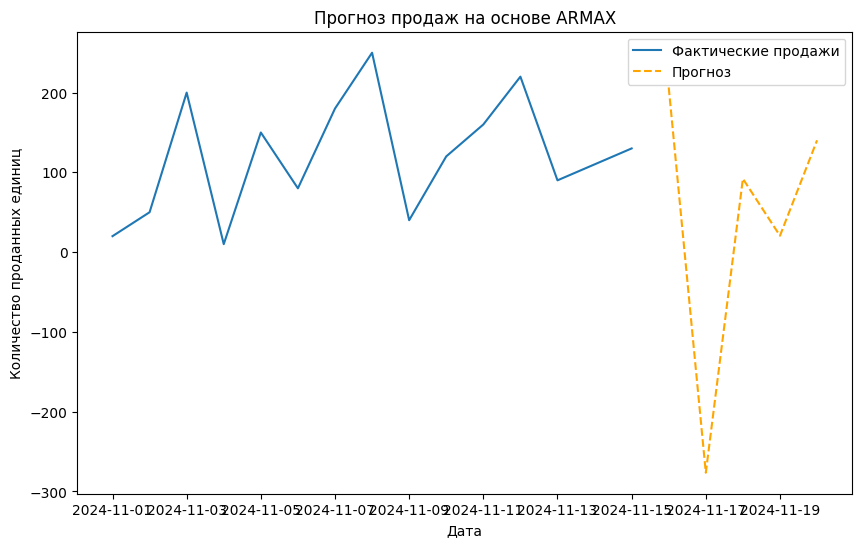

In [ ]:
# Данные для прогноза
future_dates = pd.date_range(start='2024-11-16', end='2024-11-20')  # Даты для прогноза
future_data = {
    'Праздничный день': [0, 0, 0, 1, 0],  # Пример будущих данных
    'День недели': future_dates.dayofweek  # Вычисляем дни недели для будущих дат
}
future_exog = pd.DataFrame(future_data, index=future_dates)

# Прогноз на 5 будущих дней
forecast_steps = len(future_dates)
forecast = result_armax.forecast(steps=forecast_steps, exog=future_exog)
forecast.index = future_dates  # Присваиваем индекс прогнозируемым датам

# Вывод прогноза
print("\nПрогноз на следующие дни:")
print(forecast)

# Визуализация прогноза
plt.figure(figsize=(10, 6))
plt.plot(sales, label="Фактические продажи")
plt.plot(forecast, label="Прогноз", linestyle="--", color="orange")
plt.title("Прогноз продаж на основе ARMAX")
plt.xlabel("Дата")
plt.ylabel("Количество проданных единиц")
plt.legend()
plt.show()

## **Модель SARIMAX**

Модель **SARIMAX** (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) обобщает модель ARIMA, добавляя экзогенные регрессоры и сезонные компоненты.

Формально модель SARIMAX $(p,d,q) \times (P,D,Q)_s\) может быть записана следующим образом:

$$
(1 - L)^d (1 - L^s)^D y_t = \mu + \sum_{i=1}^n u_i(L) v_i(L) x_{t-i} + b(L) B(L^s) a(L) A(L^s) \epsilon_t
$$

Где:
- $y_t$ — это значение временного ряда в момент времени $t$.
- $x_t = (x_{t}, x_{t-1}, \dots, x_{t-n})$ — вектор экзогенных переменных (регрессоров), известных до момента прогноза.
- $\epsilon_t$ — ошибка (белый шум).
- $L$ — оператор лагов, то есть $L y_t = y_{t-1}$.
- $s$ — сезонность (например, если данные имеют годовую сезонность, то $s = 12$ для месячных данных).

#### **Компоненты модели**

1. **Оператор дифференцирования**:
   - $(1 - L)^d$ — оператор дифференцирования порядка $d$, отвечающий за удаление тренда.
   - $(1 - L^s)^D$ — сезонный оператор дифференцирования порядка $D$, отвечающий за удаление сезонности.

2. **Автогрегрессия (AR) и сезонная автогрегрессия (SAR)**:
   - $a(L) = 1 - \phi_1 L - \dots - \phi_p L^p$ — полином автогрегрессии (AR-часть).
   - $A(L^s) = 1 - \phi_1 s L^s - \dots - \phi_P L^{Ps}$ — полином сезонной автогрегрессии (SAR-часть).

3. **Скользящее среднее (MA) и сезонное скользящее среднее (SMA)**:
   - $b(L) = 1 + \theta_1 L + \dots + \theta_q L^q$ — полином скользящего среднего (MA-часть).
   - $B(L^s) = 1 + \theta_1 s L^s + \dots + \theta_Q L^{Qs}$ — полином сезонного скользящего среднего (SMA-часть).

4. **Экзогенные переменные**:
   - $x_{t-i}$ — значения экзогенных переменных на предыдущие моменты времени. Модель может включать несколько таких переменных.
   - $u_i(L)$ и $v_i(L)$ — полиномы для лагов экзогенных переменных, которые могут учитывать лаги регрессоров.

5. **Ошибка**:
   - $\epsilon_t$ — ошибка модели, которая является белым шумом с нулевым математическим ожиданием и постоянной дисперсией.

### **Простой случай ARIMAX**

Если сезонность $s$ отсутствует (или не важна), модель ARIMAX сводится к следующей формуле:

$$
(1 - L)^d y_t = \mu + \sum_{i=1}^n \beta_i a(L) x_{t-i} + b(L) \epsilon_t
$$

Где:
- $\beta_i$ — коэффициенты регрессоров $x_{t-i}$.

### **Пример модели SARIMAX**

Рассмотрим пример, когда у нас есть сезонность $s = 12$ (например, ежемесячные данные с годовой сезонностью) и один экзогенный регрессор $x_t$, который имеет влияние на данные с лагом 1.

Модель SARIMAX для таких данных может быть записана как:

$$
(1 - L)^d(1 - L^{12})^D y_t = \mu + \beta_1 a(L) x_{t-1} + b(L) B(L^{12}) a(L) \epsilon_t
$$

Здесь:
- $(1 - L)$ — оператор дифференцирования первого порядка,
- $(1 - L^{12})^D$ — сезонный оператор дифференцирования для ежегодной сезонности,
- $a(L)$ и $b(L)$ — полиномы для авторегрессии и скользящего среднего,
- $\beta_1$ — коэффициент экзогенного регрессора $x_{t-1}$,
- $B(L^{12})$ — сезонный полином для скользящего среднего с периодом 12 месяцев.

Таким образом, модель SARIMAX представляет собой мощный инструмент для прогнозирования временных рядов с учетом как внутренней динамики ряда (через ARIMA-компоненты), так и влияния внешних факторов (через экзогенные переменные).



Конкретные примеры использования моделей **SARIMA**, **ARIMAX** и **SARIMAX** могут быть следующими:

### Пример 1: Модель **SARIMA** для временных рядов с сезонностью
Предположим, что у нас есть данные о продажах одежды в розничной сети. Данные имеют сезонную компоненту: наибольшие продажи наблюдаются в зимние месяцы, а также в период распродаж. Это явный пример временного ряда с сезонностью, который можно смоделировать с помощью модели **SARIMA**.

- **Данные**: количество проданных единиц одежды за каждый месяц за несколько лет.
- **Сезонность**: данные показывают сезонные колебания с периодом в 12 месяцев (год).
- **Модель**: $SARIMA(1, 1, 1) \times (1, 1, 1)_{12}$.
  - $p = 1, d = 1, q = 1$ — параметры для обычной ARIMA (авторегрессия, дифференцирование, скользящее среднее).
  - $P = 1, D = 1, Q = 1, s = 12$ — параметры сезонной компоненты с периодом $s = 12$ месяцев.

Эта модель учитывает:
- Тренд (долгосрочные изменения) в продажах,
- Сезонные колебания, связанные с временем года (например, зимой продажи выше),
- Ошибки модели, которые могут быть связаны с случайными отклонениями или непредсказуемыми факторами (например, экономическими кризисами, изменением потребительских предпочтений).

**Пример уравнения для SARIMA**:

$$
(1 - L)^1 (1 - L^{12})^1 y_t = \mu + \phi_1 y_{t-1} + \theta_1 \varepsilon_{t-1} + \phi_1^s y_{t-12} + \theta_1^s \varepsilon_{t-12} + \varepsilon_t
$$

где:
- $y_t$ — количество проданных единиц одежды в месяц $t$,
- $L$ — оператор запаздывания (например, $L y_t = y_{t-1}$),
- $\phi_1$ и $\theta_1$ — коэффициенты авторегрессии и скользящего среднего,
- $\varepsilon_t$ — ошибка (шум).

### Пример 2: Модель **ARIMAX** для учета внешних факторов
Предположим, что мы хотим спрогнозировать спрос на туристические услуги, учитывая не только исторические данные о спросе, но и влияние экзогенных факторов, таких как температура, стоимость авиабилетов и праздники. Здесь будет уместна модель **ARIMAX**, которая учитывает экзогенные переменные.

- **Данные**: количество бронирований туров на каждый месяц.
- **Экзогенные факторы**:
  - $x_t^1$ — температура в месяце $t$,
  - $x_t^2$ — стоимость авиабилетов в месяц $t$,
  - $x_t^3$ — индикатор наличия праздников в месяце $t$ (например, $x_t^3 = 1$, если в месяце есть праздники, и $x_t^3 = 0$, если их нет).

- **Модель**: $ARIMAX(1, 1, 1)$ с экзогенными переменными:

$$
(1 - L)^1 y_t = \mu + \beta_1 a(L) x_{t-1}^1 + \beta_2 a(L) x_{t-1}^2 + \beta_3 a(L) x_{t-1}^3 + b(L) a(L) \varepsilon_t
$$

где:
- $y_t$ — количество бронирований туров в месяц $t$,
- $x_{t-1}^1, x_{t-1}^2, x_{t-1}^3$ — значения экзогенных переменных за предыдущие месяцы,
- $\beta_1, \beta_2, \beta_3$ — коэффициенты влияния экзогенных факторов на спрос,
- $a(L)$ и $b(L)$ — авторегрессионные компоненты модели.

**Пример уравнения для ARIMAX**:

$$
(1 - L)^1 y_t = \mu + \beta_1 a(L) x_{t-1}^1 + \beta_2 a(L) x_{t-1}^2 + \beta_3 a(L) x_{t-1}^3 + \varepsilon_t
$$

Здесь учитывается влияние температуры, стоимости авиабилетов и праздников на спрос на туристические услуги.

### Пример 3: Модель **SARIMAX** для учета как сезонности, так и внешних факторов
Предположим, что мы хотим прогнозировать продажи мороженого, учитывая как сезонность (пиковые продажи летом), так и влияние праздников и температуры. Для этого можно использовать модель **SARIMAX**.

- **Данные**: количество проданных порций мороженого в каждый день.
- **Сезонность**: продажи выше летом, а в зимные месяцы падают.
- **Экзогенные факторы**:
  - $x_t^1$ — температура в день $t$,
  - $x_t^2$ — индикатор наличия праздников в день $t$.

- **Модель**: $SARIMAX(1, 1, 1) \times (1, 1, 1)_{365}$ с экзогенными переменными:

$$
(1 - L)^1 (1 - L^{365})^1 y_t = \mu + \sum_{i=1}^2 \beta_i a(L) x_{t-i}^i + b(L) B(L^{365}) A(L^{365}) \varepsilon_t
$$

где:
- $y_t$ — количество проданных порций мороженого в день $t$,
- $x_{t-i}^i$ — экзогенные факторы (температура и индикатор праздников),
- $\beta_1, \beta_2$ — коэффициенты влияния экзогенных факторов,
- $A(L^{365})$ и $B(L^{365})$ — сезонные компоненты с периодом в 365 дней (для учета сезонности по годам).

Эти примеры демонстрируют, как модели **SARIMA** и **ARIMAX** могут быть применены для прогнозирования временных рядов с учетом сезонности и экзогенных факторов. Модель **SARIMAX** позволяет учитывать как внутреннюю динамику ряда (через ARIMA-компоненты), так и влияние внешних факторов, включая сезонные колебания и экзогенные переменные.


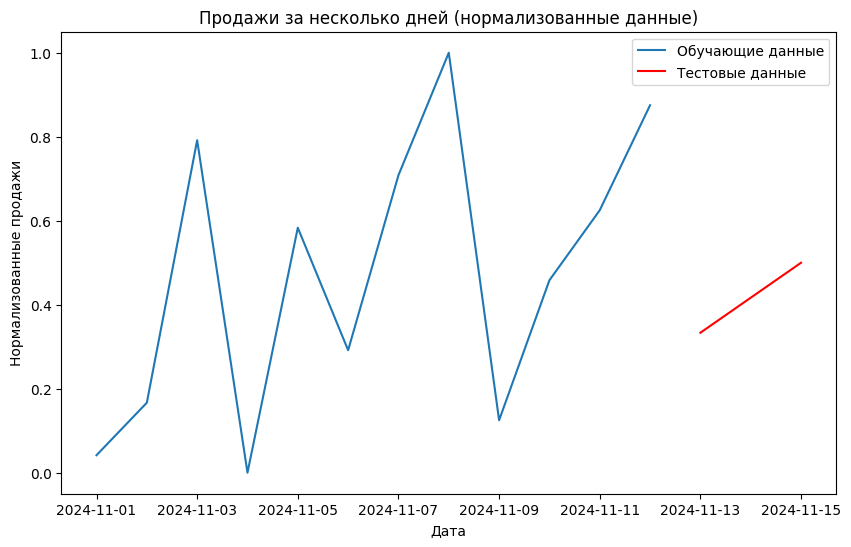

ADF Statistic (для обучающих данных): -1.2057211957175933
p-value (для обучающих данных): 0.6711297683459373
Ряд нестационарен. Попробуем разности.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3160

                                      SARIMAX Results                                      
Dep. Variable:         Количество проданных единиц   No. Observations:                   11
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 7)   Log Likelihood                  -4.245
Date:                             Sat, 30 Nov 2024   AIC                             20.490
Time:                                     11:49:42   BIC                             16.807
Sample:                                 11-02-2024   HQIC                            12.409
                                      - 11-12-2024                                         
Covariance Type:                               opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Праздничный день     0.3016      3.381      0.089      0.929      -6.326       6.929
День неде

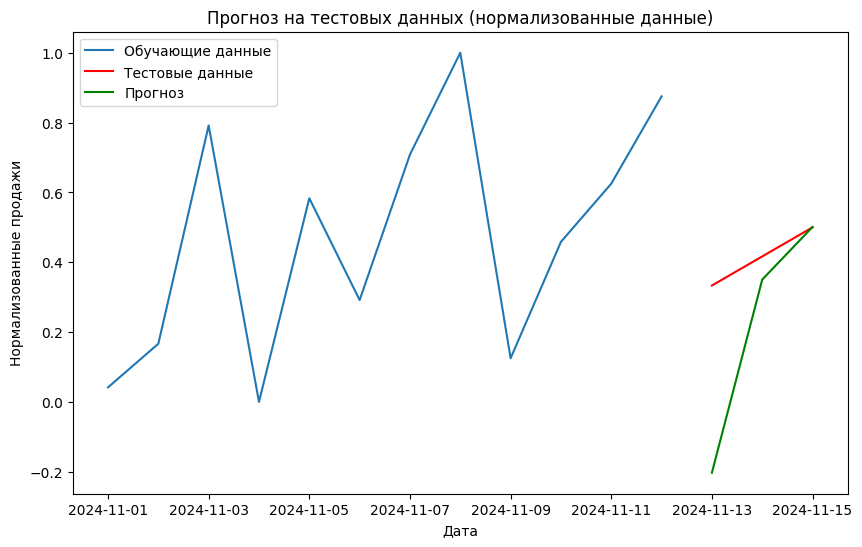

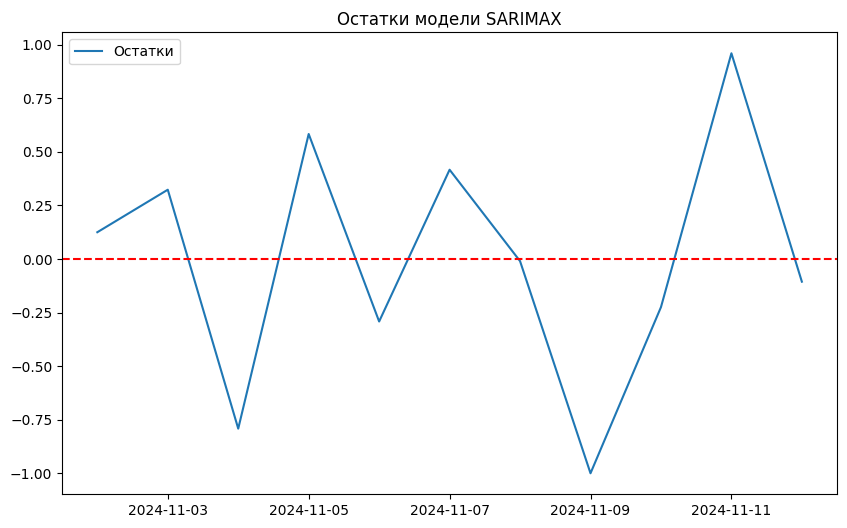


Результаты теста Льюнг-Бокса:
    lb_stat  lb_pvalue
1  1.438522   0.230379


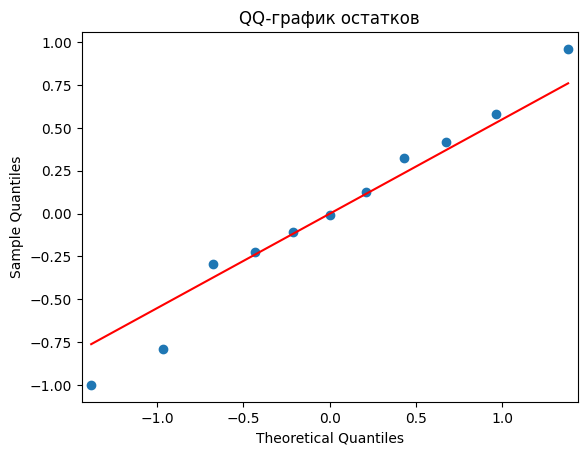

Статистика Шапиро-Уилка: 0.9820691241644796
p-value Шапиро-Уилка: 0.9765639322180931
Остатки распределены нормально.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.stats import shapiro

# Пример расширенных данных
data = {
    'Дата': ['2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04', '2024-11-05',
             '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
             '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15'],
    'Количество проданных единиц': [20, 50, 200, 10, 150, 80, 180, 250, 40, 120, 160, 220, 90, 110, 130],
    'Праздничный день': [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],  # Экзогенная переменная
}

# Создание DataFrame
df = pd.DataFrame(data)

# Преобразование даты в формат pandas
df['Дата'] = pd.to_datetime(df['Дата'])
df.set_index('Дата', inplace=True)

# Добавление сезонного признака (день недели)
df['День недели'] = df.index.dayofweek

# Получение временного ряда и экзогенных переменных
sales = df['Количество проданных единиц']
exog_vars = df[['Праздничный день', 'День недели']]

# Нормализация данных для улучшения масштабирования
sales_normalized = (sales - sales.min()) / (sales.max() - sales.min())

# Разделение данных на обучающую и тестовую выборку
train_size = int(len(df) * 0.8)  # 80% для обучения, 20% для теста
train_sales = sales_normalized[:train_size]
test_sales = sales_normalized[train_size:]
train_exog = exog_vars[:train_size]
test_exog = exog_vars[train_size:]

# Визуализация данных (обучение и тест)
plt.figure(figsize=(10, 6))
plt.plot(train_sales, label="Обучающие данные")
plt.plot(test_sales, label="Тестовые данные", color='red')
plt.title("Продажи за несколько дней (нормализованные данные)")
plt.xlabel("Дата")
plt.ylabel("Нормализованные продажи")
plt.legend()
plt.show()

# Проверка стационарности (ADF-тест) для обучающих данных
adf_result = adfuller(train_sales)
print("ADF Statistic (для обучающих данных):", adf_result[0])
print("p-value (для обучающих данных):", adf_result[1])

if adf_result[1] < 0.05:
    print("Ряд стационарен.")
else:
    print("Ряд нестационарен. Попробуем разности.")

# Разности для стационарности на обучающих данных
if adf_result[1] >= 0.05:
    train_sales_diff = train_sales.diff().dropna()
else:
    train_sales_diff = train_sales

# Подбор модели SARIMAX
seasonal_order = (1, 1, 1, 7)  # Пример сезонности с периодом 7 (неделя)
model_sarimax = SARIMAX(train_sales_diff, exog=train_exog.iloc[1:], order=(1, 0, 0), seasonal_order=seasonal_order)
result_sarimax = model_sarimax.fit()

print(result_sarimax.summary())

# Прогнозирование
forecast_steps = len(test_sales)
exog_forecast = test_exog.iloc[:forecast_steps]
forecast = result_sarimax.forecast(steps=forecast_steps, exog=exog_forecast)
print("\nПрогноз на тестовую выборку:")
print(forecast)

# Оценка модели на тестовых данных
mse = mean_squared_error(test_sales, forecast)
print(f"Mean Squared Error на тестовой выборке: {mse:.4f}")

# Визуализация прогноза
plt.figure(figsize=(10, 6))
plt.plot(train_sales, label="Обучающие данные")
plt.plot(test_sales, label="Тестовые данные", color='red')
plt.plot(test_sales.index, forecast, label="Прогноз", color='green')
plt.title("Прогноз на тестовых данных (нормализованные данные)")
plt.xlabel("Дата")
plt.ylabel("Нормализованные продажи")
plt.legend()
plt.show()

# Диагностика остатков
residuals = result_sarimax.resid

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Остатки")
plt.axhline(0, linestyle="--", color="red")
plt.title("Остатки модели SARIMAX")
plt.legend()
plt.show()

# Тест Льюнг-Бокса
ljung_box = acorr_ljungbox(residuals, lags=[1], return_df=True)
print("\nРезультаты теста Льюнг-Бокса:")
print(ljung_box)

# QQ-график остатков
sm.qqplot(residuals, line='s')
plt.title("QQ-график остатков")
plt.show()

# Тест Шапиро-Уилка
shapiro_test = shapiro(residuals)
print("Статистика Шапиро-Уилка:", shapiro_test[0])
print("p-value Шапиро-Уилка:", shapiro_test[1])
if shapiro_test[1] > 0.05:
    print("Остатки распределены нормально.")
else:
    print("Остатки не распределены нормально.")